**Attention:** MIuG.yml can be used for correct package versions

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from IPython.display import display
try:
    import faiss
except:
    pass

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix, roc_curve

Custom function to plot the confusion matrices

In [247]:
def plot_cm_subplots(cm_dict, suptitle=None, y1=0, y2=0.95, new_title=None):
    
    fig, axes = plt.subplots(1, len(cm_dict), figsize=(20, 5), sharey='row')
        
    for i, (key, cf_matrix) in enumerate(cm_dict.items()):
        disp = ConfusionMatrixDisplay(cf_matrix, display_labels=['Arrest','No Action'])
        disp.plot(ax=axes[i], xticks_rotation=45)
        if new_title != None:
            disp.ax_.set_title(new_title + f'{key}')
        else:
            disp.ax_.set_title(f'Confusion matrix for the {key} set')
        disp.im_.colorbar.remove()
        disp.ax_.set_xlabel('')
        if i!=0:
            disp.ax_.set_ylabel('')
            
    plt.subplots_adjust(wspace=0.40, hspace=0.1)
    cbar = fig.colorbar(disp.im_, ax=axes)
    cbar.set_ticks([])

    if len(cm_dict) % 2 != 0:
        j = int(np.floor(len(cm_dict)/2))
        ax_pos = axes[j].get_position()
        x_pos = (ax_pos.x0 + ax_pos.x1) / 2
    else:
        j = int((len(cm_dict) / 2) - 1)
        k = int(len(cm_dict) / 2)
        ax_pos_1 = axes[j].get_position()
        ax_pos_2 = axes[k].get_position()
        x_pos_1 = ax_pos_1.x1
        x_pos_2 = ax_pos_2.x0
        x_pos = (x_pos_1 + x_pos_2) / 2
            
    fig.text(x_pos, y1, 'Predicted label', ha='center')

    if suptitle != None:
        fig.text(x_pos, y2, suptitle, ha='center', fontsize=20)
    
    plt.show()

Defining a KNN classifier using the faiss library for fast computation

In [248]:
# Use an external library from Facebook to speed up the computation
# Source: https://towardsdatascience.com/make-knn-300-times-faster-than-scikit-learns-in-20-lines-5e29d74e76bb
# git: https://github.com/facebookresearch/faiss/blob/master/INSTALL.md
class FaissKNeighbors:
    def __init__(self, k=5):
        self.index = None
        self.y = None
        self.k = k

    def fit(self, X, y):
        self.index = faiss.IndexFlatL2(X.shape[1])
        self.index.add(X)
        self.y = y

    def predict(self, X):
        distances, indices = self.index.search(X, k=self.k)
        votes = self.y[indices]
        predictions = np.array([np.argmax(np.bincount(x)) for x in votes])
        return predictions

Loading the pre-computed results from pickle files into variables to avoid repeated training and prediction

In [249]:
knn_sklearn = pickle.load(open('pickles/knn_sklearn.sav', 'rb'))
y_pred_train_knn_sklearn = pickle.load(open('pickles/y_pred_train_knn_sklearn.sav', 'rb'))
y_pred_val_knn_sklearn = pickle.load(open('pickles/y_pred_val_knn_sklearn.sav', 'rb'))
y_pred_test_knn_sklearn = pickle.load(open('pickles/y_pred_test_knn_sklearn.sav', 'rb'))

# Run faiss class initalization first otherwise you receive an error
knn_faiss = pickle.load(open('pickles/knn_faiss.sav', 'rb'))
y_pred_train_knn_faiss = pickle.load(open('pickles/y_pred_train_knn_faiss.sav', 'rb'))
y_pred_val_knn_faiss = pickle.load(open('pickles/y_pred_val_knn_faiss.sav', 'rb'))
y_pred_test_knn_faiss = pickle.load(open('pickles/y_pred_test_knn_faiss.sav', 'rb'))

nn_sklearn = pickle.load(open('pickles/nn_sklearn.sav', 'rb'))
y_pred_train_nn_sklearn = pickle.load(open('pickles/y_pred_train_nn_sklearn.sav', 'rb'))
y_pred_val_nn_sklearn = pickle.load(open('pickles/y_pred_val_nn_sklearn.sav', 'rb'))
y_pred_test_nn_sklearn = pickle.load(open('pickles/y_pred_test_nn_sklearn.sav', 'rb'))

train_sizes_knn = pickle.load(open('pickles/train_sizes_knn.sav', 'rb'))
train_scores_knn = pickle.load(open('pickles/train_scores_knn.sav', 'rb'))
test_scores_knn = pickle.load(open('pickles/test_scores_knn.sav', 'rb'))
fit_times_knn = pickle.load(open('pickles/fit_times_knn.sav', 'rb'))

train_sizes_nn = pickle.load(open('pickles/train_sizes_nn.sav', 'rb'))
train_scores_nn = pickle.load(open('pickles/train_scores_nn.sav', 'rb'))
test_scores_nn = pickle.load(open('pickles/test_scores_nn.sav', 'rb'))
fit_times_nn = pickle.load(open('pickles/fit_times_nn.sav', 'rb'))

nn_norace = pickle.load(open('pickles/nn_norace.sav', 'rb'))
y_pred_train_norace = pickle.load(open('pickles/y_pred_train_norace.sav', 'rb'))
y_pred_val_norace = pickle.load(open('pickles/y_pred_val_norace.sav', 'rb'))
y_pred_test_norace = pickle.load(open('pickles/y_pred_test_norace.sav', 'rb'))

nn_noage = pickle.load(open('pickles/nn_noage.sav', 'rb'))
y_pred_train_noage = pickle.load(open('pickles/y_pred_train_noage.sav', 'rb'))
y_pred_val_noage = pickle.load(open('pickles/y_pred_val_noage.sav', 'rb'))
y_pred_test_noage = pickle.load(open('pickles/y_pred_test_noage.sav', 'rb'))

nn_nogender = pickle.load(open('pickles/nn_nogender.sav', 'rb'))
y_pred_train_nogender = pickle.load(open('pickles/y_pred_train_nogender.sav', 'rb'))
y_pred_val_nogender = pickle.load(open('pickles/y_pred_val_nogender.sav', 'rb'))
y_pred_test_nogender = pickle.load(open('pickles/y_pred_test_nogender.sav', 'rb'))

nn_unaw = pickle.load(open('pickles/nn_unaw.sav', 'rb'))
y_pred_train_unaw = pickle.load(open('pickles/y_pred_train_unaw.sav', 'rb'))
y_pred_val_unaw = pickle.load(open('pickles/y_pred_val_unaw.sav', 'rb'))
y_pred_test_unaw = pickle.load(open('pickles/y_pred_test_unaw.sav', 'rb'))

nn_scr = pickle.load(open('pickles/nn_scr.sav', 'rb'))
y_pred_train_scr = pickle.load(open('pickles/y_pred_train_scr.sav', 'rb'))
y_pred_val_scr = pickle.load(open('pickles/y_pred_val_scr.sav', 'rb'))
y_pred_test_scr = pickle.load(open('pickles/y_pred_test_scr.sav', 'rb'))

# Preprocessing

In [250]:
#read in data for preprocessing
data = pd.read_csv("NC_policing.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402087 entries, 0 to 402086
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   state               402087 non-null  object 
 1   stop_date           402087 non-null  object 
 2   driver_gender       402087 non-null  object 
 3   driver_age          401996 non-null  float64
 4   driver_race_raw     402087 non-null  object 
 5   driver_race         402087 non-null  object 
 6   violation           402087 non-null  object 
 7   search_type         402087 non-null  object 
 8   contraband_found    402087 non-null  bool   
 9   stop_outcome        402087 non-null  object 
 10  search_basis        402087 non-null  object 
 11  officer_id          402087 non-null  int64  
 12  drugs_related_stop  4379 non-null    object 
 13  district            402049 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(11)
memory usage: 40.3+ MB


In [251]:
#changing 'stop_date' feature to datetime in order to extract days of week
#as a feature. Instead of using "dates" we use "days of week"
#idea behind it: there can be a trend regarding occurances of arrest on
#specific days of week e.g. monday because it is first day of the week 
#and everyone is grumpy, or weekends when people are loose (eventually more
#drunk)
data['stop_date'] = pd.to_datetime(data['stop_date'], errors = 'coerce')
data['stop_date:day_of_week'] = data['stop_date'].dt.day_of_week
data.head()

,state,stop_date,driver_gender,driver_age,driver_race_raw,driver_race,violation,search_type,contraband_found,stop_outcome,search_basis,officer_id,drugs_related_stop,district,stop_date:day_of_week
0,NC,2000-07-31,M,23.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3,0
1,NC,2000-07-31,F,29.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3,0
2,NC,2000-07-31,F,49.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3,0
3,NC,2000-07-31,M,29.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3,0
4,NC,2000-07-31,M,24.0,U H,Hispanic,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3,0


In [252]:
#check number of NaN values in each column
data.isna().sum()

state                         0
stop_date                     0
driver_gender                 0
driver_age                   91
driver_race_raw               0
driver_race                   0
violation                     0
search_type                   0
contraband_found              0
stop_outcome                  0
search_basis                  0
officer_id                    0
drugs_related_stop       397708
district                     38
stop_date:day_of_week         0
dtype: int64

In [253]:
#fill missing values in "drivers_age" feature with mean of all values
age_fill = data['driver_age'].mean()
print("Average age:", age_fill)

#mean drivers age is 41.8, we round it to 42 since age can't be 
#looked at with decimal points
data['driver_age'] = data['driver_age'].fillna(int(np.rint(age_fill)))

#fill missing values in "drugs_related_stop" feature with false values
#since the probability of finding drugs in someone's car is low
data['drugs_related_stop'] = data['drugs_related_stop'].fillna(False)

#dropping rows which dont have a specified district
#since its only 38 of those, it won't have an impact
#on the quality of data
data.dropna(axis=0, inplace=True)

#check whether there are still missing values
data.isna().sum()

Average age: 41.878103264709104


state                    0
stop_date                0
driver_gender            0
driver_age               0
driver_race_raw          0
driver_race              0
violation                0
search_type              0
contraband_found         0
stop_outcome             0
search_basis             0
officer_id               0
drugs_related_stop       0
district                 0
stop_date:day_of_week    0
dtype: int64

In [254]:
#see which unique values do the columns of our dataset hold
for col in data:
    print(data[col].unique())

['NC']
['2000-07-31T00:00:00.000000000' '2000-08-01T00:00:00.000000000'
 '2000-08-02T00:00:00.000000000' ... '2015-12-29T00:00:00.000000000'
 '2015-12-30T00:00:00.000000000' '2015-12-31T00:00:00.000000000']
['M' 'F']
[23. 29. 49. 24. 21. 33. 16. 28. 39. 68. 20. 40. 50. 57. 38. 46. 34. 44.
 22. 36. 53. 32. 15. 27. 26. 41. 48. 25. 47. 42. 52. 17. 76. 61. 31. 30.
 64. 37. 19. 51. 18. 35. 59. 73. 43. 45. 66. 65. 54. 58. 55. 75. 63. 56.
 60. 81. 62. 77. 67. 69. 87. 70. 71. 78. 74. 85. 72. 79. 93. 80. 89. 82.
 84. 91. 83. 90. 88. 86. 92. 98. 99. 94. 96.]
['W N' 'B N' 'U H' 'W H' 'I N' 'U N' 'A N' 'A H' 'B H' 'I H']
['White' 'Black' 'Hispanic' 'Other' 'Asian']
['Speeding' 'DUI' 'Equipment' 'Seat belt' 'Other' 'Registration/plates'
 'Safe movement' 'Stop sign/light']
['No Search Conducted' 'Protective Frisk' 'Incident to Arrest' 'Consent'
 'Probable Cause' 'Warrant']
[False  True]
['Arrest' 'No Action']
['No Search Conducted' 'Observation Suspected Contraband'
 'Erratic Suspicious Behaviour' '

In [255]:
# After dropping some columns
data.head()

,state,stop_date,driver_gender,driver_age,driver_race_raw,driver_race,violation,search_type,contraband_found,stop_outcome,search_basis,officer_id,drugs_related_stop,district,stop_date:day_of_week
0,NC,2000-07-31,M,23.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3,0
1,NC,2000-07-31,F,29.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3,0
2,NC,2000-07-31,F,49.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3,0
3,NC,2000-07-31,M,29.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3,0
4,NC,2000-07-31,M,24.0,U H,Hispanic,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3,0


In [256]:
#data['district'].value_counts()
#previous row shows the number of value-occurances in column

#since we can't work with string values for machine learning 
#we have to convert all non-numerical features to numerical ones
#especially features labeled as sensitive: gender, race, ...

#we drop the features not going to be used for ML
X = data.drop(columns=["state", "stop_date", "driver_race_raw", "stop_outcome"])

columns = X.columns
X

,driver_gender,driver_age,driver_race,violation,search_type,contraband_found,search_basis,officer_id,drugs_related_stop,district,stop_date:day_of_week
0,M,23.0,White,Speeding,No Search Conducted,False,No Search Conducted,10606,False,E3,0
1,F,29.0,White,Speeding,No Search Conducted,False,No Search Conducted,10606,False,E3,0
2,F,49.0,Black,Speeding,No Search Conducted,False,No Search Conducted,10606,False,E3,0
3,M,29.0,Black,Speeding,No Search Conducted,False,No Search Conducted,10606,False,E3,0
4,M,24.0,Hispanic,Speeding,No Search Conducted,False,No Search Conducted,10606,False,E3,0
...,...,...,...,...,...,...,...,...,...,...,...
402082,M,18.0,White,Speeding,Probable Cause,True,Observation Suspected Contraband,21715,True,G3,3
402083,F,21.0,Black,Registration/plates,Incident to Arrest,False,Other Official Info,10592,False,G5,3
402084,F,29.0,White,Speeding,Incident to Arrest,False,Observation Suspected Contraband,21848,False,E1,3
402085,F,18.0,White,Other,Probable Cause,True,Observation Suspected Contraband,11887,True,F5,3


In [257]:
#encode all features except driver's age, officer id and day of the week
le = LabelEncoder()

for col in X:
    if col=='driver_age' or col=='stop_date:day_of_week' or col=='driver_race':
        pass
    else:
        X[col] = le.fit_transform(X[col])

X.head()

,driver_gender,driver_age,driver_race,violation,search_type,contraband_found,search_basis,officer_id,drugs_related_stop,district,stop_date:day_of_week
0,1,23.0,White,6,2,0,18,722,0,34,0
1,0,29.0,White,6,2,0,18,722,0,34,0
2,0,49.0,Black,6,2,0,18,722,0,34,0
3,1,29.0,Black,6,2,0,18,722,0,34,0
4,1,24.0,Hispanic,6,2,0,18,722,0,34,0


In [258]:
tmp = X[['driver_race']]
tmp = pd.get_dummies(tmp)
X = X.drop(columns=['driver_race'])
X = pd.concat([X, tmp], axis=1)
X

,driver_gender,driver_age,violation,search_type,contraband_found,search_basis,officer_id,drugs_related_stop,district,stop_date:day_of_week,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White
0,1,23.0,6,2,0,18,722,0,34,0,0,0,0,0,1
1,0,29.0,6,2,0,18,722,0,34,0,0,0,0,0,1
2,0,49.0,6,2,0,18,722,0,34,0,0,1,0,0,0
3,1,29.0,6,2,0,18,722,0,34,0,0,1,0,0,0
4,1,24.0,6,2,0,18,722,0,34,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402082,1,18.0,6,3,1,19,2632,1,46,3,0,0,0,0,1
402083,0,21.0,3,1,0,25,711,0,48,3,0,1,0,0,0
402084,0,29.0,6,1,0,19,2738,0,32,3,0,0,0,0,1
402085,0,18.0,2,3,1,19,1873,1,43,3,0,0,0,0,1


In [259]:
#target variable y to classify arrest, encoded
y = data["stop_outcome"]
y_encoded = le.fit_transform(y)

#show coding
pd.DataFrame(data=le.transform(le.classes_),index=le.classes_,columns=["Coding"])

,Coding
Arrest,0
No Action,1


## Splitting data into different sets

In [260]:
#for standard scaling later, we convert all data types to float32
X = X.astype(np.float32)

# Split the data into training and test set
# test_size=0.2: 60% training set, 20% test set, 20% CV
# random_state=350: fix the random set to get the same result every time you run the code (for tutorial purposes)
X_tmp, X_test, y_tmp, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=350)
X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.25, random_state=350)

In [261]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(241229, 15)
(80410, 15)
(80410, 15)


## Standardizing the data

In [262]:
# Creating a scaler object (here with default settings)
scaler = StandardScaler()

# Replacing the values in our X_train by the normalized ones
X_train_norm = X_train.copy()
X_train_norm.values[:] = scaler.fit_transform(X_train)
# Replacing the values in our X_test by the normalized ones
X_test_norm = X_test.copy()
X_test_norm.values[:] = scaler.transform(X_test)
# Replacing the values in our X_val by the normalized ones
X_val_norm = X_test.copy()
X_val_norm.values[:] = scaler.transform(X_val)

X_train_norm

,driver_gender,driver_age,violation,search_type,contraband_found,search_basis,officer_id,drugs_related_stop,district,stop_date:day_of_week,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White
376090,0.323003,0.315311,-0.170781,0.180831,-0.130247,0.088705,0.049197,-0.104827,0.079392,0.641341,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
381498,0.323003,-0.222630,-0.170781,0.180831,-0.130247,0.088705,0.165899,-0.104827,0.807083,0.110470,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
155966,0.323003,-0.991118,-0.170781,0.180831,-0.130247,0.088705,1.038166,-0.104827,0.503878,-0.420400,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
148275,0.323003,-1.067967,-0.170781,0.180831,-0.130247,0.088705,-0.847009,-0.104827,0.140033,-0.420400,-0.066466,1.701267,-0.287442,-0.144067,-1.339623
344347,0.323003,-0.606874,-0.170781,0.180831,-0.130247,0.088705,0.613253,-0.104827,0.564519,1.703081,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340621,0.323003,-0.068933,-0.170781,0.180831,-0.130247,0.088705,0.435209,-0.104827,0.807083,-0.420400,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
106869,0.323003,-0.299479,-0.170781,0.180831,-0.130247,0.088705,0.786809,-0.104827,-0.284453,-1.482141,-0.066466,-0.587797,3.478958,-0.144067,-1.339623
92828,0.323003,-0.530026,-0.170781,0.180831,-0.130247,0.088705,-1.316806,-0.104827,0.867724,-0.951271,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
37632,0.323003,-1.144816,-0.170781,0.180831,-0.130247,0.088705,1.005250,-0.104827,1.110287,-0.951271,-0.066466,-0.587797,-0.287442,-0.144067,0.746479


# Plotting

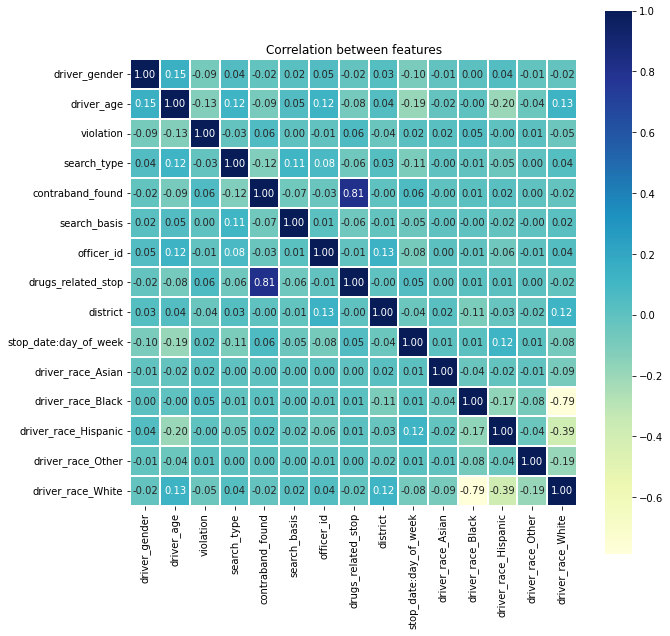

In [263]:
#creating correlation matrix for feature selection
corr = X.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, linewidths=0.1, square=True, annot=True, cmap='YlGnBu',
            linecolor="white", fmt='.2f')
plt.title('Correlation between features')
plt.show()

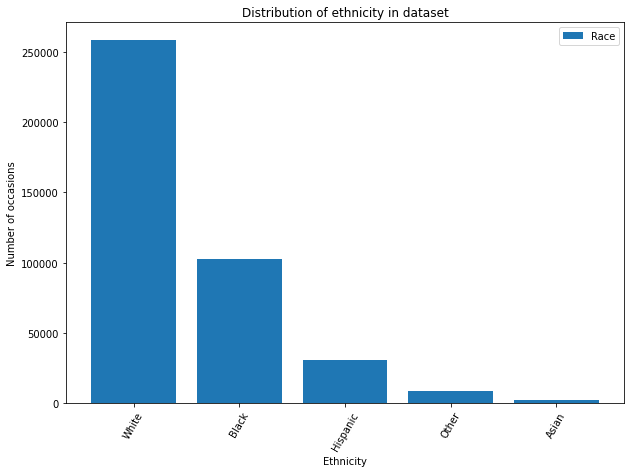

In [264]:
#representation of certain groups in the dataset
plt.figure(figsize=(10,7))
# Calculate the necessary number of bins for a better display
bins = np.arange(data['driver_race'].nunique()+1) - 0.5

plt.hist(data['driver_race'], bins=bins, rwidth=0.8, label='Race')
plt.xlabel('Ethnicity')
plt.ylabel('Number of occasions')
plt.title('Distribution of ethnicity in dataset')
plt.legend()
plt.xticks(rotation=60)
plt.show()

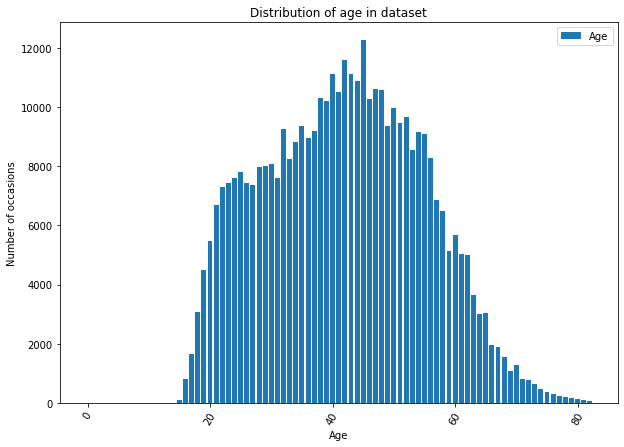

In [265]:
#representation of certain groups in the dataset
plt.figure(figsize=(10,7))
# Calculate the necessary number of bins for a better display
bins = np.arange(data['driver_age'].nunique()+1) - 0.5

plt.hist(data['driver_age'], bins=bins, rwidth=0.8, label='Age')
plt.xlabel('Age')
plt.ylabel('Number of occasions')
plt.title('Distribution of age in dataset')
plt.legend()
plt.xticks(rotation=60)
plt.show()

In [266]:
#number of arrestments among black and white people
data_race = data[['driver_race','stop_outcome']]
black_arr = data_race[data_race['driver_race']=='Black']
white_arr = data_race[data_race['driver_race']=='White']
hispanic_arr = data_race[data_race['driver_race']=='Hispanic']
asian_arr = data_race[data_race['driver_race']=='Asian']
other_arr = data_race[data_race['driver_race']=='Other']

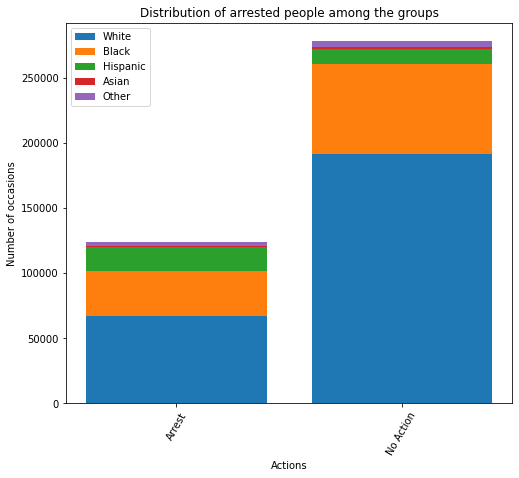

In [276]:
# Calculate the necessary number of bins for a better display
bins = np.arange(data_race['stop_outcome'].nunique()+1) - 0.5

plt.figure(figsize=(8,7))
# plt.hist([data_race['stop_outcome'], white_arr['stop_outcome'], black_arr['stop_outcome'], hispanic_arr['stop_outcome'], asian_arr['stop_outcome'], other_arr['stop_outcome']],
#          bins, label=['Overall','White','Black', 'Hispanic', 'Asian', 'Other'], rwidth=0.8, stacked=True)
plt.hist([white_arr['stop_outcome'], black_arr['stop_outcome'], hispanic_arr['stop_outcome'], asian_arr['stop_outcome'], other_arr['stop_outcome']],
         bins, label=['White','Black', 'Hispanic', 'Asian', 'Other'], rwidth=0.8, stacked=True)
plt.xlabel('Actions')
plt.ylabel('Number of occasions')
plt.title('Distribution of arrested people among the groups')
plt.legend(loc='upper left')
plt.xticks(rotation=60)
plt.show()

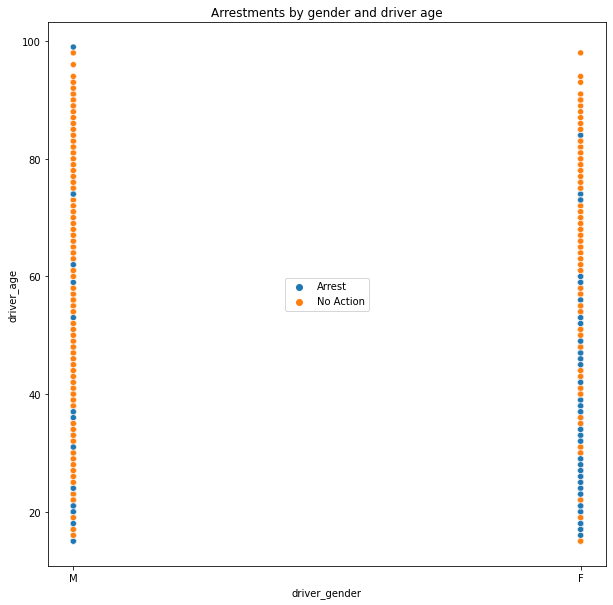

In [268]:
#scatter plot driver age against gender, frequency of arrestments
plt.figure(figsize=(10,10))
sns.scatterplot(x='driver_gender',y='driver_age',hue=data['stop_outcome'],data=data)
plt.legend(loc='center')
plt.title('Arrestments by gender and driver age')
plt.show()

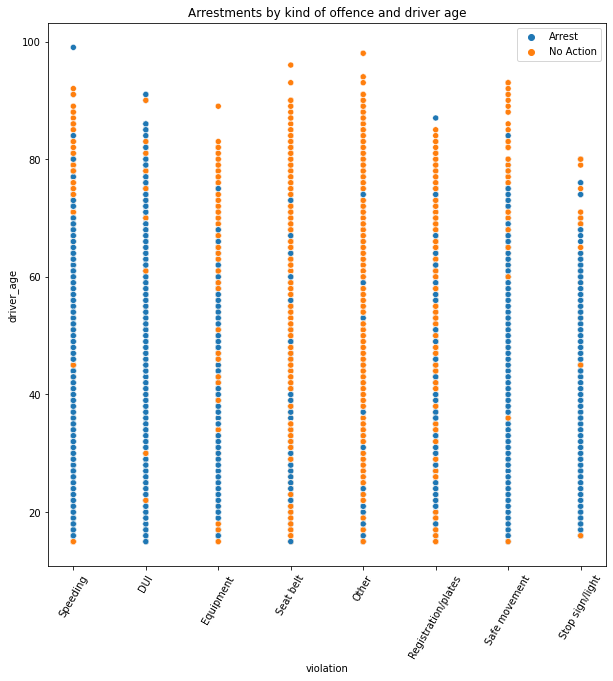

In [269]:
#scatter plot type of violation against driver age, frequency of arrestments
plt.figure(figsize=(10,10))
sns.scatterplot(x='violation',y='driver_age',hue=data['stop_outcome'],data=data)
plt.legend(loc='upper right')
plt.title('Arrestments by kind of offence and driver age')
plt.xticks(rotation=60)
plt.show()

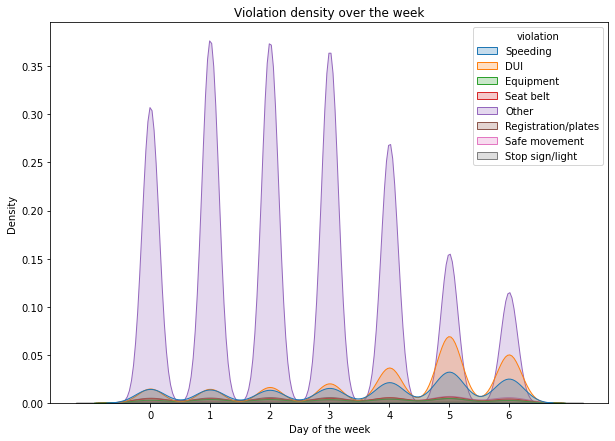

In [274]:
#kde to show on which day of the week does each type of
#violation occur the most
plt.figure(figsize=(10,7))
feat = data[['stop_date:day_of_week']]
for (column,color) in zip(feat.columns,sns.color_palette()):
    sns.kdeplot(x=column,fill=True,hue=data.violation,data=data,color=color)
plt.title('Violation density over the week')
plt.xticks(range(7))
plt.xlabel("Day of the week")
plt.show()

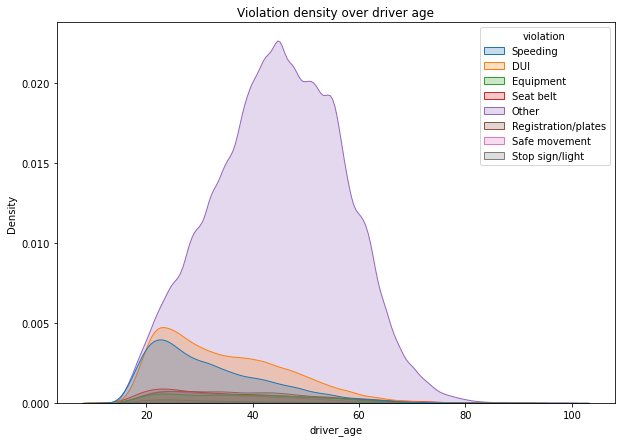

In [273]:
#kde to show the which type of violation mostly occurs
#by people of different ages
feat = data[['driver_age']]
plt.figure(figsize=(10,7))
for (column,color) in zip(feat.columns,sns.color_palette()):
    sns.kdeplot(x=column,fill=True,hue=data.violation,data=data,color=color)
plt.title('Violation density over driver age')
plt.show()

# Classifiers

Two types of classifiers are implemented

- K-Nearest Neighbors
- Neural Network

## Hyperparameter optimization

***

`If you have already loaded the pickle file: You can skip this part and move on to "Measuring model performance"`

***

### k-NN

#### Finding the optimal k-value

Iterating over different k-values and testing the accuracy on the validation set

In [ ]:
# List to store the accuracy scores
pred_score_knn_train = []
pred_score_knn_val = []
# k-values to try out
k_range = range(1, 21)

print("Entering loop")
# Iterate over all the k-values in the list
for i in k_range:
    print(f'k={i}')

    print("Created class")

    # Create an instance of sped up KNN with n_neighbors=i
    knn = FaissKNeighbors(k=i)
    print("Created an instance of KNN")

    # Train the model on the training set with the encoded labels
    # The classifier only accepts contiguous arrays
    tmp_train = np.ascontiguousarray(X_train_norm.to_numpy())
    knn.fit(tmp_train, y_train)
    print("Fitting complete")
    y_pred_train = knn.predict(tmp_train)
    print("Training prediction complete")
    
    # The classifier only accepts contiguous arrays
    tmp_val = np.ascontiguousarray(X_val_norm.to_numpy())
    y_pred_val = knn.predict(tmp_val)
    print("Validation prediction complete")

    # Append the accuracy scores to the list
    pred_score_knn_train.append(accuracy_score(y_train, y_pred_train))
    pred_score_knn_val.append(accuracy_score(y_val, y_pred_val))
    print("Accuracy score calculated")

    print()

In [ ]:
# Save the accuracy scores
# pickle.dump(pred_score_knn_train, open('pickles/pred_score_knn_train.sav', 'wb'))
# pickle.dump(pred_score_knn_val, open('pickles/pred_score_knn_val.sav', 'wb'))

#### Plotting the pre-computed result

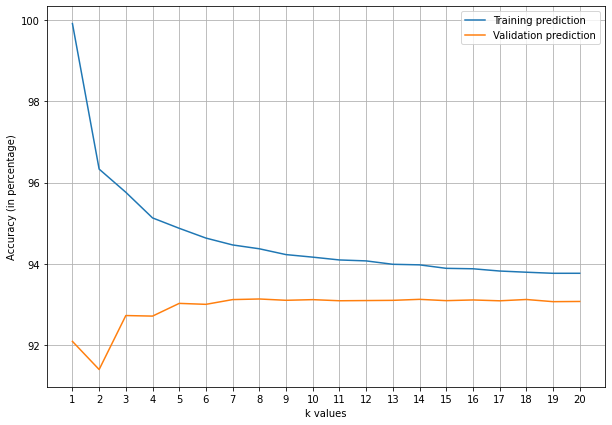

In [226]:
# Range of k-values for plotting purposes
k_range = range(1, 21)
# Load the pre-computed results
pred_score_knn_train = pickle.load(open('pickles/pred_score_knn_train.sav', 'rb'))
pred_score_knn_val = pickle.load(open('pickles/pred_score_knn_val.sav', 'rb'))
# Convert the list to an array and multiply with 100 to get percentages
pred_score_knn_train = np.array(pred_score_knn_train) * 100
pred_score_knn_val = np.array(pred_score_knn_val) * 100
# Plot the results
plt.figure(figsize=(10,7))
plt.plot(k_range, pred_score_knn_train, label='Training prediction')
plt.plot(k_range, pred_score_knn_val, label='Validation prediction')
plt.xlabel("k values")
plt.ylabel("Accuracy (in percentage)")
plt.xticks(k_range)
plt.legend()
plt.grid()
plt.show()

### Neural Network

#### Finding the optimal number of hidden layers

In [227]:
# List to store the accuracy scores
pred_score_nn_layers_train = []
pred_score_nn_layers_val = []
# Number of layers to try out
layers_range = range(21)

print("Entering loop")
# Iterate over all number of hidden layers in the list
for i in layers_range:
    print(f'k={i}')
    
    if i == 0:
        # Create an instance of NN with hidden_layer_sizes=(5,)
        nn_sklearn = MLPClassifier(solver='adam', alpha=1e-5,
                        hidden_layer_sizes=(5,), random_state=1, max_iter=1000)
        print("Created an instance of NN")
    else:
        # Create an instance of NN with hidden_layer_sizes=(5,)
        nn_sklearn = MLPClassifier(solver='adam', alpha=1e-5,
                        hidden_layer_sizes=(5,i), random_state=1, max_iter=1000)
        print("Created an instance of NN")
        
    # Train the model on the training set with the encoded labels
    nn_sklearn.fit(X_train_norm, y_train)
    print("Fitting complete")
    
    # Make predictions on the training set
    y_pred_train_nn_sklearn = nn_sklearn.predict(X_train_norm)
    print("Training prediction complete")
    
    # Make predictions on the validation set
    y_pred_val_nn_sklearn = nn_sklearn.predict(X_val_norm)
    print("Validation prediction complete")

    # Append the accuracy scores to the list
    pred_score_nn_layers_train.append(accuracy_score(y_train, y_pred_train_nn_sklearn))
    print("Training accuracy score calculated")
    pred_score_nn_layers_val.append(accuracy_score(y_val, y_pred_val_nn_sklearn))
    print("Validation accuracy score calculated")

    print()

Entering loop
k=0
Created an instance of NN
Fitting complete
Training prediction complete
Validation prediction complete
Training accuracy score calculated
Validation accuracy score calculated

k=1
Created an instance of NN
Fitting complete
Training prediction complete
Validation prediction complete
Training accuracy score calculated
Validation accuracy score calculated

k=2
Created an instance of NN
Fitting complete
Training prediction complete
Validation prediction complete
Training accuracy score calculated
Validation accuracy score calculated

k=3
Created an instance of NN
Fitting complete
Training prediction complete
Validation prediction complete
Training accuracy score calculated
Validation accuracy score calculated

k=4
Created an instance of NN
Fitting complete
Training prediction complete
Validation prediction complete
Training accuracy score calculated
Validation accuracy score calculated

k=5
Created an instance of NN
Fitting complete
Training prediction complete
Validation

In [228]:
# Save the accuracy scores
# pickle.dump(pred_score_nn_layers_train, open('pickles/pred_score_nn_layers_train.sav', 'wb'))
# pickle.dump(pred_score_nn_layers_val, open('pickles/pred_score_nn_layers_val.sav', 'wb'))

#### Finding the optimal number of hidden units

In [232]:
# List to store the accuracy scores
pred_score_nn_train = []
pred_score_nn_val = []
# Number of hidden units to try out
num_hids_range = np.arange(5, 105, 5)

print("Entering loop")
# Iterate over all numbers of hidden units in the list
for i in num_hids_range:
    print(f'k={i}')

    # Create an instance of NN with hidden_layer_sizes=(i,)
    nn_sklearn = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(i,8), random_state=1, max_iter=1000)
    print("Created an instance of NN")

    # Train the model on the training set with the encoded labels
    nn_sklearn.fit(X_train_norm, y_train)
    print("Fitting complete")
    
    # Make predictions on the training set
    y_pred_train_nn_sklearn = nn_sklearn.predict(X_train_norm)
    print("Training prediction complete")
    
    # Make predictions on the validation set
    y_pred_val_nn_sklearn = nn_sklearn.predict(X_val_norm)
    print("Validation prediction complete")

    # Append the accuracy scores to the list
    pred_score_nn_train.append(accuracy_score(y_train, y_pred_train_nn_sklearn))
    print("Training accuracy score calculated")
    pred_score_nn_val.append(accuracy_score(y_val, y_pred_val_nn_sklearn))
    print("Validation accuracy score calculated")

    print()

Entering loop
k=5
Created an instance of NN
Fitting complete
Training prediction complete
Validation prediction complete
Training accuracy score calculated
Validation accuracy score calculated

k=10
Created an instance of NN
Fitting complete
Training prediction complete
Validation prediction complete
Training accuracy score calculated
Validation accuracy score calculated

k=15
Created an instance of NN
Fitting complete
Training prediction complete
Validation prediction complete
Training accuracy score calculated
Validation accuracy score calculated

k=20
Created an instance of NN
Fitting complete
Training prediction complete
Validation prediction complete
Training accuracy score calculated
Validation accuracy score calculated

k=25
Created an instance of NN
Fitting complete
Training prediction complete
Validation prediction complete
Training accuracy score calculated
Validation accuracy score calculated

k=30
Created an instance of NN
Fitting complete
Training prediction complete
Valid

In [233]:
# Save the accuracy scores
# pickle.dump(pred_score_nn_train, open('pickles/pred_score_nn_train.sav', 'wb'))
# pickle.dump(pred_score_nn_val, open('pickles/pred_score_nn_val.sav', 'wb'))

#### Plotting the pre-computed result

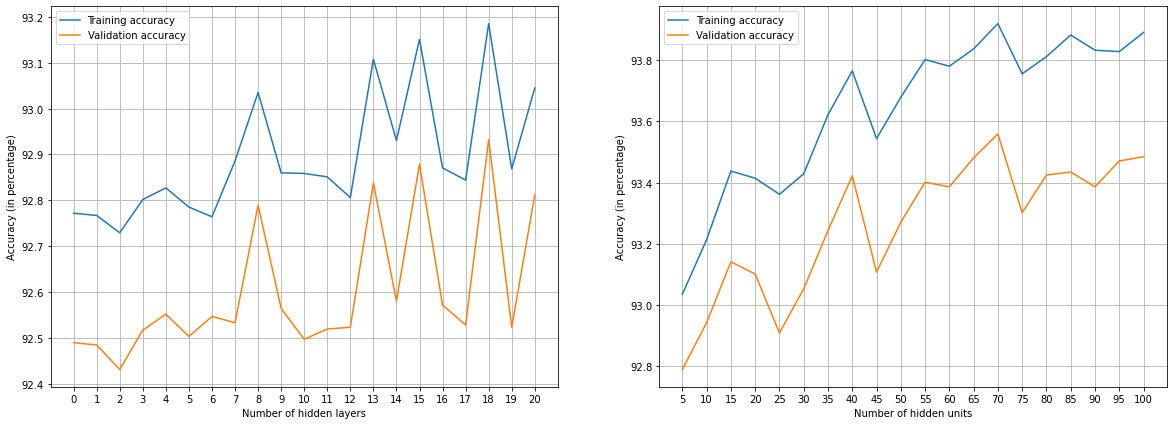

In [244]:
# Range of layer numbers for plotting purposes
layers_range = range(21)
# Load the pre-computed pred_score
pred_score_nn_layers_train = pickle.load(open('pickles/pred_score_nn_layers_train.sav', 'rb'))
pred_score_nn_layers_val = pickle.load(open('pickles/pred_score_nn_layers_val.sav', 'rb'))
# Convert the list to an array and multiply with 100 to get percentages
pred_score_nn_layers_train = np.array(pred_score_nn_layers_train) * 100
pred_score_nn_layers_val = np.array(pred_score_nn_layers_val) * 100

# Range of hidden unit numbers for plotting purposes
num_hids_range = np.arange(5, 105, 5)
# Load the pre-computed pred_score
pred_score_nn_train = pickle.load(open('pickles/pred_score_nn_train.sav', 'rb'))
pred_score_nn_val = pickle.load(open('pickles/pred_score_nn_val.sav', 'rb'))
# Convert the list to an array and multiply with 100 to get percentages
pred_score_nn_train = np.array(pred_score_nn_train) * 100
pred_score_nn_val = np.array(pred_score_nn_val) * 100

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(20,7))

axes[0].plot(layers_range, pred_score_nn_layers_train, label='Training accuracy')
axes[0].plot(layers_range, pred_score_nn_layers_val, label='Validation accuracy')
axes[0].set_xlabel("Number of hidden layers")
axes[0].set_ylabel("Accuracy (in percentage)")
axes[0].set_xticks(layers_range)
axes[0].legend()
axes[0].grid()

axes[1].plot(num_hids_range, pred_score_nn_train, label='Training accuracy')
axes[1].plot(num_hids_range, pred_score_nn_val, label='Validation accuracy')
axes[1].set_xlabel("Number of hidden units")
axes[1].set_ylabel("Accuracy (in percentage)")
axes[1].set_xticks(num_hids_range)
axes[1].legend()
axes[1].grid()
plt.show()

## Training the classifiers

***

`If you have already loaded the pickle file: You can skip this part and move on to "Measuring model performance"`

***

### k-NN

Pick k = 5 and train the standard classifier from scikit-learn 

#### Scikit-Learn

In [25]:
# Create an instance of KNN with n_neighbors=5
knn_sklearn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
print("Created an instance of KNN")

# Train the model on the training set with the encoded labels
knn_sklearn.fit(X_train_norm, y_train)
print("Fitting complete")

#Predictions for training, validation and test set
y_pred_train_knn_sklearn = knn_sklearn.predict(X_train_norm)
print("Training prediction complete")

y_pred_val_knn_sklearn = knn_sklearn.predict(X_val_norm)
print("Validation prediction complete")

y_pred_test_knn_sklearn = knn_sklearn.predict(X_test_norm)
print("Test prediction complete")

Created an instance of KNN
Fitting complete
Training prediction complete
Validation prediction complete
Test prediction complete


In [26]:
# Save the classifier and the variables to disk
# pickle.dump(knn_sklearn, open('pickles/knn_sklearn.sav', 'wb'))
# pickle.dump(y_pred_train_knn_sklearn, open('pickles/y_pred_train_knn_sklearn.sav', 'wb'))
# pickle.dump(y_pred_val_knn_sklearn, open('pickles/y_pred_val_knn_sklearn.sav', 'wb'))
# pickle.dump(y_pred_test_knn_sklearn, open('pickles/y_pred_test_knn_sklearn.sav', 'wb'))

#### Faiss

The same fitting and prediction for k-NN from faiss

In [27]:
knn_faiss = FaissKNeighbors(k=5) #not interpreted as classifier by plotting functions
print("Created an instance of KNN")

tmp_train = np.ascontiguousarray(X_train_norm.to_numpy())
knn_faiss.fit(tmp_train, y_train)
print("Fitting complete")

y_pred_train_knn_faiss = knn_faiss.predict(tmp_train)
print("Training prediction complete")

tmp_val = np.ascontiguousarray(X_val_norm.to_numpy())
y_pred_val_knn_faiss = knn_faiss.predict(tmp_val)
print("Validation prediction complete")

tmp_test = np.ascontiguousarray(X_test_norm.to_numpy())
y_pred_test_knn_faiss = knn_faiss.predict(tmp_test)
print("Test prediction complete")

Created an instance of KNN
Fitting complete
Training prediction complete
Validation prediction complete
Test prediction complete


In [28]:
# Save the classifier and the variables to disk
# pickle.dump(knn_faiss, open('pickles/knn_faiss.sav', 'wb'))
# pickle.dump(y_pred_train_knn_faiss, open('pickles/y_pred_train_knn_faiss.sav', 'wb'))
# pickle.dump(y_pred_val_knn_faiss, open('pickles/y_pred_val_knn_faiss.sav', 'wb'))
# pickle.dump(y_pred_test_knn_faiss, open('pickles/y_pred_test_knn_faiss.sav', 'wb'))

### NN

In [29]:
# Create an instance of NN with hidden_layer_sizes=(20,)
nn_sklearn = MLPClassifier(solver='adam', alpha=1e-5,
                hidden_layer_sizes=(40,8), random_state=1, max_iter=1000)
print("Created an instance of NN")

# Train the model on the training set with the encoded labels
nn_sklearn.fit(X_train_norm, y_train)
print("Fitting complete")

# Make predictions on the training set
y_pred_train_nn_sklearn = nn_sklearn.predict(X_train_norm)
print("Training prediction complete")

# Make predictions on the validation set
y_pred_val_nn_sklearn = nn_sklearn.predict(X_val_norm)
print("Validation prediction complete")

# Make predictions on the test set
y_pred_test_nn_sklearn = nn_sklearn.predict(X_test_norm)
print("Test prediction complete")

Created an instance of NN
Fitting complete
Training prediction complete
Validation prediction complete
Test prediction complete


In [30]:
# Save the classifier to disk
# pickle.dump(nn_sklearn, open('pickles/nn_sklearn.sav', 'wb'))
# pickle.dump(y_pred_train_nn_sklearn, open('pickles/y_pred_train_nn_sklearn.sav', 'wb'))
# pickle.dump(y_pred_val_nn_sklearn, open('pickles/y_pred_val_nn_sklearn.sav', 'wb'))
# pickle.dump(y_pred_test_nn_sklearn, open('pickles/y_pred_test_nn_sklearn.sav', 'wb'))

## Measuring model performance

### Dummy classifier

In [219]:
# Create an array with the length of y_test that always has the value 1 (No Action)
y_train_dummy = np.ones(len(y_train))
y_val_dummy = np.ones(len(y_val))
y_test_dummy = np.ones(len(y_test))

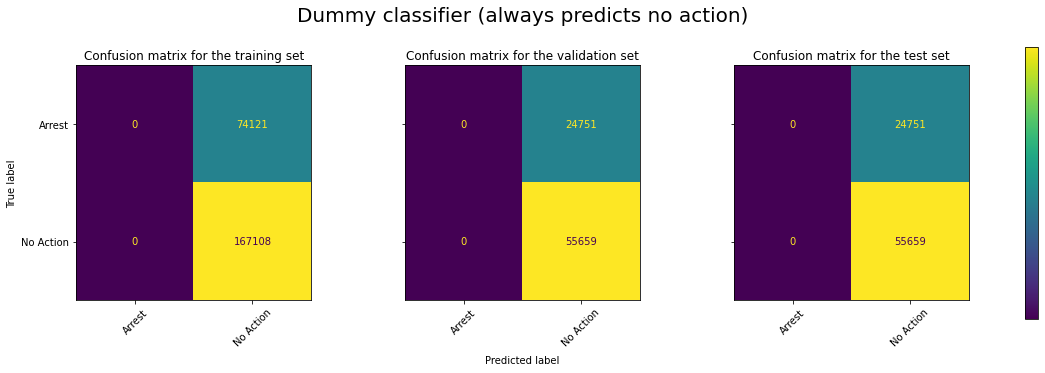

In [220]:
#Measuring Accuracy Score
cm_train_dummy = confusion_matrix(y_train, y_train_dummy)
cm_val_dummy = confusion_matrix(y_test, y_val_dummy)
cm_test_dummy = confusion_matrix(y_test, y_test_dummy)

tmp_dict = {'training': cm_train_dummy, 'validation': cm_val_dummy, 'test': cm_test_dummy} #plotting with function above
plot_cm_subplots(tmp_dict, 'Dummy classifier (always predicts no action)')

In [221]:
acc_list_dummy = [accuracy_score(y_train, y_train_dummy), accuracy_score(y_val, y_val_dummy), accuracy_score(y_test, y_test_dummy)]
print("Accuracy on training set: %f" %accuracy_score(y_train, y_train_dummy))
print("Accuracy on validation set: %f" %accuracy_score(y_val, y_val_dummy))
print("Accuracy on test set: %f" %accuracy_score(y_test, y_test_dummy))

Accuracy on training set: 0.692736
Accuracy on validation set: 0.690063
Accuracy on test set: 0.692190


### k-NN

#### scikit-learn

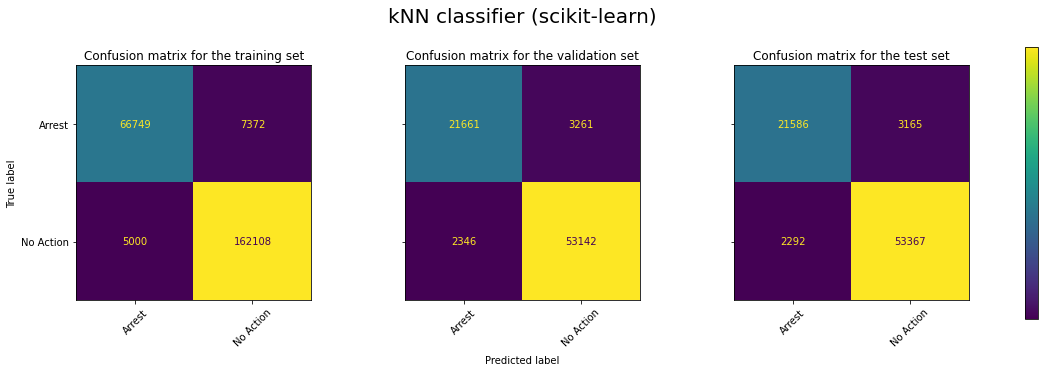

In [34]:
cm_train_knn_sklearn = confusion_matrix(y_train, y_pred_train_knn_sklearn)
cm_val_knn_sklearn = confusion_matrix(y_val, y_pred_val_knn_sklearn)
cm_test_knn_sklearn = confusion_matrix(y_test, y_pred_test_knn_sklearn)

tmp_dict = {'training': cm_train_knn_sklearn, 'validation': cm_val_knn_sklearn, 'test': cm_test_knn_sklearn}
plot_cm_subplots(tmp_dict, 'kNN classifier (scikit-learn)')

In [35]:
acc_list_knn_sklearn = [accuracy_score(y_train, y_pred_train_knn_sklearn), accuracy_score(y_val, y_pred_val_knn_sklearn), accuracy_score(y_test, y_pred_test_knn_sklearn)]
print("Accuracy on training set: %f" %accuracy_score(y_train, y_pred_train_knn_sklearn))
print("Accuracy on validation set: %f" %accuracy_score(y_val, y_pred_val_knn_sklearn))
print("Accuracy on test set: %f" %accuracy_score(y_test, y_pred_test_knn_sklearn))

Accuracy on training set: 0.948713
Accuracy on validation set: 0.930270
Accuracy on test set: 0.932135


#### faiss

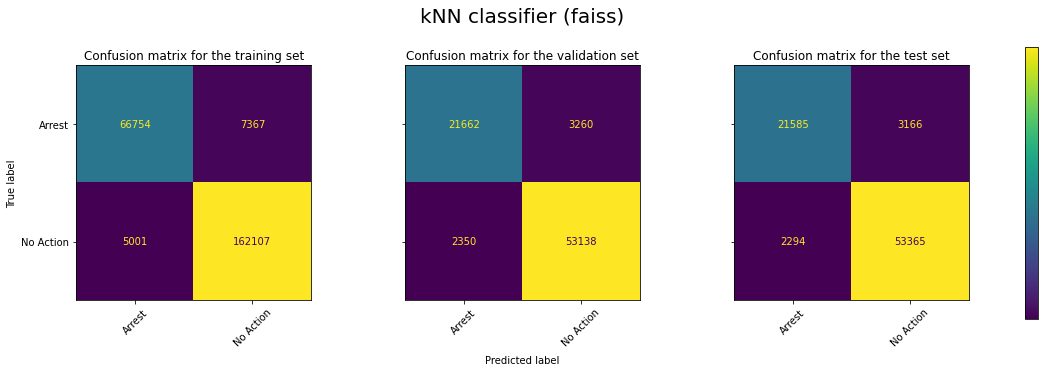

In [36]:
cm_train_knn_faiss = confusion_matrix(y_train, y_pred_train_knn_faiss)
cm_val_knn_faiss = confusion_matrix(y_val, y_pred_val_knn_faiss)
cm_test_knn_faiss = confusion_matrix(y_test, y_pred_test_knn_faiss)

tmp_dict = {'training': cm_train_knn_faiss, 'validation': cm_val_knn_faiss, 'test': cm_test_knn_faiss}
plot_cm_subplots(tmp_dict, 'kNN classifier (faiss)')

In [37]:
acc_list_knn_faiss = [accuracy_score(y_train, y_pred_train_knn_faiss), accuracy_score(y_val, y_pred_val_knn_faiss), accuracy_score(y_test, y_pred_test_knn_faiss)]
print("Accuracy on training set: %f" %accuracy_score(y_train, y_pred_train_knn_faiss))
print("Accuracy on validation set: %f" %accuracy_score(y_val, y_pred_val_knn_faiss))
print("Accuracy on test set: %f" %accuracy_score(y_test, y_pred_test_knn_faiss))

Accuracy on training set: 0.948729
Accuracy on validation set: 0.930233
Accuracy on test set: 0.932098


### NN

Plotting the confusion matrices

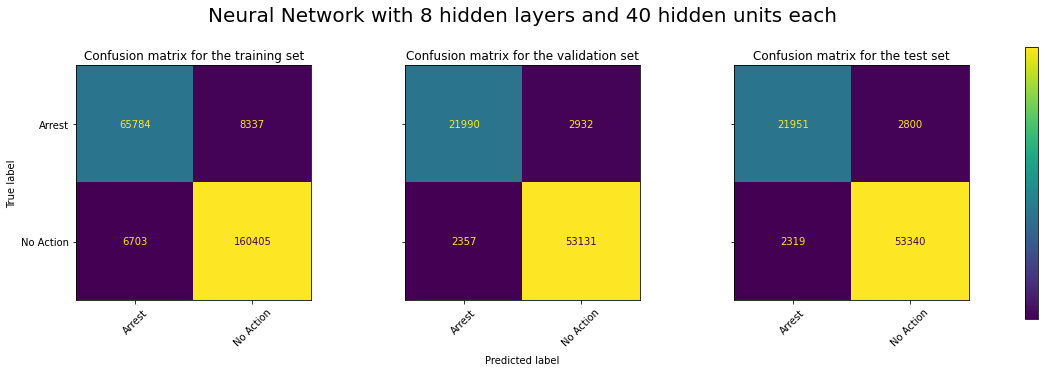

In [38]:
# Load the pre-computed results
cm_train_nn_sklearn = confusion_matrix(y_train, y_pred_train_nn_sklearn)
cm_val_nn_sklearn = confusion_matrix(y_val, y_pred_val_nn_sklearn)
cm_test_nn_sklearn = confusion_matrix(y_test, y_pred_test_nn_sklearn)

tmp_dict = {'training': cm_train_nn_sklearn, 'validation': cm_val_nn_sklearn, 'test': cm_test_nn_sklearn}
plot_cm_subplots(tmp_dict, 'Neural Network with 8 hidden layers and 40 hidden units each')

In [73]:
acc_list_nn_sklearn = [accuracy_score(y_train, y_pred_train_nn_sklearn), accuracy_score(y_val, y_pred_val_nn_sklearn), accuracy_score(y_test, y_pred_test_nn_sklearn)]
print("Accuracy on training set: %f" %accuracy_score(y_train, y_pred_train_nn_sklearn))
print("Accuracy on validation set: %f" %accuracy_score(y_val, y_pred_val_nn_sklearn))
print("Accuracy on test set: %f" %accuracy_score(y_test, y_pred_test_nn_sklearn))

Accuracy on training set: 0.937653
Accuracy on validation set: 0.934225
Accuracy on test set: 0.936339


In [40]:
cols = ['Training', 'Validation', 'Test']
tmp_dict = {'Dummy classifier': acc_list_dummy, 'k-NN (scikit-learn)': acc_list_knn_sklearn, 'k-NN (faiss)': acc_list_knn_faiss, 'NN': acc_list_nn_sklearn}
acc_df = pd.DataFrame(tmp_dict).T
acc_df.columns = cols
acc_df

,Training,Validation,Test
Dummy classifier,0.307264,0.309937,0.307810
k-NN (scikit-learn),0.948713,0.930270,0.932135
k-NN (faiss),0.948729,0.930233,0.932098
NN,0.937653,0.934225,0.936339


# Learning curves

## Computing the learning curves

***

`If you have already loaded the pickle file: You can skip this part and move on to "Plotting the learning curves"`

***

In [ ]:
train_sizes_knn, train_scores_knn, test_scores_knn, fit_times_knn, _ = \
    learning_curve(knn_sklearn, X_train_norm, y_train, n_jobs=-1,
                   return_times=True)

In [ ]:
# pickle.dump(train_sizes_knn, open('pickles/train_sizes_knn.sav', 'wb'))
# pickle.dump(train_scores_knn, open('pickles/train_scores_knn.sav', 'wb'))
# pickle.dump(test_scores_knn, open('pickles/test_scores_knn.sav', 'wb'))
# pickle.dump(fit_times_knn, open('pickles/fit_times_knn.sav', 'wb'))

In [ ]:
train_sizes_nn, train_scores_nn, test_scores_nn, fit_times_nn, _ = \
    learning_curve(nn_sklearn, X_train_norm, y_train, n_jobs=-1,
                   return_times=True)

In [ ]:
# pickle.dump(train_sizes_nn, open('pickles/train_sizes_nn.sav', 'wb'))
# pickle.dump(train_scores_nn, open('pickles/train_scores_nn.sav', 'wb'))
# pickle.dump(test_scores_nn, open('pickles/test_scores_nn.sav', 'wb'))
# pickle.dump(fit_times_nn, open('pickles/fit_times_nn.sav', 'wb'))

## Plotting the learning curves

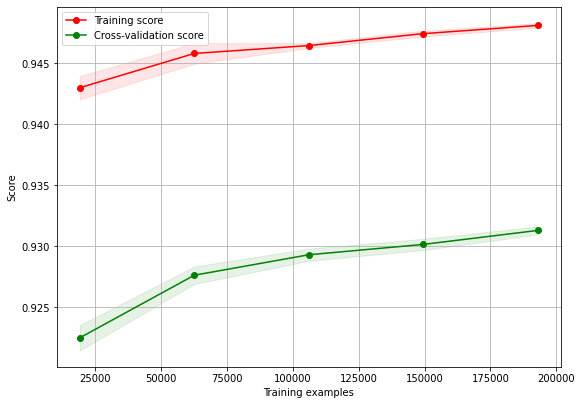

In [18]:
train_scores_mean_knn = np.mean(train_scores_knn, axis=1)
train_scores_std_knn = np.std(train_scores_knn, axis=1)
test_scores_mean_knn = np.mean(test_scores_knn, axis=1)
test_scores_std_knn = np.std(test_scores_knn, axis=1)
fit_times_mean_knn = np.mean(fit_times_knn, axis=1)
fit_times_std_knn = np.std(fit_times_knn, axis=1)

# Plot learning curve
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.xlim()
plt.fill_between(train_sizes_knn, train_scores_mean_knn - train_scores_std_knn,
                     train_scores_mean_knn + train_scores_std_knn, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes_knn, test_scores_mean_knn - test_scores_std_knn,
                     test_scores_mean_knn + test_scores_std_knn, alpha=0.1,
                     color="g")
plt.plot(train_sizes_knn, train_scores_mean_knn, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes_knn, test_scores_mean_knn, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.show()

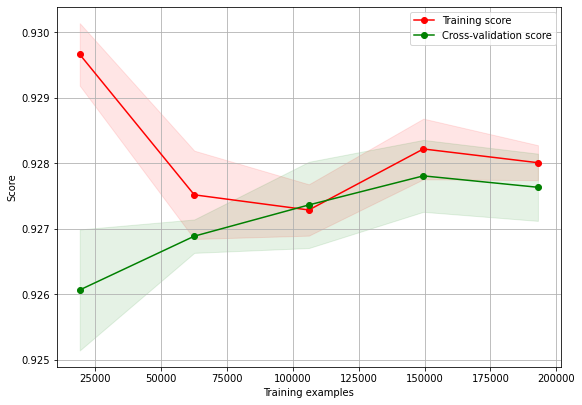

In [19]:
train_scores_mean_nn = np.mean(train_scores_nn, axis=1)
train_scores_std_nn = np.std(train_scores_nn, axis=1)
test_scores_mean_nn = np.mean(test_scores_nn, axis=1)
test_scores_std_nn = np.std(test_scores_nn, axis=1)
fit_times_mean_nn = np.mean(fit_times_nn, axis=1)
fit_times_std_nn = np.std(fit_times_nn, axis=1)

# Plot learning curve
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.xlim()
plt.fill_between(train_sizes_nn, train_scores_mean_nn - train_scores_std_nn,
                     train_scores_mean_nn + train_scores_std_nn, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes_nn, test_scores_mean_nn - test_scores_std_nn,
                     test_scores_mean_nn + test_scores_std_nn, alpha=0.1,
                     color="g")
plt.plot(train_sizes_nn, train_scores_mean_nn, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes_nn, test_scores_mean_nn, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.show()

# Fairness Metrics: Independence, Separation and Sufficiency

To check the fairness of the model, we measure the independence, separation and sufficiency.

- Independence: sensitive features are statistically independent to the outcome of the prediction. 

- Separation: Given the target variable, sensitive features are statistically independent to the outcome of the prediction.

- Sufficiency: Given the outcome of the prediction, sensitive features are statistically independent to the target variable.

In [20]:
def independence(tn, fp, fn, tp):
    # change the calculation of output
    output = (tp + fp) / (tn + fp + fn + tp)
    return output

In [21]:
def separation(tn, fp, fn, tp):
    # change the calculation of the seperation for the two conditions Y_1 and Y_0
    Y_1 = tp / (tp + fp)
    Y_0 = tn / (tn + fn)
    return Y_1, Y_0

In [22]:
def sufficiency(tn, fp, fn, tp):
    # change the calculation of the seperation for the two conditions R_1 and R_0
    R_1 = tp / (tp + fn)
    R_0 = fp / (fp + tn)
    return R_1, R_0

# Race groups

Measuring the fairnes metrics for different race groups

In [23]:
# Choose which classifier to use
y_pred = y_pred_test_nn_sklearn # neural network sklearn
# y_pred = y_pred_test_knn_faiss # faiss knn
# y_pred = y_pred_test_knn_sklearn # knn sklearn

In [24]:
group_asian = X_test['driver_race_Asian'] == 1
group_black = X_test['driver_race_Black'] == 1
group_white = X_test['driver_race_White'] == 1
group_hispanic = X_test['driver_race_Hispanic'] == 1
group_other = X_test['driver_race_Other'] == 1

y_pred_asian = y_pred[group_asian]
y_test_asian = y_test[group_asian]
X_test_asian = X_test[group_asian]

y_pred_black = y_pred[group_black]
y_test_black = y_test[group_black]
X_test_black = X_test[group_black]

y_pred_white = y_pred[group_white]
y_test_white = y_test[group_white]
X_test_white = X_test[group_white]

y_pred_hispanic = y_pred[group_hispanic]
y_test_hispanic = y_test[group_hispanic]
X_test_hispanic = X_test[group_hispanic]

y_pred_other = y_pred[group_other]
y_test_other = y_test[group_other]
X_test_other = X_test[group_other]

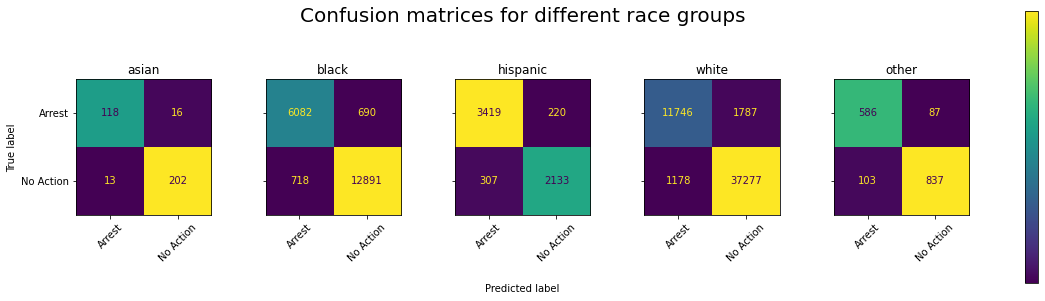

In [25]:
cm_asian = confusion_matrix(y_test_asian, y_pred_asian)
cm_black = confusion_matrix(y_test_black, y_pred_black)
cm_white = confusion_matrix(y_test_white, y_pred_white)
cm_hispanic = confusion_matrix(y_test_hispanic, y_pred_hispanic)
cm_other = confusion_matrix(y_test_other, y_pred_other)

tmp_dict = {'asian': cm_asian, 'black': cm_black, 'hispanic': cm_hispanic, 'white': cm_white, 'other': cm_other}
plot_cm_subplots(tmp_dict, 'Confusion matrices for different race groups', 0.1, 0.85, '')

In [26]:
tn_asian, fp_asian, fn_asian, tp_asian = confusion_matrix(y_test_asian, y_pred_asian).ravel()
tn_black, fp_black, fn_black, tp_black = confusion_matrix(y_test_black, y_pred_black).ravel()
tn_white, fp_white, fn_white, tp_white = confusion_matrix(y_test_white, y_pred_white).ravel()
tn_hispanic, fp_hispanic, fn_hispanic, tp_hispanic = confusion_matrix(y_test_hispanic, y_pred_hispanic).ravel()
tn_other, fp_other, fn_other, tp_other = confusion_matrix(y_test_other, y_pred_other).ravel()

### Independence for race groups

In [27]:
ind_asian = independence(tn_asian, fp_asian, fn_asian, tp_asian)
ind_black = independence(tn_black, fp_black, fn_black, tp_black)
ind_white = independence(tn_white, fp_white, fn_white, tp_white)
ind_hispanic = independence(tn_hispanic, fp_hispanic, fn_hispanic, tp_hispanic)
ind_other = independence(tn_other, fp_other, fn_other, tp_other)

In [28]:
print(ind_asian, ind_black, ind_white, ind_hispanic, ind_other)

0.6246418338108882 0.6663559197291595 0.7514041701931214 0.3870702418160882 0.5728456292622442


### Separation for race groups

In [29]:
sep_asian = separation(tn_asian, fp_asian, fn_asian, tp_asian)
sep_black = separation(tn_black, fp_black, fn_black, tp_black)
sep_white = separation(tn_white, fp_white, fn_white, tp_white)
sep_hispanic = separation(tn_hispanic, fp_hispanic, fn_hispanic, tp_hispanic)
sep_other = separation(tn_other, fp_other, fn_other, tp_other)

In [30]:
print(sep_asian, sep_black, sep_white, sep_hispanic, sep_other)

(0.926605504587156, 0.9007633587786259) (0.9491937265297107, 0.8944117647058824) (0.9542545566250256, 0.9088517486846177) (0.9065023374415639, 0.9176060118089103) (0.9058441558441559, 0.8505079825834543)


### Sufficiency for race groups

In [31]:
suf_asian = sufficiency(tn_asian, fp_asian, fn_asian, tp_asian)
suf_black = sufficiency(tn_black, fp_black, fn_black, tp_black)
suf_white = sufficiency(tn_white, fp_white, fn_white, tp_white)
suf_hispanic = sufficiency(tn_hispanic, fp_hispanic, fn_hispanic, tp_hispanic)
suf_other = sufficiency(tn_other, fp_other, fn_other, tp_other)

In [32]:
print(suf_asian, suf_black, suf_white, suf_hispanic, suf_other)

(0.9395348837209302, 0.11940298507462686) (0.947240796531707, 0.10189013585351447) (0.9693667923547002, 0.1320475873789995) (0.8741803278688525, 0.06045616927727398) (0.8904255319148936, 0.12927191679049035)


## Age groups

Measuring the fairnes metrics for different age groups

In [33]:
# Reference: https://www.sciencedirect.com/science/article/pii/S0386111214600315#:~:text=Three%20driver%20age%20groups%20(old,aged%20less%20than%2030%20years.
group_young = X_test['driver_age'] < 30
group_middle = (X_test['driver_age'] >= 30) & (X_test['driver_age'] < 65)
group_elderly = X_test['driver_age'] >= 65

In [34]:
y_pred_young = y_pred[group_young]
y_test_young = y_test[group_young]
X_test_young = X_test[group_young]

y_pred_middle = y_pred[group_middle]
y_test_middle = y_test[group_middle]
X_test_middle = X_test[group_middle]

y_pred_elderly = y_pred[group_elderly]
y_test_elderly = y_test[group_elderly]
X_test_elderly = X_test[group_elderly]

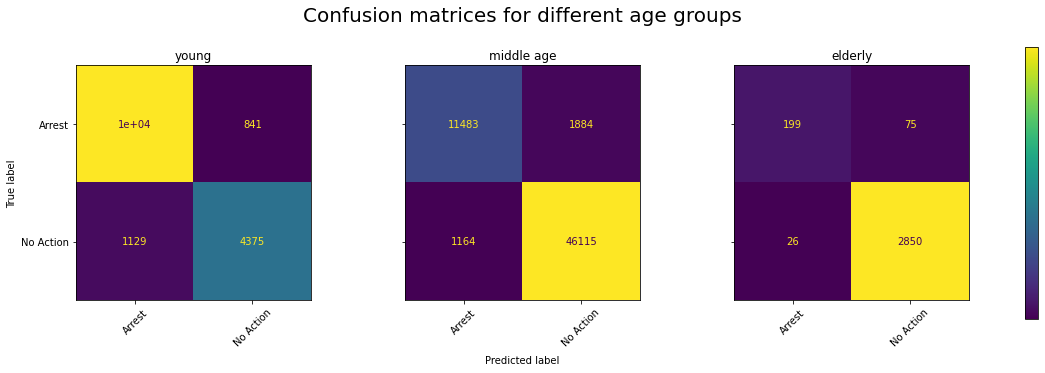

In [35]:
cm_young = confusion_matrix(y_test_young, y_pred_young)
cm_middle = confusion_matrix(y_test_middle, y_pred_middle)
cm_elderly = confusion_matrix(y_test_elderly, y_pred_elderly)

tmp_dict = {'young': cm_young, 'middle age': cm_middle, 'elderly': cm_elderly}
plot_cm_subplots(tmp_dict, 'Confusion matrices for different age groups', 0, 0.95, '')

In [36]:
tn_young, fp_young, fn_young, tp_young = confusion_matrix(y_test_young, y_pred_young).ravel()
tn_middle, fp_middle, fn_middle, tp_middle = confusion_matrix(y_test_middle, y_pred_middle).ravel()
tn_elderly, fp_elderly, fn_elderly, tp_elderly = confusion_matrix(y_test_elderly, y_pred_elderly).ravel()

### Independence for age groups

In [37]:
ind_young = independence(tn_young, fp_young, fn_young, tp_young)
ind_middle = independence(tn_middle, fp_middle, fn_middle, tp_middle)
ind_elderly = independence(tn_elderly, fp_elderly, fn_elderly, tp_elderly)

In [38]:
print(ind_young, ind_middle, ind_elderly)

0.3139520885999759 0.791461926590377 0.9285714285714286


### Separation for age groups

In [39]:
sep_young = separation(tn_young, fp_young, fn_young, tp_young)
sep_middle = separation(tn_middle, fp_middle, fn_middle, tp_middle)
sep_elderly = separation(tn_elderly, fp_elderly, fn_elderly, tp_elderly)

In [40]:
print(sep_young, sep_middle, sep_elderly)

(0.8387653374233128, 0.9009475346552027) (0.9607491822746307, 0.9079623626156401) (0.9743589743589743, 0.8844444444444445)


### Sufficiency for age groups

In [41]:
suf_young = sufficiency(tn_young, fp_young, fn_young, tp_young)
suf_middle = sufficiency(tn_middle, fp_middle, fn_middle, tp_middle)
suf_elderly = sufficiency(tn_elderly, fp_elderly, fn_elderly, tp_elderly)

In [42]:
print(suf_young, suf_middle, suf_elderly)

(0.7948764534883721, 0.0756975697569757) (0.9753801899363354, 0.14094411610683025) (0.9909596662030598, 0.2737226277372263)


## Gender

Measuring the fairnes metrics for different gender groups

In [43]:
group_female = X_test['driver_gender'] == 0
group_male = X_test['driver_gender'] == 1

In [44]:
y_pred_female = y_pred[group_female]
y_test_female = y_test[group_female]
X_test_female = X_test[group_female]

y_pred_male = y_pred[group_male]
y_test_male = y_test[group_male]
X_test_male = X_test[group_male]

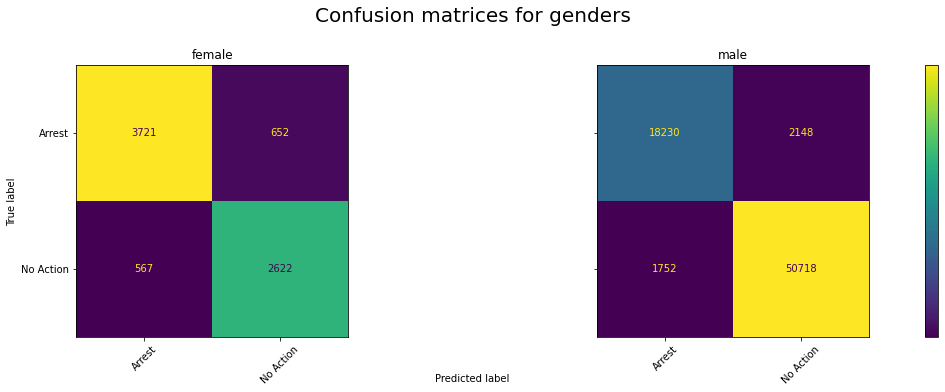

In [45]:
cm_female = confusion_matrix(y_test_female, y_pred_female)
cm_male = confusion_matrix(y_test_male, y_pred_male)

tmp_dict = {'female': cm_female, 'male': cm_male}
plot_cm_subplots(tmp_dict, 'Confusion matrices for genders', 0, 1, '')

In [46]:
tn_female, fp_female, fn_female, tp_female = confusion_matrix(y_test_female, y_pred_female).ravel()
tn_male, fp_male, fn_male, tp_male = confusion_matrix(y_test_male, y_pred_male).ravel()

### Independence for gender groups

In [47]:
ind_female = independence(tn_female, fp_female, fn_female, tp_female)
ind_male = independence(tn_male, fp_male, fn_male, tp_male)

In [48]:
print(ind_female, ind_male) 

0.4329542449087543 0.7257028332967275


### Separation for gender groups

In [49]:
sep_female = separation(tn_female, fp_female, fn_female, tp_female)
sep_male = separation(tn_male, fp_male, fn_male, tp_male)

In [50]:
print(sep_female, sep_male)

(0.8008552229688455, 0.8677705223880597) (0.9593689706049257, 0.9123210889800821)


### Sufficiency for gender groups

In [51]:
suf_female = sufficiency(tn_female, fp_female, fn_female, tp_female)
suf_male = sufficiency(tn_male, fp_male, fn_male, tp_male)

In [52]:
print(suf_female, suf_male)

(0.8222013170272813, 0.14909672993368397) (0.966609491137793, 0.10540779271763667)


# Fairness through unawareness

Leaving out sensitive features before fitting the model

## Creating new matrices

In [53]:
X_train_norm

,driver_gender,driver_age,violation,search_type,contraband_found,search_basis,officer_id,drugs_related_stop,district,stop_date:day_of_week,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White
376090,0.323003,0.315311,-0.170781,0.180831,-0.130247,0.088705,0.049197,-0.104827,0.079392,0.641341,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
381498,0.323003,-0.222630,-0.170781,0.180831,-0.130247,0.088705,0.165899,-0.104827,0.807083,0.110470,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
155966,0.323003,-0.991118,-0.170781,0.180831,-0.130247,0.088705,1.038166,-0.104827,0.503878,-0.420400,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
148275,0.323003,-1.067967,-0.170781,0.180831,-0.130247,0.088705,-0.847009,-0.104827,0.140033,-0.420400,-0.066466,1.701267,-0.287442,-0.144067,-1.339623
344347,0.323003,-0.606874,-0.170781,0.180831,-0.130247,0.088705,0.613253,-0.104827,0.564519,1.703081,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340621,0.323003,-0.068933,-0.170781,0.180831,-0.130247,0.088705,0.435209,-0.104827,0.807083,-0.420400,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
106869,0.323003,-0.299479,-0.170781,0.180831,-0.130247,0.088705,0.786809,-0.104827,-0.284453,-1.482141,-0.066466,-0.587797,3.478958,-0.144067,-1.339623
92828,0.323003,-0.530026,-0.170781,0.180831,-0.130247,0.088705,-1.316806,-0.104827,0.867724,-0.951271,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
37632,0.323003,-1.144816,-0.170781,0.180831,-0.130247,0.088705,1.005250,-0.104827,1.110287,-0.951271,-0.066466,-0.587797,-0.287442,-0.144067,0.746479


### New X matrices where the race groups are dropped (model is unaware of subject's race)

In [54]:
#dropping race from training test and validation set:

X_train_norace = X_train_norm.drop (columns=["driver_race_Asian","driver_race_Black","driver_race_Hispanic","driver_race_Other",
                                             "driver_race_White" ])
X_test_norace = X_test_norm.drop(columns=["driver_race_Asian","driver_race_Black","driver_race_Hispanic","driver_race_Other",
                                             "driver_race_White" ]) 
X_val_norace = X_val_norm.drop(columns=["driver_race_Asian","driver_race_Black","driver_race_Hispanic","driver_race_Other",
                                             "driver_race_White" ]) 

In [55]:
X_train_norace

,driver_gender,driver_age,violation,search_type,contraband_found,search_basis,officer_id,drugs_related_stop,district,stop_date:day_of_week
376090,0.323003,0.315311,-0.170781,0.180831,-0.130247,0.088705,0.049197,-0.104827,0.079392,0.641341
381498,0.323003,-0.222630,-0.170781,0.180831,-0.130247,0.088705,0.165899,-0.104827,0.807083,0.110470
155966,0.323003,-0.991118,-0.170781,0.180831,-0.130247,0.088705,1.038166,-0.104827,0.503878,-0.420400
148275,0.323003,-1.067967,-0.170781,0.180831,-0.130247,0.088705,-0.847009,-0.104827,0.140033,-0.420400
344347,0.323003,-0.606874,-0.170781,0.180831,-0.130247,0.088705,0.613253,-0.104827,0.564519,1.703081
...,...,...,...,...,...,...,...,...,...,...
340621,0.323003,-0.068933,-0.170781,0.180831,-0.130247,0.088705,0.435209,-0.104827,0.807083,-0.420400
106869,0.323003,-0.299479,-0.170781,0.180831,-0.130247,0.088705,0.786809,-0.104827,-0.284453,-1.482141
92828,0.323003,-0.530026,-0.170781,0.180831,-0.130247,0.088705,-1.316806,-0.104827,0.867724,-0.951271
37632,0.323003,-1.144816,-0.170781,0.180831,-0.130247,0.088705,1.005250,-0.104827,1.110287,-0.951271


### New X matrices where the gender groups are dropped (model is unaware of subject's gender)

In [56]:
#dropping gender
X_train_nogender = X_train_norm.drop (columns=["driver_gender" ])
X_test_nogender= X_test_norm.drop(columns=["driver_gender" ])
X_val_nogender= X_val_norm.drop(columns=["driver_gender" ])

In [57]:
X_train_nogender

,driver_age,violation,search_type,contraband_found,search_basis,officer_id,drugs_related_stop,district,stop_date:day_of_week,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White
376090,0.315311,-0.170781,0.180831,-0.130247,0.088705,0.049197,-0.104827,0.079392,0.641341,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
381498,-0.222630,-0.170781,0.180831,-0.130247,0.088705,0.165899,-0.104827,0.807083,0.110470,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
155966,-0.991118,-0.170781,0.180831,-0.130247,0.088705,1.038166,-0.104827,0.503878,-0.420400,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
148275,-1.067967,-0.170781,0.180831,-0.130247,0.088705,-0.847009,-0.104827,0.140033,-0.420400,-0.066466,1.701267,-0.287442,-0.144067,-1.339623
344347,-0.606874,-0.170781,0.180831,-0.130247,0.088705,0.613253,-0.104827,0.564519,1.703081,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340621,-0.068933,-0.170781,0.180831,-0.130247,0.088705,0.435209,-0.104827,0.807083,-0.420400,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
106869,-0.299479,-0.170781,0.180831,-0.130247,0.088705,0.786809,-0.104827,-0.284453,-1.482141,-0.066466,-0.587797,3.478958,-0.144067,-1.339623
92828,-0.530026,-0.170781,0.180831,-0.130247,0.088705,-1.316806,-0.104827,0.867724,-0.951271,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
37632,-1.144816,-0.170781,0.180831,-0.130247,0.088705,1.005250,-0.104827,1.110287,-0.951271,-0.066466,-0.587797,-0.287442,-0.144067,0.746479


### New X matrices where the age groups are dropped (model is unaware of subject's age)

In [58]:
#dropping age
X_train_noage = X_train_norm.drop (columns=["driver_age" ])
X_test_noage= X_test_norm.drop(columns=["driver_age" ])
X_val_noage= X_val_norm.drop(columns=["driver_age" ])

In [59]:
X_train_noage

,driver_gender,violation,search_type,contraband_found,search_basis,officer_id,drugs_related_stop,district,stop_date:day_of_week,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White
376090,0.323003,-0.170781,0.180831,-0.130247,0.088705,0.049197,-0.104827,0.079392,0.641341,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
381498,0.323003,-0.170781,0.180831,-0.130247,0.088705,0.165899,-0.104827,0.807083,0.110470,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
155966,0.323003,-0.170781,0.180831,-0.130247,0.088705,1.038166,-0.104827,0.503878,-0.420400,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
148275,0.323003,-0.170781,0.180831,-0.130247,0.088705,-0.847009,-0.104827,0.140033,-0.420400,-0.066466,1.701267,-0.287442,-0.144067,-1.339623
344347,0.323003,-0.170781,0.180831,-0.130247,0.088705,0.613253,-0.104827,0.564519,1.703081,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340621,0.323003,-0.170781,0.180831,-0.130247,0.088705,0.435209,-0.104827,0.807083,-0.420400,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
106869,0.323003,-0.170781,0.180831,-0.130247,0.088705,0.786809,-0.104827,-0.284453,-1.482141,-0.066466,-0.587797,3.478958,-0.144067,-1.339623
92828,0.323003,-0.170781,0.180831,-0.130247,0.088705,-1.316806,-0.104827,0.867724,-0.951271,-0.066466,-0.587797,-0.287442,-0.144067,0.746479
37632,0.323003,-0.170781,0.180831,-0.130247,0.088705,1.005250,-0.104827,1.110287,-0.951271,-0.066466,-0.587797,-0.287442,-0.144067,0.746479


### New X matrices where all sensitive features are dropped (model is unaware of subject's race, gender and age)

In [60]:
X_train_unaw = X_train_norm.drop (columns=["driver_race_Asian","driver_race_Black","driver_race_Hispanic","driver_race_Other",
                                             "driver_race_White", "driver_gender","driver_age" ])
X_test_unaw = X_test_norm.drop(columns=["driver_race_Asian","driver_race_Black","driver_race_Hispanic","driver_race_Other",
                                             "driver_race_White", "driver_gender", "driver_age" ]) 
X_val_unaw = X_val_norm.drop(columns=["driver_race_Asian","driver_race_Black","driver_race_Hispanic","driver_race_Other",
                                             "driver_race_White", "driver_gender", "driver_age" ]) 

In [61]:
X_train_unaw

,violation,search_type,contraband_found,search_basis,officer_id,drugs_related_stop,district,stop_date:day_of_week
376090,-0.170781,0.180831,-0.130247,0.088705,0.049197,-0.104827,0.079392,0.641341
381498,-0.170781,0.180831,-0.130247,0.088705,0.165899,-0.104827,0.807083,0.110470
155966,-0.170781,0.180831,-0.130247,0.088705,1.038166,-0.104827,0.503878,-0.420400
148275,-0.170781,0.180831,-0.130247,0.088705,-0.847009,-0.104827,0.140033,-0.420400
344347,-0.170781,0.180831,-0.130247,0.088705,0.613253,-0.104827,0.564519,1.703081
...,...,...,...,...,...,...,...,...
340621,-0.170781,0.180831,-0.130247,0.088705,0.435209,-0.104827,0.807083,-0.420400
106869,-0.170781,0.180831,-0.130247,0.088705,0.786809,-0.104827,-0.284453,-1.482141
92828,-0.170781,0.180831,-0.130247,0.088705,-1.316806,-0.104827,0.867724,-0.951271
37632,-0.170781,0.180831,-0.130247,0.088705,1.005250,-0.104827,1.110287,-0.951271


## Training the classifiers using the new matrices

***

`If you have already loaded the pickle file: You can skip this part and move on to "Measuring model performance"`

***

### Without race

In [ ]:
# Create an instance of NN with hidden_layer_sizes=(20,)
nn_norace = MLPClassifier(solver='adam', alpha=1e-5,
                hidden_layer_sizes=(40,8), random_state=1, max_iter=1000)
print("Created an instance of NN")

# Train the model on the training set with the encoded labels
nn_norace.fit(X_train_norace, y_train)
print("Fitting complete")

#predictions for training, validation and test set:
y_pred_train_norace = nn_norace.predict(X_train_norace)
print("Training prediction complete")
y_pred_val_norace = nn_norace.predict(X_val_norace)
print("Validation prediction complete")
y_pred_test_norace = nn_norace.predict(X_test_norace)
print("Test prediction complete")

In [ ]:
# Save the classifier and the variables to disk
# pickle.dump(nn_norace, open('pickles/nn_norace.sav', 'wb'))
# pickle.dump(y_pred_train_norace, open('pickles/y_pred_train_norace.sav', 'wb'))
# pickle.dump(y_pred_val_norace, open('pickles/y_pred_val_norace.sav', 'wb'))
# pickle.dump(y_pred_test_norace, open('pickles/y_pred_test_norace.sav', 'wb'))

### Without gender

In [ ]:
# Create an instance of NN with hidden_layer_sizes=(20,)
nn_nogender = MLPClassifier(solver='adam', alpha=1e-5,
                hidden_layer_sizes=(40,8), random_state=1, max_iter=1000)
print("Created an instance of NN")
# Train the model on the training set with the encoded labels
nn_nogender.fit(X_train_nogender, y_train)
print("Fitting complete")

#predictions for training, validation and test set:
y_pred_train_nogender = nn_nogender.predict(X_train_nogender)
print("Training prediction complete")
y_pred_val_nogender = nn_nogender.predict(X_val_nogender)
print("Validation prediction complete")
y_pred_test_nogender = nn_nogender.predict(X_test_nogender)
print("Test prediction complete")

In [ ]:
# Save the classifier and the variables to disk
# pickle.dump(nn_nogender, open('pickles/nn_nogender.sav', 'wb'))
# pickle.dump(y_pred_train_nogender, open('pickles/y_pred_train_nogender.sav', 'wb'))
# pickle.dump(y_pred_val_nogender, open('pickles/y_pred_val_nogender.sav', 'wb'))
# pickle.dump(y_pred_test_nogender, open('pickles/y_pred_test_nogender.sav', 'wb'))

### Without age

In [ ]:
# Create an instance of NN with hidden_layer_sizes=(20,)
nn_noage = MLPClassifier(solver='adam', alpha=1e-5,
                hidden_layer_sizes=(40,8), random_state=1, max_iter=1000)
print("Created an instance of NN")

# Train the model on the training set with the encoded labels
nn_noage.fit(X_train_noage, y_train)
print("Fitting complete")

#predictions for training, validation and test set:
y_pred_train_noage = nn_noage.predict(X_train_noage)
print("Training prediction complete")
y_pred_val_noage = nn_noage.predict(X_val_noage)
print("Validation prediction complete")
y_pred_test_noage = nn_noage.predict(X_test_noage)
print("Test prediction complete")

In [85]:
# Save the classifier and the variables to disk
# pickle.dump(nn_noage, open('pickles/nn_noage.sav', 'wb'))
# pickle.dump(y_pred_train_noage, open('pickles/y_pred_train_noage.sav', 'wb'))
# pickle.dump(y_pred_val_noage, open('pickles/y_pred_val_noage.sav', 'wb'))
# pickle.dump(y_pred_test_noage, open('pickles/y_pred_test_noage.sav', 'wb'))

### Without any sensitive features

In [86]:
# Create an instance of NN with hidden_layer_sizes=(20,)
nn_unaw = MLPClassifier(solver='adam', alpha=1e-5,
                hidden_layer_sizes=(40,8), random_state=1, max_iter=1000)
print("Created an instance of NN")

# Train the model on the training set with the encoded labels
nn_unaw.fit(X_train_unaw, y_train)
print("Fitting complete")

#predictions for training, validation and test set:
y_pred_train_unaw = nn_unaw.predict(X_train_unaw)
print("Training prediction complete")
y_pred_val_unaw = nn_unaw.predict(X_val_unaw)
print("Validation prediction complete")
y_pred_test_unaw = nn_unaw.predict(X_test_unaw)
print("Test prediction complete")

Created an instance of NN
Fitting complete
Training prediction complete
Validation prediction complete
Test prediction complete


In [87]:
# Save the classifier and the variables to disk
# pickle.dump(nn_unaw, open('pickles/nn_unaw.sav', 'wb'))
# pickle.dump(y_pred_train_unaw, open('pickles/y_pred_train_unaw.sav', 'wb'))
# pickle.dump(y_pred_val_unaw, open('pickles/y_pred_val_unaw.sav', 'wb'))
# pickle.dump(y_pred_test_unaw, open('pickles/y_pred_test_unaw.sav', 'wb'))

## Measuring model performance

### Without race

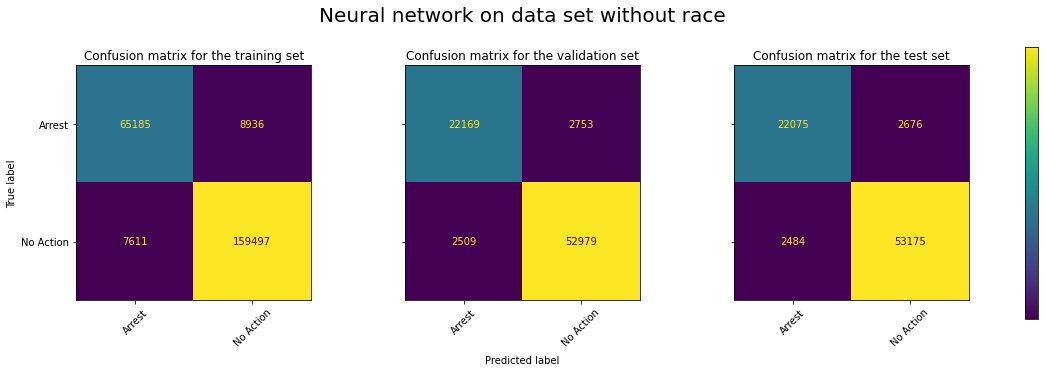

In [63]:
cm_train_nn_norace = confusion_matrix(y_train, y_pred_train_norace)
cm_val_nn_norace = confusion_matrix(y_val, y_pred_val_norace)
cm_test_nn_norace = confusion_matrix(y_test, y_pred_test_norace)

tmp_dict = {'training': cm_train_nn_norace, 'validation': cm_val_nn_norace, 'test': cm_test_nn_norace}
plot_cm_subplots(tmp_dict, 'Neural network on data set without race')

In [64]:
acc_list_norace = [accuracy_score(y_train, y_pred_train_norace), accuracy_score(y_val, y_pred_val_norace), accuracy_score(y_test, y_pred_test_norace)]
print("Accuracy on training set: %f" %accuracy_score(y_train, y_pred_train_norace))
print("Accuracy on validation set: %f" %accuracy_score(y_val, y_pred_val_norace))
print("Accuracy on test set: %f" %accuracy_score(y_test, y_pred_test_norace))

Accuracy on training set: 0.931405
Accuracy on validation set: 0.934560
Accuracy on test set: 0.935829


### Without gender

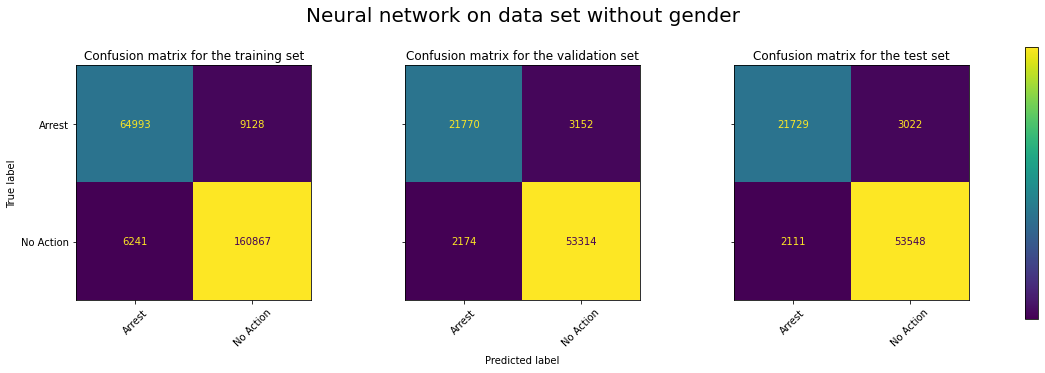

In [65]:
cm_train_nn_gender = confusion_matrix(y_train, y_pred_train_nogender)
cm_val_nn_gender = confusion_matrix(y_val, y_pred_val_nogender)
cm_test_nn_gender = confusion_matrix(y_test, y_pred_test_nogender)

tmp_dict = {'training': cm_train_nn_gender, 'validation': cm_val_nn_gender, 'test': cm_test_nn_gender}
plot_cm_subplots(tmp_dict, 'Neural network on data set without gender')

In [66]:
acc_list_nogender = [accuracy_score(y_train, y_pred_train_nogender), accuracy_score(y_val, y_pred_val_nogender), accuracy_score(y_test, y_pred_test_nogender)]
print("Accuracy on training set: %f" %accuracy_score(y_train, y_pred_train_nogender))
print("Accuracy on validation set: %f" %accuracy_score(y_val, y_pred_val_nogender))
print("Accuracy on test set: %f" %accuracy_score(y_test, y_pred_test_nogender))

Accuracy on training set: 0.936289
Accuracy on validation set: 0.933764
Accuracy on test set: 0.936165


### Without age

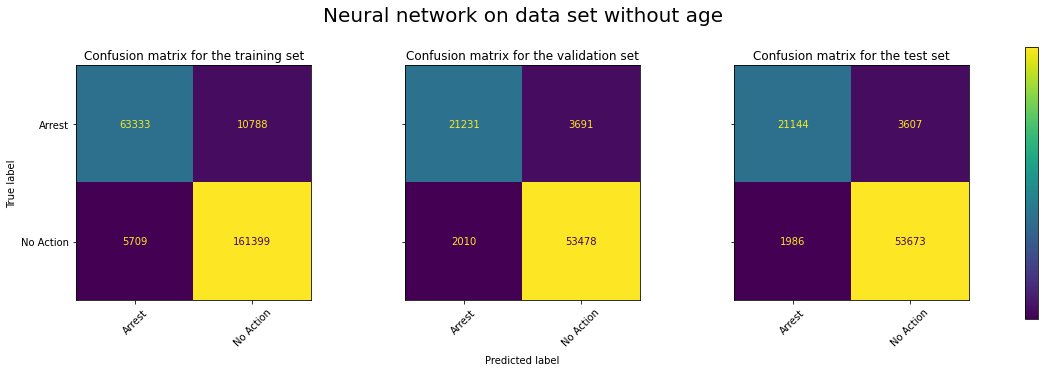

In [67]:
cm_train_nn_age = confusion_matrix(y_train, y_pred_train_noage)
cm_val_nn_age = confusion_matrix(y_val, y_pred_val_noage)
cm_test_nn_age = confusion_matrix(y_test, y_pred_test_noage)

tmp_dict = {'training': cm_train_nn_age, 'validation': cm_val_nn_age, 'test': cm_test_nn_age}
plot_cm_subplots(tmp_dict, 'Neural network on data set without age')

In [68]:
acc_list_noage = [accuracy_score(y_train, y_pred_train_noage), accuracy_score(y_val, y_pred_val_noage), accuracy_score(y_test, y_pred_test_noage)]
print("Accuracy on training set: %f" %accuracy_score(y_train, y_pred_train_noage))
print("Accuracy on validation set: %f" %accuracy_score(y_val, y_pred_val_noage))
print("Accuracy on test set: %f" %accuracy_score(y_test, y_pred_test_noage))

Accuracy on training set: 0.931613
Accuracy on validation set: 0.929101
Accuracy on test set: 0.930444


### Without any sensitive characteristics

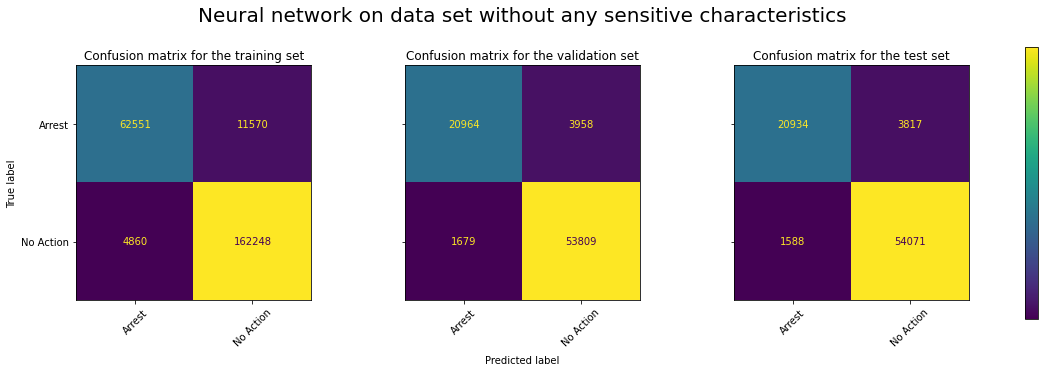

In [69]:
cm_train_nn_unaw = confusion_matrix(y_train, y_pred_train_unaw)
cm_val_nn_unaw = confusion_matrix(y_val, y_pred_val_unaw)
cm_test_nn_unaw = confusion_matrix(y_test, y_pred_test_unaw)

tmp_dict = {'training': cm_train_nn_unaw, 'validation': cm_val_nn_unaw, 'test': cm_test_nn_unaw}
plot_cm_subplots(tmp_dict, 'Neural network on data set without any sensitive characteristics')

In [70]:
acc_list_unaw = [accuracy_score(y_train, y_pred_train_unaw), accuracy_score(y_val, y_pred_val_unaw), accuracy_score(y_test, y_pred_test_unaw)]
print("Accuracy on training set: %f" %accuracy_score(y_train, y_pred_train_unaw))
print("Accuracy on validation set: %f" %accuracy_score(y_val, y_pred_val_unaw))
print("Accuracy on test set: %f" %accuracy_score(y_test, y_pred_test_unaw))

Accuracy on training set: 0.931890
Accuracy on validation set: 0.929897
Accuracy on test set: 0.932782


In [74]:
cols = ['Training', 'Validation', 'Test']
tmp_dict = {'Full data set': acc_list_nn_sklearn, 'No race': acc_list_norace, 'No gender': acc_list_nogender, 'No age': acc_list_noage, 'No sensitive characteristics': acc_list_unaw,}
acc_df = pd.DataFrame(tmp_dict).T
acc_df.columns = cols
acc_df

,Training,Validation,Test
Full data set,0.937653,0.934225,0.936339
No race,0.931405,0.934560,0.935829
No gender,0.936289,0.933764,0.936165
No age,0.931613,0.929101,0.930444
No sensitive characteristics,0.931890,0.929897,0.932782


## Fairness criteria for the new matrices

### Dropping race from X matrix

In [75]:
#split into races
group_asian = X_test['driver_race_Asian'] == 1
group_black = X_test['driver_race_Black'] == 1
group_white = X_test['driver_race_White'] == 1
group_hispanic = X_test['driver_race_Hispanic'] == 1
group_other = X_test['driver_race_Other'] == 1 

#define variable for each race
y_pred_asian_norace = y_pred_test_norace[group_asian]
y_test_asian = y_test[group_asian]
X_test_asian_norace = X_test_norace[group_asian]

y_pred_black_norace = y_pred_test_norace[group_black]
y_test_black = y_test[group_black]
X_test_black_norace = X_test_norace[group_black]

y_pred_white_norace = y_pred_test_norace[group_white]
y_test_white = y_test[group_white]
X_test_white_norace = X_test_norace[group_white]

y_pred_hispanic_norace = y_pred_test_norace[group_hispanic]
y_test_hispanic = y_test[group_hispanic]
X_test_hispanic_norace = X_test_norace[group_hispanic]

y_pred_other_norace = y_pred_test_norace[group_other]
y_test_other = y_test[group_other]
X_test_other_norace = X_test_norace[group_other]

#### Confusion matrices

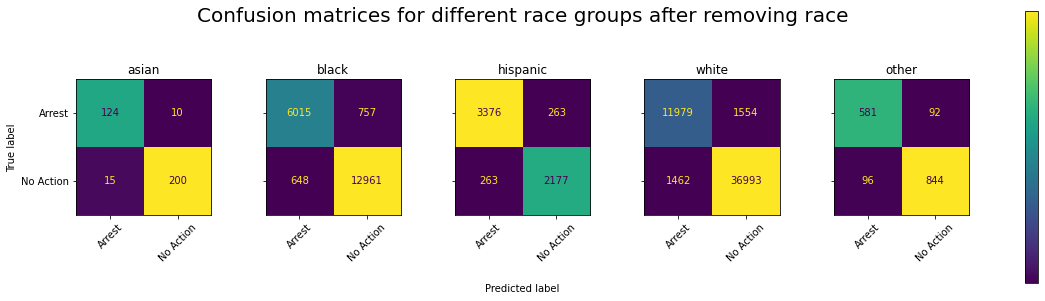

In [76]:
#calculate confusion matrix values
cm_asian_norace = confusion_matrix(y_test_asian, y_pred_asian_norace)
cm_black_norace = confusion_matrix(y_test_black, y_pred_black_norace)
cm_white_norace = confusion_matrix(y_test_white, y_pred_white_norace)
cm_hispanic_norace = confusion_matrix(y_test_hispanic, y_pred_hispanic_norace)
cm_other_norace = confusion_matrix(y_test_other, y_pred_other_norace)

tmp_dict = {'asian': cm_asian_norace, 'black': cm_black_norace, 'hispanic': cm_hispanic_norace, 'white': cm_white_norace, 'other': cm_other_norace}
plot_cm_subplots(tmp_dict, 'Confusion matrices for different race groups after removing race', 0.1, 0.85, '')

In [77]:
#calculate true negative, false positive, false negative and true positive
tn_asian_norace, fp_asian_norace, fn_asian_norace, tp_asian_norace = confusion_matrix(y_test_asian, y_pred_asian_norace).ravel()
tn_black_norace, fp_black_norace, fn_black_norace, tp_black_norace = confusion_matrix(y_test_black, y_pred_black_norace).ravel()
tn_white_norace, fp_white_norace, fn_white_norace, tp_white_norace = confusion_matrix(y_test_white, y_pred_white_norace).ravel()
tn_hispanic_norace, fp_hispanic_norace, fn_hispanic_norace, tp_hispanic_norace = confusion_matrix(y_test_hispanic, y_pred_hispanic_norace).ravel()
tn_other_norace, fp_other_norace, fn_other_norace, tp_other_norace = confusion_matrix(y_test_other, y_pred_other_norace).ravel()

#### Fairness Metrics for race groups

- the fairness metrics for the current model where sensitive features are dropped
- the current fairness metrics are compared with the ones from previous task (where sensitive features are included)

In [78]:
#independence:
ind_asian_norace = independence(tn_asian_norace, fp_asian_norace, fn_asian_norace, tp_asian_norace)
ind_black_norace = independence(tn_black_norace, fp_black_norace, fn_black_norace, tp_black_norace)
ind_white_norace = independence(tn_white_norace, fp_white_norace, fn_white_norace, tp_white_norace)
ind_hispanic_norace = independence(tn_hispanic_norace, fp_hispanic_norace, fn_hispanic_norace, tp_hispanic_norace)
ind_other_norace = independence(tn_other_norace, fp_other_norace, fn_other_norace, tp_other_norace)

In [79]:
print(ind_asian_norace, ind_black_norace, ind_white_norace, ind_hispanic_norace, ind_other_norace)
print(ind_asian, ind_black, ind_white, ind_hispanic, ind_other)

0.6017191977077364 0.6730778666404985 0.7414595675925213 0.40138180621812797 0.5802851828890266
0.6246418338108882 0.6663559197291595 0.7514041701931214 0.3870702418160882 0.5728456292622442


In [80]:
#separation:
sep_asian_norace = separation(tn_asian_norace, fp_asian_norace, fn_asian_norace, tp_asian_norace)
sep_black_norace = separation(tn_black_norace, fp_black_norace, fn_black_norace, tp_black_norace)
sep_white_norace = separation(tn_white_norace, fp_white_norace, fn_white_norace, tp_white_norace)
sep_hispanic_norace = separation(tn_hispanic_norace, fp_hispanic_norace, fn_hispanic_norace, tp_hispanic_norace)
sep_other_norace = separation(tn_other_norace, fp_other_norace, fn_other_norace, tp_other_norace)

In [81]:
#comparing separation scores (previous and current with features dropped)
print(sep_asian_norace, sep_black_norace, sep_white_norace, sep_hispanic_norace, sep_other_norace)
print(sep_asian, sep_black, sep_white, sep_hispanic, sep_other)

(0.9523809523809523, 0.8920863309352518) (0.944817028721388, 0.9027465105808195) (0.9596855786442525, 0.8912283312253553) (0.8922131147540984, 0.9277273976367134) (0.9017094017094017, 0.8581979320531757)
(0.926605504587156, 0.9007633587786259) (0.9491937265297107, 0.8944117647058824) (0.9542545566250256, 0.9088517486846177) (0.9065023374415639, 0.9176060118089103) (0.9058441558441559, 0.8505079825834543)


In [82]:
#sufficiency
suf_asian_norace = sufficiency(tn_asian_norace, fp_asian_norace, fn_asian_norace, tp_asian_norace)
suf_black_norace = sufficiency(tn_black_norace, fp_black_norace, fn_black_norace, tp_black_norace)
suf_white_norace = sufficiency(tn_white_norace, fp_white_norace, fn_white_norace, tp_white_norace)
suf_hispanic_norace = sufficiency(tn_hispanic_norace, fp_hispanic_norace, fn_hispanic_norace, tp_hispanic_norace)
suf_other_norace = sufficiency(tn_other_norace, fp_other_norace, fn_other_norace, tp_other_norace)

In [83]:
#comparing sufficiency scores (previous and current with features dropped)
print(suf_asian_norace, suf_black_norace, suf_white_norace, suf_hispanic_norace, suf_other_norace)
print(suf_asian, suf_black, suf_white, suf_hispanic, suf_other)

(0.9302325581395349, 0.07462686567164178) (0.9523844514659416, 0.11178381571175429) (0.9619815368612664, 0.1148304145422301) (0.8922131147540984, 0.07227260236328661) (0.8978723404255319, 0.13670133729569092)
(0.9395348837209302, 0.11940298507462686) (0.947240796531707, 0.10189013585351447) (0.9693667923547002, 0.1320475873789995) (0.8741803278688525, 0.06045616927727398) (0.8904255319148936, 0.12927191679049035)


### Dropping age from X matrix

In [84]:
#split into age groups (see above)
group_young = X_test['driver_age'] < 30
group_middle = (X_test['driver_age'] >= 30) & (X_test['driver_age'] < 65)
group_elderly = X_test['driver_age'] >= 65

In [85]:
y_pred_young_noage = y_pred_test_noage[group_young]
y_test_young = y_test[group_young]
X_test_young_noage = X_test_noage[group_young]

y_pred_middle_noage = y_pred_test_noage[group_middle]
y_test_middle = y_test[group_middle]
X_test_middle_noage = X_test_noage[group_middle]

y_pred_elderly_noage = y_pred_test_noage[group_elderly]
y_test_elderly = y_test[group_elderly]
X_test_elderly_noage = X_test_noage[group_elderly]

#### Confusion matrices

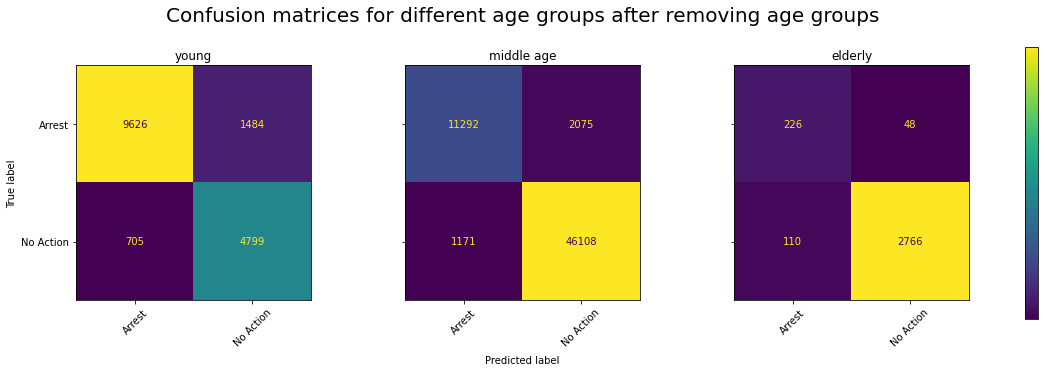

In [86]:
#confusion matrix
cm_young_noage = confusion_matrix(y_test_young, y_pred_young_noage)
cm_middle_noage = confusion_matrix(y_test_middle, y_pred_middle_noage)
cm_elderly_noage = confusion_matrix(y_test_elderly, y_pred_elderly_noage)

tmp_dict = {'young': cm_young_noage, 'middle age': cm_middle_noage, 'elderly': cm_elderly_noage}
plot_cm_subplots(tmp_dict, 'Confusion matrices for different age groups after removing age groups', 0, 0.95, '')

In [87]:
#calculate true negative, false positive, false negative and true positive
tn_young_noage, fp_young_noage, fn_young_noage, tp_young_noage = confusion_matrix(y_test_young, y_pred_young_noage).ravel()
tn_middle_noage, fp_middle_noage, fn_middle_noage, tp_middle_noage = confusion_matrix(y_test_middle, y_pred_middle_noage).ravel()
tn_elderly_noage, fp_elderly_noage, fn_elderly_noage, tp_elderly_noage = confusion_matrix(y_test_elderly, y_pred_elderly_noage).ravel()

#### Fairness metrics for age groups

- the fairness metrics for the current model where sensitive features are dropped
- the current fairness metrics are compared with the ones from previous task (where sensitive features are included)

In [88]:
#independence
ind_young_noage = independence(tn_young_noage, fp_young_noage, fn_young_noage, tp_young_noage)
ind_middle_noage = independence(tn_middle_noage, fp_middle_noage, fn_middle_noage, tp_middle_noage)
ind_elderly_noage = independence(tn_elderly_noage, fp_elderly_noage, fn_elderly_noage, tp_elderly_noage)

In [89]:
print(ind_young_noage, ind_middle_noage, ind_elderly_noage)
print(ind_young, ind_middle, ind_elderly)

0.3781750331046106 0.7944959271839858 0.8933333333333333
0.3139520885999759 0.791461926590377 0.9285714285714286


In [90]:
#separation
sep_young_noage = separation(tn_young_noage, fp_young_noage, fn_young_noage, tp_young_noage)
sep_middle_noage = separation(tn_middle_noage, fp_middle_noage, fn_middle_noage, tp_middle_noage)
sep_elderly_noage = separation(tn_elderly_noage, fp_elderly_noage, fn_elderly_noage, tp_elderly_noage)

In [91]:
print(sep_young_noage, sep_middle_noage, sep_elderly_noage)
print(sep_young, sep_middle, sep_elderly)

(0.7638070985198153, 0.931758784241603) (0.9569350185750161, 0.9060418839765706) (0.9829424307036247, 0.6726190476190477)
(0.8387653374233128, 0.9009475346552027) (0.9607491822746307, 0.9079623626156401) (0.9743589743589743, 0.8844444444444445)


In [92]:
#sufficiency
suf_young_noage = sufficiency(tn_young_noage, fp_young_noage, fn_young_noage, tp_young_noage)
suf_middle_noage = sufficiency(tn_middle_noage, fp_middle_noage, fn_middle_noage, tp_middle_noage)
suf_elderly_noage = sufficiency(tn_elderly_noage, fp_elderly_noage, fn_elderly_noage, tp_elderly_noage)

In [93]:
print(suf_young_noage, suf_middle_noage, suf_elderly_noage)
print(suf_young, suf_middle, suf_elderly)

(0.8719113372093024, 0.13357335733573358) (0.9752321326593202, 0.15523303658262885) (0.9617524339360223, 0.17518248175182483)
(0.7948764534883721, 0.0756975697569757) (0.9753801899363354, 0.14094411610683025) (0.9909596662030598, 0.2737226277372263)


### Dropping gender from X matrix

In [94]:
#gender groups:
group_female = X_test['driver_gender'] == 0
group_male = X_test['driver_gender'] == 1

In [95]:
y_pred_female_nogender = y_pred_test_nogender[group_female]
y_test_female = y_test[group_female]
X_test_female_nogender = X_test_nogender[group_female]

y_pred_male_nogender = y_pred_test_nogender[group_male]
y_test_male = y_test[group_male]
X_test_male_nogender = X_test_nogender[group_male]

#### Confusion matrices

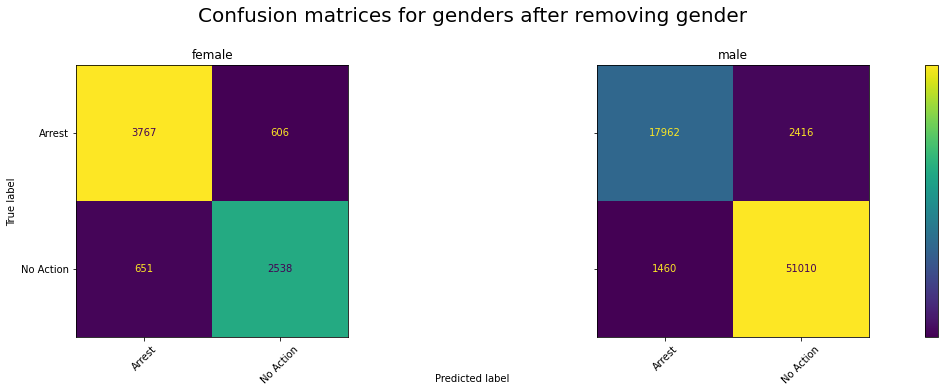

In [96]:
#confusion matrix
cm_female_nogender = confusion_matrix(y_test_female, y_pred_female_nogender)
cm_male_nogender = confusion_matrix(y_test_male, y_pred_male_nogender)

tmp_dict = {'female': cm_female_nogender, 'male': cm_male_nogender}
plot_cm_subplots(tmp_dict, 'Confusion matrices for genders after removing gender', 0, 1, '')

In [97]:
#calculate true negative, false positive, false negative and true positive
tn_female_nogender, fp_female_nogender, fn_female_nogender, tp_female_nogender = confusion_matrix(y_test_female, y_pred_female_nogender).ravel()
tn_male_nogender, fp_male_nogender, fn_male_nogender, tp_male_nogender = confusion_matrix(y_test_male, y_pred_male_nogender).ravel()

#### Fairness Metrics for gender groups

- the fairness metrics for the current model where sensitive features are dropped
- the current fairness metrics are compared with the ones from previous task (where sensitive features are included)

In [98]:
#independence
ind_female_nogender = independence(tn_female_nogender, fp_female_nogender, fn_female_nogender, tp_female_nogender)
ind_male_nogender = independence(tn_male_nogender, fp_male_nogender, fn_male_nogender, tp_male_nogender)

In [99]:
print(ind_female_nogender, ind_male_nogender)
print(ind_female, ind_male)

0.4157630256545887 0.7333900724796837
0.4329542449087543 0.7257028332967275


In [100]:
#separation
sep_female_nogender = separation(tn_female_nogender, fp_female_nogender, fn_female_nogender, tp_female_nogender)
sep_male_nogender = separation(tn_male_nogender, fp_male_nogender, fn_male_nogender, tp_male_nogender)

In [101]:
print(sep_female_nogender, sep_male_nogender)
print(sep_female, sep_male)

(0.8072519083969466, 0.8526482571299231) (0.954778572230749, 0.924827515188961)
(0.8008552229688455, 0.8677705223880597) (0.9593689706049257, 0.9123210889800821)


In [102]:
#sufficiency
suf_female_nogender = sufficiency(tn_female_nogender, fp_female_nogender, fn_female_nogender, tp_female_nogender)
suf_male_nogender = sufficiency(tn_male_nogender, fp_male_nogender, fn_male_nogender, tp_male_nogender)

In [103]:
print(suf_female_nogender, suf_male_nogender)
print(suf_female, suf_male)

(0.7958607714016933, 0.13857763549050994) (0.9721745759481608, 0.11855923054274217)
(0.8222013170272813, 0.14909672993368397) (0.966609491137793, 0.10540779271763667)


### Dropping race, age, gender from X matrix

#### Check the race

In [104]:
#split into races
group_asian = X_test['driver_race_Asian'] == 1
group_black = X_test['driver_race_Black'] == 1
group_white = X_test['driver_race_White'] == 1
group_hispanic = X_test['driver_race_Hispanic'] == 1
group_other = X_test['driver_race_Other'] == 1 

#define variable for each race
y_pred_asian_unaw = y_pred_test_unaw[group_asian]
y_test_asian = y_test[group_asian]
X_test_asian_unaw = X_test_unaw[group_asian]

y_pred_black_unaw = y_pred_test_unaw[group_black]
y_test_black = y_test[group_black]
X_test_black_unaw = X_test_unaw[group_black]

y_pred_white_unaw = y_pred_test_unaw[group_white]
y_test_white = y_test[group_white]
X_test_white_unaw = X_test_unaw[group_white]

y_pred_hispanic_unaw = y_pred_test_unaw[group_hispanic]
y_test_hispanic = y_test[group_hispanic]
X_test_hispanic_unaw = X_test_unaw[group_hispanic]

y_pred_other_unaw = y_pred_test_unaw[group_other]
y_test_other = y_test[group_other]
X_test_other_unaw = X_test_unaw[group_other]

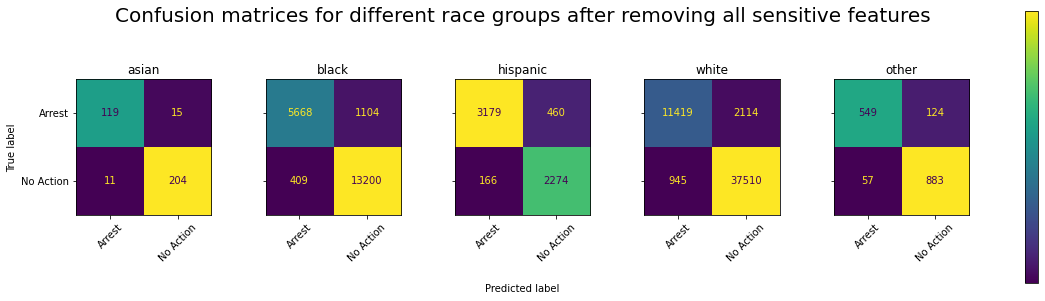

In [105]:
#calculate confusion matrix values
cm_asian_unaw = confusion_matrix(y_test_asian, y_pred_asian_unaw)
cm_black_unaw = confusion_matrix(y_test_black, y_pred_black_unaw)
cm_white_unaw = confusion_matrix(y_test_white, y_pred_white_unaw)
cm_hispanic_unaw = confusion_matrix(y_test_hispanic, y_pred_hispanic_unaw)
cm_other_unaw = confusion_matrix(y_test_other, y_pred_other_unaw)

tmp_dict = {'asian': cm_asian_unaw, 'black': cm_black_unaw, 'hispanic': cm_hispanic_unaw, 'white': cm_white_unaw, 'other': cm_other_unaw}
plot_cm_subplots(tmp_dict, 'Confusion matrices for different race groups after removing all sensitive features', 0.1, 0.85, '')

In [106]:
#calculate true negative, false positive, false negative and true positive
tn_asian_unaw, fp_asian_unaw, fn_asian_unaw, tp_asian_unaw = confusion_matrix(y_test_asian, y_pred_asian_unaw).ravel()
tn_black_unaw, fp_black_unaw, fn_black_unaw, tp_black_unaw = confusion_matrix(y_test_black, y_pred_black_unaw).ravel()
tn_white_unaw, fp_white_unaw, fn_white_unaw, tp_white_unaw = confusion_matrix(y_test_white, y_pred_white_unaw).ravel()
tn_hispanic_unaw, fp_hispanic_unaw, fn_hispanic_unaw, tp_hispanic_unaw = confusion_matrix(y_test_hispanic, y_pred_hispanic_unaw).ravel()
tn_other_unaw, fp_other_unaw, fn_other_unaw, tp_other_unaw = confusion_matrix(y_test_other, y_pred_other_unaw).ravel()

#independence:
ind_asian_unaw = independence(tn_asian_unaw, fp_asian_unaw, fn_asian_unaw, tp_asian_unaw)
ind_black_unaw = independence(tn_black_unaw, fp_black_unaw, fn_black_unaw, tp_black_unaw)
ind_white_unaw = independence(tn_white_unaw, fp_white_unaw, fn_white_unaw, tp_white_unaw)
ind_hispanic_unaw = independence(tn_hispanic_unaw, fp_hispanic_unaw, fn_hispanic_unaw, tp_hispanic_unaw)
ind_other_unaw = independence(tn_other_unaw, fp_other_unaw, fn_other_unaw, tp_other_unaw)

print("Order: Asian, Black, White, Hispanic, other")
print("Independence:", ind_asian_unaw, ind_black_unaw, ind_white_unaw, ind_hispanic_unaw, ind_other_unaw)


#separation:
sep_asian_unaw = separation(tn_asian_unaw, fp_asian_unaw, fn_asian_unaw, tp_asian_unaw)
sep_black_unaw = separation(tn_black_unaw, fp_black_unaw, fn_black_unaw, tp_black_unaw)
sep_white_unaw = separation(tn_white_unaw, fp_white_unaw, fn_white_unaw, tp_white_unaw)
sep_hispanic_unaw = separation(tn_hispanic_unaw, fp_hispanic_unaw, fn_hispanic_unaw, tp_hispanic_unaw)
sep_other_unaw = separation(tn_other_unaw, fp_other_unaw, fn_other_unaw, tp_other_unaw)

print("Separation:", sep_asian_unaw, sep_black_unaw, sep_white_unaw, sep_hispanic_unaw, sep_other_unaw)

#sufficiency
suf_asian_unaw = sufficiency(tn_asian_unaw, fp_asian_unaw, fn_asian_unaw, tp_asian_unaw)
suf_black_unaw = sufficiency(tn_black_unaw, fp_black_unaw, fn_black_unaw, tp_black_unaw)
suf_white_unaw = sufficiency(tn_white_unaw, fp_white_unaw, fn_white_unaw, tp_white_unaw)
suf_hispanic_unaw = sufficiency(tn_hispanic_unaw, fp_hispanic_unaw, fn_hispanic_unaw, tp_hispanic_unaw)
suf_other_unaw = sufficiency(tn_other_unaw, fp_other_unaw, fn_other_unaw, tp_other_unaw)

print("Sufficiency:", suf_asian_unaw, suf_black_unaw, suf_white_unaw, suf_hispanic_unaw, suf_other_unaw)

Order: Asian, Black, White, Hispanic, other
Independence: 0.6275071633237822 0.7018301359108974 0.7621758867430946 0.44974502385260734 0.6243025418474891
Separation: (0.9315068493150684, 0.9153846153846154) (0.9228187919463087, 0.9326970544676649) (0.9466484958610943, 0.9235684244581042) (0.8317483540599854, 0.9503736920777279) (0.8768619662363456, 0.905940594059406)
Sufficiency: (0.9488372093023256, 0.11194029850746269) (0.9699463590271145, 0.16302421736562314) (0.9754258223898062, 0.1562107441069977) (0.9319672131147541, 0.12640835394339103) (0.9393617021276596, 0.18424962852897475)


#### Check the age groups

In [107]:
#split into age groups (see above)
group_young = X_test['driver_age'] < 30
group_middle = (X_test['driver_age'] >= 30) & (X_test['driver_age'] < 65)
group_elderly = X_test['driver_age'] >= 65

y_pred_young_unaw = y_pred_test_unaw[group_young]
y_test_young = y_test[group_young]
X_test_young_unaw = X_test_unaw[group_young]

y_pred_middle_unaw = y_pred_test_unaw[group_middle]
y_test_middle = y_test[group_middle]
X_test_middle_unaw = X_test_unaw[group_middle]

y_pred_elderly_unaw = y_pred_test_unaw[group_elderly]
y_test_elderly = y_test[group_elderly]
X_test_elderly_unaw = X_test_unaw[group_elderly]

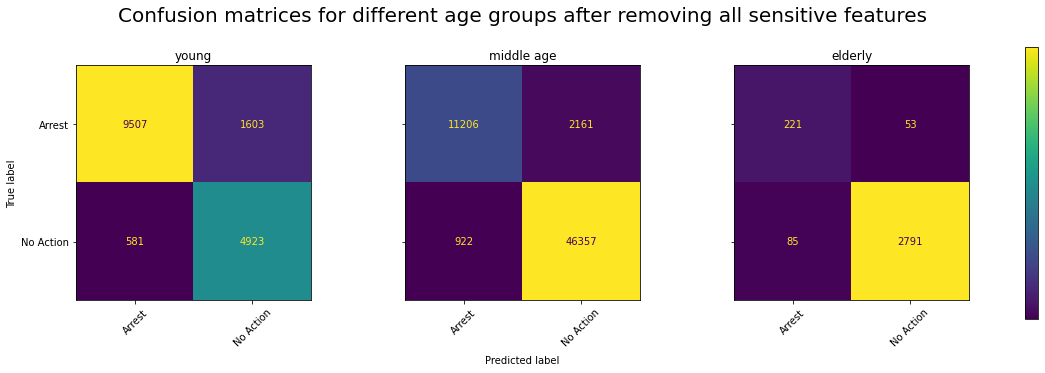

In [108]:
#confusion matrix
cm_young_unaw = confusion_matrix(y_test_young, y_pred_young_unaw)
cm_middle_unaw = confusion_matrix(y_test_middle, y_pred_middle_unaw)
cm_elderly_unaw = confusion_matrix(y_test_elderly, y_pred_elderly_unaw)

#plot confusion matrix
tmp_dict = {'young': cm_young_unaw, 'middle age': cm_middle_unaw, 'elderly': cm_elderly_unaw}
plot_cm_subplots(tmp_dict, 'Confusion matrices for different age groups after removing all sensitive features', 0, 0.95, '')

In [109]:
#calculate true negative, false positive, false negative and true positive
tn_young_unaw, fp_young_unaw, fn_young_unaw, tp_young_unaw = confusion_matrix(y_test_young, y_pred_young_unaw).ravel()
tn_middle_unaw, fp_middle_unaw, fn_middle_unaw, tp_middle_unaw = confusion_matrix(y_test_middle, y_pred_middle_unaw).ravel()
tn_elderly_unaw, fp_elderly_unaw, fn_elderly_unaw, tp_elderly_unaw = confusion_matrix(y_test_elderly, y_pred_elderly_unaw).ravel()

#independence
ind_young_unaw = independence(tn_young_unaw, fp_young_unaw, fn_young_unaw, tp_young_unaw)
ind_middle_unaw = independence(tn_middle_unaw, fp_middle_unaw, fn_middle_unaw, tp_middle_unaw)
ind_elderly_unaw = independence(tn_elderly_unaw, fp_elderly_unaw, fn_elderly_unaw, tp_elderly_unaw)

print("Order: Young, Middle aged, elderly")
print("Independence:", ind_young_unaw, ind_middle_unaw, ind_elderly_unaw)

#separation
sep_young_unaw = separation(tn_young_unaw, fp_young_unaw, fn_young_unaw, tp_young_unaw)
sep_middle_unaw = separation(tn_middle_unaw, fp_middle_unaw, fn_middle_unaw, tp_middle_unaw)
sep_elderly_unaw = separation(tn_elderly_unaw, fp_elderly_unaw, fn_elderly_unaw, tp_elderly_unaw)

print("Separation:", sep_young_unaw, sep_middle_unaw, sep_elderly_unaw)

#sufficiency
suf_young_unaw = sufficiency(tn_young_unaw, fp_young_unaw, fn_young_unaw, tp_young_unaw)
suf_middle_unaw = sufficiency(tn_middle_unaw, fp_middle_unaw, fn_middle_unaw, tp_middle_unaw)
suf_elderly_unaw = sufficiency(tn_elderly_unaw, fp_elderly_unaw, fn_elderly_unaw, tp_elderly_unaw)

print("Sufficiency:", suf_young_unaw, suf_middle_unaw, suf_elderly_unaw)

Order: Young, Middle aged, elderly
Independence: 0.39280125195618154 0.8000197869603931 0.9028571428571428
Separation: (0.7543671467974257, 0.9424068199841396) (0.9554598293416876, 0.9239775725593667) (0.9813642756680732, 0.7222222222222222)
Sufficiency: (0.8944404069767442, 0.14428442844284428) (0.9804987415131454, 0.16166679135183662) (0.9704450625869263, 0.19343065693430658)


#### Check gender

In [110]:
#gender groups:
group_female = X_test['driver_gender'] == 0
group_male = X_test['driver_gender'] == 1

y_pred_female_unaw = y_pred_test_unaw[group_female]
y_test_female = y_test[group_female]
X_test_female_unaw = X_test_unaw[group_female]

y_pred_male_unaw = y_pred_test_unaw[group_male]
y_test_male = y_test[group_male]
X_test_male_unaw = X_test_unaw[group_male]

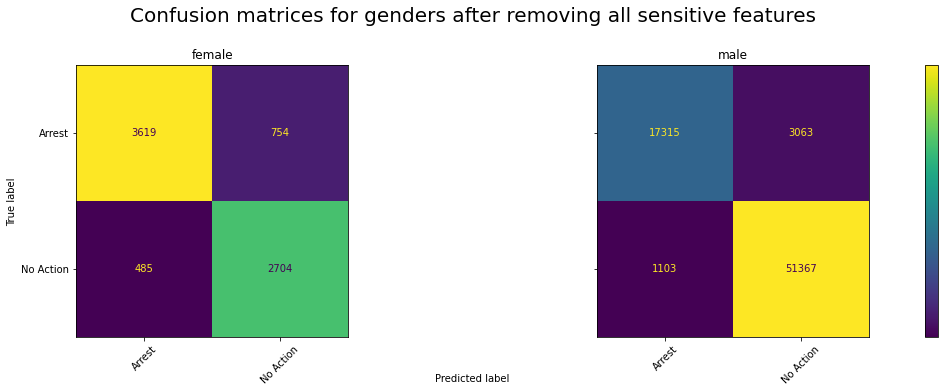

In [111]:
#confusion matrix
cm_female_unaw = confusion_matrix(y_test_female, y_pred_female_unaw)
cm_male_unaw = confusion_matrix(y_test_male, y_pred_male_unaw)

#plot the confusion matrix
tmp_dict = {'female': cm_female_unaw, 'male': cm_male_unaw}
plot_cm_subplots(tmp_dict, 'Confusion matrices for genders after removing all sensitive features', 0, 1, '')

In [112]:
#calculate true negative, false positive, false negative and true positive
tn_female_unaw, fp_female_unaw, fn_female_unaw, tp_female_unaw = confusion_matrix(y_test_female, y_pred_female_unaw).ravel()
tn_male_unaw, fp_male_unaw, fn_male_unaw, tp_male_unaw = confusion_matrix(y_test_male, y_pred_male_unaw).ravel()

#independence
ind_female_unaw = independence(tn_female_unaw, fp_female_unaw, fn_female_unaw, tp_female_unaw)
ind_male_unaw = independence(tn_male_unaw, fp_male_unaw, fn_male_unaw, tp_male_unaw)

print("Order: Female, Male")
print("Independence:", ind_female_unaw, ind_male_unaw)

#separation
sep_female_unaw = separation(tn_female_unaw, fp_female_unaw, fn_female_unaw, tp_female_unaw)
sep_male_unaw = separation(tn_male_unaw, fp_male_unaw, fn_male_unaw, tp_male_unaw)

print("Separation:", sep_female_unaw, sep_male_unaw)

#sufficiency
suf_female_unaw = sufficiency(tn_female_unaw, fp_female_unaw, fn_female_unaw, tp_female_unaw)
suf_male_unaw = sufficiency(tn_male_unaw, fp_male_unaw, fn_male_unaw, tp_male_unaw)

print("Sufficiency:", suf_female_unaw, suf_male_unaw)

Order: Female, Male
Independence: 0.457286432160804 0.7471721941576982
Separation: (0.7819548872180451, 0.88182261208577) (0.9437258864596729, 0.9401129330003257)
Sufficiency: (0.847914706804641, 0.1724216784815916) (0.9789784638841242, 0.15030915693394836)


## Display the fairness metrics in dataframes for better visualization

- Fairness metrics for race groups when all sensitive features are included
- Fairness metrics for race groups when race is dropped


- Fairness metrics for age groups when all sensitive features are included
- Fairness metrics for age groups when age is dropped


- Fairness metrics for gender groups when all sensitive features are included
- Fairness metrics for gender groups when gender is dropped


- Fairness metrics for race groups when race, age, gender are dropped
- Fairness metrics for age groups when race, age, gender are dropped
- Fairness metrics for gender groups when race, age, gender are dropped

In [113]:
#race lists
independence_list_race = np.around(np.array([ind_white, ind_black, ind_hispanic, ind_asian, ind_other]), 4)
separation_list_race = np.around(np.array([sep_white, sep_black, sep_hispanic, sep_asian, sep_other]), 4).tolist()
sufficiency_list_race = np.around(np.array([suf_white, suf_black, suf_hispanic, suf_asian, suf_other]), 4).tolist()
#age lists
independence_list_age = np.around(np.array([ind_young, ind_middle, ind_elderly]), 4)
separation_list_age = np.around(np.array([sep_young, sep_middle, sep_elderly]), 4).tolist()
sufficiency_list_age = np.around(np.array([suf_young, suf_middle, suf_elderly]), 4).tolist()
#gender lists
independence_list_gender = np.around(np.array([ind_male, ind_female]), 4)
separation_list_gender = np.around(np.array([sep_male, sep_female]), 4).tolist()
sufficiency_list_gender = np.around(np.array([suf_male, suf_female]), 4).tolist()
#no race lists
independence_list_norace = np.around(np.array([ind_white_norace, ind_black_norace, ind_hispanic_norace, ind_asian_norace, ind_other_norace]), 4)
separation_list_norace = np.around(np.array([sep_white_norace, sep_black_norace, sep_hispanic_norace, sep_asian_norace, sep_other_norace]), 4).tolist()
sufficiency_list_norace = np.around(np.array([suf_white_norace, suf_black_norace, suf_hispanic_norace, suf_asian_norace, suf_other_norace]), 4).tolist()
#no age lists
independence_list_noage = np.around(np.array([ind_young_noage, ind_middle_noage, ind_elderly_noage]), 4)
separation_list_noage = np.around(np.array([sep_young_noage, sep_middle_noage, sep_elderly_noage]), 4).tolist()
sufficiency_list_noage = np.around(np.array([suf_young_noage, suf_middle_noage, suf_elderly_noage]), 4).tolist()
#no gender lists
independence_list_nogender = np.around(np.array([ind_male_nogender, ind_female_nogender]), 4)
separation_list_nogender = np.around(np.array([sep_male_nogender, sep_female_nogender]), 4).tolist()
sufficiency_list_nogender = np.around(np.array([suf_male_nogender, suf_female_nogender]), 4).tolist()

#no race, age, gender lists
independence_list_race_unaw = np.around(np.array([ind_asian_unaw, ind_black_unaw, ind_white_unaw, ind_hispanic_unaw, ind_other_unaw]), 4)
separation_list_race_unaw = np.around(np.array([sep_asian_unaw, sep_black_unaw, sep_white_unaw, sep_hispanic_unaw, sep_other_unaw]), 4).tolist()
sufficiency_list_race_unaw = np.around(np.array([suf_asian_unaw, suf_black_unaw, suf_white_unaw, suf_hispanic_unaw, suf_other_unaw]), 4).tolist()

independence_list_age_unaw = np.around(np.array([ind_young_unaw, ind_middle_unaw, ind_elderly_unaw]), 4)
separation_list_age_unaw = np.around(np.array([sep_young_unaw, sep_middle_unaw, sep_elderly_unaw]), 4).tolist()
sufficiency_list_age_unaw = np.around(np.array([suf_young_unaw, suf_middle_unaw, suf_elderly_unaw]), 4).tolist()

independence_list_gender_unaw = np.around(np.array([ind_male_unaw, ind_female_unaw]), 4)
separation_list_gender_unaw = np.around(np.array([sep_male_unaw, sep_female_unaw]), 4).tolist()
sufficiency_list_gender_unaw = np.around(np.array([suf_male_unaw, suf_female_unaw]), 4).tolist()

In [114]:
#create table to store fairness value for race
race_columns = ['White','Black','Hispanic','Asian','Other']
fairness_index = ['Independency','Separation','Sufficiency']
fairness_table_race = pd.DataFrame(columns = race_columns, index = fairness_index)
fairness_table_race_drop = fairness_table_race

#create table to store fairness value for gender
gender_columns = ['Male','Female']
fairness_table_gender = pd.DataFrame(columns = gender_columns, index = fairness_index)
fairness_table_gender_drop = fairness_table_gender

#create table to store fairness value for age
age_columns = ['Young','Middle age','Elderly']
fairness_table_age = pd.DataFrame(columns = age_columns, index = fairness_index)
fairness_table_age_drop = fairness_table_age

#### Dataframe for fairness metrics (with and without dropping race from data set)

In [115]:
#adding values for fairness table with and without dropping race
#fairness_table_race
#fairness_table_race_drop

print("Fairness metrics for model in which race is included")    
fairness_table_race.loc['Independency'] = independence_list_race
fairness_table_race.loc['Separation'] = separation_list_race
fairness_table_race.loc['Sufficiency'] = sufficiency_list_race
fairness_table_race = fairness_table_race.round(4)
fairness_table_race

Fairness metrics for model in which race is included


,White,Black,Hispanic,Asian,Other
Independency,0.7514,0.6664,0.3871,0.6246,0.5728
Separation,"[0.9543, 0.9089]","[0.9492, 0.8944]","[0.9065, 0.9176]","[0.9266, 0.9008]","[0.9058, 0.8505]"
Sufficiency,"[0.9694, 0.132]","[0.9472, 0.1019]","[0.8742, 0.0605]","[0.9395, 0.1194]","[0.8904, 0.1293]"


In [116]:
print("Fairness metrics for model in which race is dropped")
fairness_table_race_drop.loc['Independency'] = independence_list_norace
fairness_table_race_drop.loc['Separation'] = separation_list_norace
fairness_table_race_drop.loc['Sufficiency'] = sufficiency_list_norace
fairness_table_race_drop

Fairness metrics for model in which race is dropped


,White,Black,Hispanic,Asian,Other
Independency,0.7415,0.6731,0.4014,0.6017,0.5803
Separation,"[0.9597, 0.8912]","[0.9448, 0.9027]","[0.8922, 0.9277]","[0.9524, 0.8921]","[0.9017, 0.8582]"
Sufficiency,"[0.962, 0.1148]","[0.9524, 0.1118]","[0.8922, 0.0723]","[0.9302, 0.0746]","[0.8979, 0.1367]"


#### Dataframe for fairness metrics (with and without dropping gender from data set)

In [117]:
#adding values for fairness table with and without dropping gender
#fairness_table_gender
#fairness_table_gender_drop

print("Fairness metrics for model in which gender is included")  
fairness_table_gender.loc['Independency'] = independence_list_gender
fairness_table_gender.loc['Separation'] = separation_list_gender
fairness_table_gender.loc['Sufficiency'] = sufficiency_list_gender
fairness_table_gender

Fairness metrics for model in which gender is included


,Male,Female
Independency,0.7257,0.433
Separation,"[0.9594, 0.9123]","[0.8009, 0.8678]"
Sufficiency,"[0.9666, 0.1054]","[0.8222, 0.1491]"


In [118]:
print("\n Fairness metrics for model in which gender is dropped")
fairness_table_gender_drop.loc['Independency'] = independence_list_nogender
fairness_table_gender_drop.loc['Separation'] = separation_list_nogender
fairness_table_gender_drop.loc['Sufficiency'] = sufficiency_list_nogender
fairness_table_gender_drop


 Fairness metrics for model in which gender is dropped


,Male,Female
Independency,0.7334,0.4158
Separation,"[0.9548, 0.9248]","[0.8073, 0.8526]"
Sufficiency,"[0.9722, 0.1186]","[0.7959, 0.1386]"


#### Dataframe for fairness metrics (with and without dropping age from data set)

In [119]:
#adding values for fairness table with and without dropping age
#fairness_table_age
#fairness_table_age_drop

print("Fairness metrics for model in which age is included")
fairness_table_age.loc['Independency'] = independence_list_age
fairness_table_age.loc['Separation'] = separation_list_age
fairness_table_age.loc['Sufficiency'] = sufficiency_list_age
fairness_table_age

Fairness metrics for model in which age is included


,Young,Middle age,Elderly
Independency,0.314,0.7915,0.9286
Separation,"[0.8388, 0.9009]","[0.9607, 0.908]","[0.9744, 0.8844]"
Sufficiency,"[0.7949, 0.0757]","[0.9754, 0.1409]","[0.991, 0.2737]"


In [120]:
print("\n Fairness metrics for model in which race is dropped")
fairness_table_age_drop.loc['Independency'] = independence_list_noage
fairness_table_age_drop.loc['Separation'] = separation_list_noage
fairness_table_age_drop.loc['Sufficiency'] = sufficiency_list_noage
fairness_table_age_drop


 Fairness metrics for model in which race is dropped


,Young,Middle age,Elderly
Independency,0.3782,0.7945,0.8933
Separation,"[0.7638, 0.9318]","[0.9569, 0.906]","[0.9829, 0.6726]"
Sufficiency,"[0.8719, 0.1336]","[0.9752, 0.1552]","[0.9618, 0.1752]"


#### Dataframe for fairness metrics (dropping all sensitive features: race, gender, age)

In [121]:
print("Fairness metrics for race for model in which race, gender, age are dropped")

fairness_table_race_unaw = pd.DataFrame(columns = race_columns, index = fairness_index)

fairness_table_race_unaw.loc['Independency'] = independence_list_race_unaw
fairness_table_race_unaw.loc['Separation'] = separation_list_race_unaw
fairness_table_race_unaw.loc['Sufficiency'] = sufficiency_list_race_unaw
fairness_table_race_unaw = fairness_table_race_unaw.round(4)
fairness_table_race_unaw

Fairness metrics for race for model in which race, gender, age are dropped


,White,Black,Hispanic,Asian,Other
Independency,0.6275,0.7018,0.7622,0.4497,0.6243
Separation,"[0.9315, 0.9154]","[0.9228, 0.9327]","[0.9466, 0.9236]","[0.8317, 0.9504]","[0.8769, 0.9059]"
Sufficiency,"[0.9488, 0.1119]","[0.9699, 0.163]","[0.9754, 0.1562]","[0.932, 0.1264]","[0.9394, 0.1842]"


In [122]:
print("Fairness metrics for age for model in which race, gender, age are dropped")

fairness_table_age_unaw = pd.DataFrame(columns = age_columns, index = fairness_index)

fairness_table_age_unaw.loc['Independency'] = independence_list_age_unaw
fairness_table_age_unaw.loc['Separation'] = separation_list_age_unaw
fairness_table_age_unaw.loc['Sufficiency'] = sufficiency_list_age_unaw
fairness_table_age_unaw = fairness_table_age_unaw.round(4)
fairness_table_age_unaw

Fairness metrics for age for model in which race, gender, age are dropped


,Young,Middle age,Elderly
Independency,0.3928,0.8,0.9029
Separation,"[0.7544, 0.9424]","[0.9555, 0.924]","[0.9814, 0.7222]"
Sufficiency,"[0.8944, 0.1443]","[0.9805, 0.1617]","[0.9704, 0.1934]"


In [123]:
print("Fairness metrics for gender for model in which race, gender, age are dropped")

fairness_table_gender_unaw = pd.DataFrame(columns = gender_columns, index = fairness_index)

fairness_table_gender_unaw.loc['Independency'] = independence_list_gender_unaw
fairness_table_gender_unaw.loc['Separation'] = separation_list_gender_unaw
fairness_table_gender_unaw.loc['Sufficiency'] = sufficiency_list_gender_unaw
fairness_table_gender_unaw = fairness_table_gender_unaw.round(4)
fairness_table_gender_unaw

Fairness metrics for gender for model in which race, gender, age are dropped


,Male,Female
Independency,0.7472,0.4573
Separation,"[0.9437, 0.9401]","[0.782, 0.8818]"
Sufficiency,"[0.979, 0.1503]","[0.8479, 0.1724]"


# Using different thresholds to predict stop outcome

- using violation as a threshold for the binary classifier

- changing the threshold of the binary classifier (threshold = predicted probability value which will lead to arrest or not arrest)

From the Original Data, we see the different types of violation and their counts

In [151]:
data['violation'].value_counts()

Other                  280809
DUI                     47071
Speeding                33779
Seat belt               11017
Registration/plates     10753
Equipment                8412
Safe movement            8194
Stop sign/light          2014
Name: violation, dtype: int64

## Determining which violations are more likely to lead to an arrest

To determine the severeness of each violation, the percentage that leads to an arrest is calculated for all violations.

This percentage is obtained by:

(the number of that particular violation where 'stop_outcome' = arrest) * 100 / (total number of that particular violation)

In [152]:
#calculating percentage of arrestments in regard to each violation
data_violation = data[['violation','stop_outcome']]

list_violations = ['Speeding','DUI','Equipment', 'Seat belt', 'Other', 'Registration/plates', 'Safe movement', 'Stop sign/light']

arrestment_statistics = data_violation['stop_outcome'].value_counts()
print('Total number of arrestments in data set: ', arrestment_statistics)


for element in list_violations:
    frames = data_violation[data_violation['violation']==element]
    counts = frames['stop_outcome'].value_counts()
    print("\n")
    print('Count of {}'.format(element))
    print(counts)
    print('Percentage of arrestments in {} is: '.format(element), counts['Arrest']/(counts[0]+counts[1])*100, '%')

Total number of arrestments in data set:  No Action    278255
Arrest       123794
Name: stop_outcome, dtype: int64


Count of Speeding
Arrest       28422
No Action     5357
Name: stop_outcome, dtype: int64
Percentage of arrestments in Speeding is:  84.14103437046685 %


Count of DUI
Arrest       45656
No Action     1415
Name: stop_outcome, dtype: int64
Percentage of arrestments in DUI is:  96.99390282764335 %


Count of Equipment
No Action    4219
Arrest       4193
Name: stop_outcome, dtype: int64
Percentage of arrestments in Equipment is:  49.8454588682834 %


Count of Seat belt
Arrest       5866
No Action    5151
Name: stop_outcome, dtype: int64
Percentage of arrestments in Seat belt is:  53.24498502314605 %


Count of Other
No Action    254041
Arrest        26768
Name: stop_outcome, dtype: int64
Percentage of arrestments in Other is:  9.532458005263363 %


Count of Registration/plates
No Action    6883
Arrest       3870
Name: stop_outcome, dtype: int64
Percentage of arrestments in R

## Ordering violations severeness and determining threshold for which violations lead to an arrest

After measuring the percentage of each violation that leads to an arrest, these values help in ordering the violations.

Ranking from the worst violation to the least serious violation, the orders are:

- DUI
- Stop sign/light
- Safe movement
- Speeding
- Seat belt
- Equipment 
- Registration/plates
- Other

It is then decided that the 4 worst violations (DUI, Stop sign/light, Safe movement, Speeding) would lead to arrest, while the others would lead to no action.

## Creating a new stop outcome variable using violations as threshold

Create a new dataframe, where the violation will be encoded with 0-7 (0 for the least serious violation, and 7 is the worst violation)

In [201]:
data_thr = data

data_thr = data_thr.replace('DUI', 7)
data_thr = data_thr.replace('Stop sign/light', 6)
data_thr = data_thr.replace('Safe movement', 5)
data_thr = data_thr.replace('Speeding', 4)
data_thr = data_thr.replace('Seat belt', 3)
data_thr = data_thr.replace('Equipment', 2)
data_thr = data_thr.replace('Registration/plates', 1)
data_thr = data_thr.replace('Other', 0)

data_thr['violation'].value_counts()
data_thr['driver_race'] = data['driver_race']

In [202]:
 data_thr.head()

,state,stop_date,driver_gender,driver_age,driver_race_raw,driver_race,violation,search_type,contraband_found,stop_outcome,search_basis,officer_id,drugs_related_stop,district,stop_date:day_of_week
0,NC,2000-07-31,M,23.0,W N,White,4,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3,0
1,NC,2000-07-31,F,29.0,W N,White,4,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3,0
2,NC,2000-07-31,F,49.0,B N,Black,4,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3,0
3,NC,2000-07-31,M,29.0,B N,Black,4,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3,0
4,NC,2000-07-31,M,24.0,U H,Hispanic,4,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3,0


In [203]:
group_asian = X_test_thr['driver_race_Asian'] == 1
group_black = X_test_thr['driver_race_Black'] == 1
group_white = X_test_thr['driver_race_White'] == 1
group_hispanic = X_test_thr['driver_race_Hispanic'] == 1
group_other = X_test_thr['driver_race_Other'] == 1

# Reference: https://www.sciencedirect.com/science/article/pii/S0386111214600315#:~:text=Three%20driver%20age%20groups%20(old,aged%20less%20than%2030%20years.
group_young = X_test_thr['driver_age'] < 30
group_middle = (X_test_thr['driver_age'] >= 30) & (X_test_thr['driver_age'] < 65)
group_elderly = X_test_thr['driver_age'] >= 65

group_female = X_test_thr['driver_gender'] == 0
group_male = X_test_thr['driver_gender'] == 1

Computing accuracies and fairness criteria for each violation severity threshold 

In [204]:
df_dict = {}
race_thr_dict = {}
age_thr_dict = {}
gender_thr_dict = {}

# change the encoding of violation to the one where it is ordered by severity
X_thr = X.copy()
X_thr['violation'] = data_thr['violation']

X_thr = X_thr.astype(np.float32)

# Split the data into training and test set
# test_size=0.2: 60% training set, 20% test set, 20% CV
# random_state=350: fix the random set to get the same result every time you run the code (for tutorial purposes)
X_tmp_thr, X_test_thr, y_tmp_thr, y_test_thr = train_test_split(X_thr, y_encoded, test_size=0.2, random_state=350)
X_train_thr, X_val_thr, y_train_thr, y_val_thr = train_test_split(X_tmp_thr, y_tmp_thr, test_size=0.25, random_state=350)

for thr in range(1, 8):
    print(thr)
    y_pred_train_thr = np.ones(len(y_train_thr))
    y_pred_train_thr[X_train_thr['violation'] >= thr] = 0
    y_pred_train_thr = y_pred_train_thr.astype(int)

    y_pred_val_thr = np.ones(len(y_val_thr))
    y_pred_val_thr[X_val_thr['violation'] >= thr] = 0
    y_pred_val_thr = y_pred_val_thr.astype(int)

    y_pred_test_thr = np.ones(len(y_test_thr))
    y_pred_test_thr[X_test_thr['violation'] >= thr] = 0
    y_pred_test_thr = y_pred_test_thr.astype(int)
    
    cm_train_nn_thr = confusion_matrix(y_train_thr, y_pred_train_thr)
    cm_val_nn_thr = confusion_matrix(y_val_thr, y_pred_val_thr)
    cm_test_nn_thr = confusion_matrix(y_test_thr, y_pred_test_thr)
    
    # Race
    y_pred_thr_asian = y_pred_test_thr[group_asian]
    y_test_thr_asian = y_test_thr[group_asian]
    X_test_thr_asian = X_test_thr[group_asian]

    y_pred_thr_black = y_pred_test_thr[group_black]
    y_test_thr_black = y_test_thr[group_black]
    X_test_thr_black = X_test_thr[group_black]

    y_pred_thr_white = y_pred_test_thr[group_white]
    y_test_thr_white = y_test_thr[group_white]
    X_test_thr_white = X_test_thr[group_white]

    y_pred_thr_hispanic = y_pred_test_thr[group_hispanic]
    y_test_thr_hispanic = y_test_thr[group_hispanic]
    X_test_thr_hispanic = X_test_thr[group_hispanic]

    y_pred_thr_other = y_pred_test_thr[group_other]
    y_test_thr_other = y_test_thr[group_other]
    X_test_thr_other = X_test_thr[group_other]
    
    cm_asian_thr = confusion_matrix(y_test_thr_asian, y_pred_thr_asian)
    cm_black_thr = confusion_matrix(y_test_thr_black, y_pred_thr_black)
    cm_white_thr = confusion_matrix(y_test_thr_white, y_pred_thr_white)
    cm_hispanic_thr = confusion_matrix(y_test_thr_hispanic, y_pred_thr_hispanic)
    cm_other_thr = confusion_matrix(y_test_thr_other, y_pred_thr_other)
    
    tn_thr_asian, fp_thr_asian, fn_thr_asian, tp_thr_asian = confusion_matrix(y_test_thr_asian, y_pred_thr_asian).ravel()
    tn_thr_black, fp_thr_black, fn_thr_black, tp_thr_black = confusion_matrix(y_test_thr_black, y_pred_thr_black).ravel()
    tn_thr_white, fp_thr_white, fn_thr_white, tp_thr_white = confusion_matrix(y_test_thr_white, y_pred_thr_white).ravel()
    tn_thr_hispanic, fp_thr_hispanic, fn_thr_hispanic, tp_thr_hispanic = confusion_matrix(y_test_thr_hispanic, y_pred_thr_hispanic).ravel()
    tn_thr_other, fp_thr_other, fn_thr_other, tp_thr_other = confusion_matrix(y_test_thr_other, y_pred_thr_other).ravel()
    
    ind_asian_thr = independence(tn_thr_asian, fp_thr_asian, fn_thr_asian, tp_thr_asian)
    ind_black_thr = independence(tn_thr_black, fp_thr_black, fn_thr_black, tp_thr_black)
    ind_white_thr = independence(tn_thr_white, fp_thr_white, fn_thr_white, tp_thr_white)
    ind_hispanic_thr = independence(tn_thr_hispanic, fp_thr_hispanic, fn_thr_hispanic, tp_thr_hispanic)
    ind_other_thr = independence(tn_thr_other, fp_thr_other, fn_thr_other, tp_thr_other)

    sep_asian_thr = separation(tn_thr_asian, fp_thr_asian, fn_thr_asian, tp_thr_asian)
    sep_black_thr = separation(tn_thr_black, fp_thr_black, fn_thr_black, tp_thr_black)
    sep_white_thr = separation(tn_thr_white, fp_thr_white, fn_thr_white, tp_thr_white)
    sep_hispanic_thr = separation(tn_thr_hispanic, fp_thr_hispanic, fn_thr_hispanic, tp_thr_hispanic)
    sep_other_thr = separation(tn_thr_other, fp_thr_other, fn_thr_other, tp_thr_other)

    suf_asian_thr = sufficiency(tn_thr_asian, fp_thr_asian, fn_thr_asian, tp_thr_asian)
    suf_black_thr = sufficiency(tn_thr_black, fp_thr_black, fn_thr_black, tp_thr_black)
    suf_white_thr = sufficiency(tn_thr_white, fp_thr_white, fn_thr_white, tp_thr_white)
    suf_hispanic_thr = sufficiency(tn_thr_hispanic, fp_thr_hispanic, fn_thr_hispanic, tp_thr_hispanic)
    suf_other_thr = sufficiency(tn_thr_other, fp_thr_other, fn_thr_other, tp_thr_other)
    
    independence_list_race_thr = np.around(np.array([ind_asian_thr, ind_black_thr, ind_white_thr, ind_hispanic_thr, ind_other_thr]), 4)
    separation_list_race_thr = np.around(np.array([sep_asian_thr, sep_black_thr, sep_white_thr, sep_hispanic_thr, sep_other_thr]), 4).tolist()
    sufficiency_list_race_thr = np.around(np.array([suf_asian_thr, suf_black_thr, suf_white_thr, suf_hispanic_thr, suf_other_thr]), 4).tolist()
    
    race_thr_dict.update({f'thr_{thr}': [independence_list_race_thr, separation_list_race_thr, sufficiency_list_race_thr]})  

    # Age
    y_pred_thr_young = y_pred_test_thr[group_young]
    y_test_thr_young = y_test_thr[group_young]
    X_test_thr_young = X_test_thr[group_young]

    y_pred_thr_middle = y_pred_test_thr[group_middle]
    y_test_thr_middle = y_test_thr[group_middle]
    X_test_thr_middle = X_test_thr[group_middle]

    y_pred_thr_elderly = y_pred_test_thr[group_elderly]
    y_test_thr_elderly = y_test_thr[group_elderly]
    X_test_thr_elderly = X_test_thr[group_elderly]

    tn_thr_young, fp_thr_young, fn_thr_young, tp_thr_young = confusion_matrix(y_test_thr_young, y_pred_thr_young).ravel()
    tn_thr_middle, fp_thr_middle, fn_thr_middle, tp_thr_middle = confusion_matrix(y_test_thr_middle, y_pred_thr_middle).ravel()
    tn_thr_elderly, fp_thr_elderly, fn_thr_elderly, tp_thr_elderly = confusion_matrix(y_test_thr_elderly, y_pred_thr_elderly).ravel()

    ind_young_thr = independence(tn_thr_young, fp_thr_young, fn_thr_young, tp_thr_young)
    ind_middle_thr = independence(tn_thr_middle, fp_thr_middle, fn_thr_middle, tp_thr_middle)
    ind_elderly_thr = independence(tn_thr_elderly, fp_thr_elderly, fn_thr_elderly, tp_thr_elderly)

    sep_young_thr = separation(tn_thr_young, fp_thr_young, fn_thr_young, tp_thr_young)
    sep_middle_thr = separation(tn_thr_middle, fp_thr_middle, fn_thr_middle, tp_thr_middle)
    sep_elderly_thr = separation(tn_thr_elderly, fp_thr_elderly, fn_thr_elderly, tp_thr_elderly)

    suf_young_thr = sufficiency(tn_thr_young, fp_thr_young, fn_thr_young, tp_thr_young)
    suf_middle_thr = sufficiency(tn_thr_middle, fp_thr_middle, fn_thr_middle, tp_thr_middle)
    suf_elderly_thr = sufficiency(tn_thr_elderly, fp_thr_elderly, fn_thr_elderly, tp_thr_elderly)
    
    independence_list_age_thr = np.around(np.array([ind_young_thr, ind_middle_thr, ind_elderly_thr]), 4)
    separation_list_age_thr = np.around(np.array([sep_young_thr, sep_middle_thr, sep_elderly_thr]), 4).tolist()
    sufficiency_list_age_thr = np.around(np.array([suf_young_thr, suf_middle_thr, suf_elderly_thr]), 4).tolist()

    age_thr_dict.update({f'thr_{thr}': [independence_list_age_thr, separation_list_age_thr, sufficiency_list_age_thr]})
    
    # Gender
    y_pred_thr_female = y_pred_test_thr[group_female]
    y_test_thr_female = y_test_thr[group_female]
    X_test_thr_female = X_test_thr[group_female]

    y_pred_thr_male = y_pred_test_thr[group_male]
    y_test_thr_male = y_test_thr[group_male]
    X_test_thr_male = X_test_thr[group_male]
    
    tn_thr_female, fp_thr_female, fn_thr_female, tp_thr_female = confusion_matrix(y_test_thr_female, y_pred_thr_female).ravel()
    tn_thr_male, fp_thr_male, fn_thr_male, tp_thr_male = confusion_matrix(y_test_thr_male, y_pred_thr_male).ravel()

    ind_female_thr = independence(tn_thr_female, fp_thr_female, fn_thr_female, tp_thr_female)
    ind_male_thr = independence(tn_thr_male, fp_thr_male, fn_thr_male, tp_thr_male)

    sep_female_thr = separation(tn_thr_female, fp_thr_female, fn_thr_female, tp_thr_female)
    sep_male_thr = separation(tn_thr_male, fp_thr_male, fn_thr_male, tp_thr_male)

    suf_female_thr = sufficiency(tn_thr_female, fp_thr_female, fn_thr_female, tp_thr_female)
    suf_male_thr = sufficiency(tn_thr_male, fp_thr_male, fn_thr_male, tp_thr_male)
    
    independence_list_gender_thr = np.around(np.array([ind_female_thr, ind_male_thr]), 4)
    separation_list_gender_thr = np.around(np.array([sep_female_thr, sep_male_thr]), 4).tolist()
    sufficiency_list_gender_thr = np.around(np.array([suf_female_thr, suf_male_thr]), 4).tolist()
    
    gender_thr_dict.update({f'thr_{thr}': [independence_list_gender_thr, separation_list_gender_thr, sufficiency_list_gender_thr]}) 
    
    
    tmp_dict = {'training': cm_train_nn_thr, 'validation': cm_val_nn_thr, 'test': cm_test_nn_thr}

    df_dict.update({f'thr_{thr}': ([accuracy_score(y_train_thr, y_pred_train_thr), accuracy_score(y_val_thr, y_pred_val_thr), accuracy_score(y_test_thr, y_pred_test_thr)], tmp_dict)})

1
2
3
4
5
6
7


In [207]:
tmp_list = []
for val in df_dict.values():
    tmp_list.append(val[0])
pd.DataFrame(tmp_list,
             columns=['Training Accuracy', 'Validation Accuracy', 'Test Accuracy'],
             index=['Threshold=1', 'Threshold=2', 'Threshold=3', 'Threshold=4', 'Threshold=5', 'Threshold=6', 'Threshold=7'])

,Training Accuracy,Validation Accuracy,Test Accuracy
Threshold=1,0.873121,0.872155,0.874456
Threshold=2,0.880607,0.879891,0.881731
Threshold=3,0.880475,0.879853,0.882490
Threshold=4,0.878883,0.878112,0.880114
Threshold=5,0.821199,0.820955,0.823480
Threshold=6,0.806313,0.804601,0.807114
Threshold=7,0.802238,0.800535,0.803408


In [211]:
#create table to store fairness value for race
race_columns = ['White','Black','Hispanic','Asian','Other']
fairness_index = ['Independency','Separation','Sufficiency']

#create table to store fairness value for gender
gender_columns = ['Male','Female']

#create table to store fairness value for age
age_columns = ['Young','Middle age','Elderly']

In [212]:
i = 1
for val in race_thr_dict.values():
    fairness_table_race_thr = pd.DataFrame(columns = race_columns, index = fairness_index)
    fairness_table_race_thr.loc['Independency'] = val[0]
    fairness_table_race_thr.loc['Separation'] = val[1]
    fairness_table_race_thr.loc['Sufficiency'] = val[2]
    fairness_table_race_thr = fairness_table_race_thr.round(4)
    print(f"Violation threshold set to: {i}")
    display(fairness_table_race_thr)
    i = i + 1

Violation threshold set to: 1


,White,Black,Hispanic,Asian,Other
Independency,0.5931,0.6869,0.734,0.4619,0.5964
Separation,"[0.9034, 0.8028]","[0.8924, 0.8253]","[0.9237, 0.7681]","[0.7461, 0.8945]","[0.8586, 0.8249]"
Sufficiency,"[0.8698, 0.1493]","[0.9181, 0.2224]","[0.9166, 0.215]","[0.8586, 0.1959]","[0.8787, 0.2021]"


Violation threshold set to: 2


,White,Black,Hispanic,Asian,Other
Independency,0.6132,0.7155,0.7598,0.4876,0.6206
Separation,"[0.8972, 0.8296]","[0.8779, 0.8608]","[0.9162, 0.8186]","[0.7345, 0.9156]","[0.8432, 0.8431]"
Sufficiency,"[0.893, 0.1642]","[0.9407, 0.2628]","[0.9411, 0.2446]","[0.8922, 0.2163]","[0.8979, 0.2333]"


Violation threshold set to: 3


,White,Black,Hispanic,Asian,Other
Independency,0.6275,0.7395,0.7785,0.5103,0.6454
Separation,"[0.895, 0.8538]","[0.8647, 0.8913]","[0.9083, 0.8527]","[0.7137, 0.9241]","[0.8223, 0.8531]"
Sufficiency,"[0.9116, 0.1716]","[0.9576, 0.3011]","[0.9559, 0.2743]","[0.9074, 0.244]","[0.9106, 0.2749]"


Violation threshold set to: 4


,White,Black,Hispanic,Asian,Other
Independency,0.6619,0.7684,0.8048,0.5369,0.6801
Separation,"[0.8788, 0.8983]","[0.845, 0.9201]","[0.896, 0.9046]","[0.6924, 0.9361]","[0.7958, 0.8702]"
Sufficiency,"[0.9442, 0.209]","[0.9723, 0.3585]","[0.9748, 0.3216]","[0.9262, 0.2759]","[0.9287, 0.3328]"


Violation threshold set to: 5


,White,Black,Hispanic,Asian,Other
Independency,0.8367,0.8734,0.8732,0.673,0.7985
Separation,"[0.7192, 0.9123]","[0.7582, 0.9562]","[0.84, 0.9513]","[0.5862, 0.9789]","[0.7205, 0.9631]"
Sufficiency,"[0.9767, 0.6119]","[0.9917, 0.6357]","[0.9917, 0.5365]","[0.9828, 0.4652]","[0.9872, 0.5349]"


Violation threshold set to: 6


,White,Black,Hispanic,Asian,Other
Independency,0.8682,0.8945,0.8908,0.7194,0.8227
Separation,"[0.703, 0.9565]","[0.7423, 0.9642]","[0.8261, 0.9653]","[0.5516, 0.9836]","[0.7016, 0.9685]"
Sufficiency,"[0.9907, 0.6716]","[0.9943, 0.6939]","[0.9949, 0.5949]","[0.9885, 0.5389]","[0.9904, 0.5884]"


Violation threshold set to: 7


,White,Black,Hispanic,Asian,Other
Independency,0.8682,0.8997,0.8946,0.7296,0.8264
Separation,"[0.703, 0.9565]","[0.7384, 0.9663]","[0.8231, 0.9679]","[0.5454, 0.9872]","[0.6992, 0.9714]"
Sufficiency,"[0.9907, 0.6716]","[0.9949, 0.7082]","[0.9954, 0.6081]","[0.9914, 0.554]","[0.9915, 0.5958]"


In [213]:
i = 1
for val in age_thr_dict.values():
    fairness_table_age_thr = pd.DataFrame(columns = age_columns, index = fairness_index)
    fairness_table_age_thr.loc['Independency'] = val[0]
    fairness_table_age_thr.loc['Separation'] = val[1]
    fairness_table_age_thr.loc['Sufficiency'] = val[2]
    fairness_table_age_thr = fairness_table_age_thr.round(4)
    print(f"Violation threshold set to: {i}")
    display(fairness_table_age_thr)
    i = i + 1

Violation threshold set to: 1


,Young,Middle age,Elderly
Independency,0.3811,0.7781,0.8295
Separation,"[0.6565, 0.8689]","[0.9356, 0.7674]","[0.9736, 0.3818]"
Sufficiency,"[0.7551, 0.1958]","[0.9338, 0.2275]","[0.8846, 0.2518]"


Violation threshold set to: 2


,Young,Middle age,Elderly
Independency,0.4221,0.8009,0.8498
Separation,"[0.6434, 0.8967]","[0.9284, 0.819]","[0.9709, 0.4144]"
Sufficiency,"[0.8198, 0.2251]","[0.9538, 0.2601]","[0.9037, 0.2847]"


Violation threshold set to: 3


,Young,Middle age,Elderly
Independency,0.4545,0.818,0.8721
Separation,"[0.6165, 0.9063]","[0.922, 0.8604]","[0.9698, 0.4739]"
Sufficiency,"[0.8457, 0.2607]","[0.9674, 0.2894]","[0.9263, 0.3029]"


Violation threshold set to: 4


,Young,Middle age,Elderly
Independency,0.5042,0.838,0.9181
Separation,"[0.5878, 0.9295]","[0.9118, 0.9045]","[0.9651, 0.6705]"
Sufficiency,"[0.8944, 0.3108]","[0.9802, 0.3353]","[0.9704, 0.3686]"


Violation threshold set to: 5


,Young,Middle age,Elderly
Independency,0.71,0.892,0.9435
Separation,"[0.4532, 0.9672]","[0.8685, 0.9552]","[0.9536, 0.764]"
Sufficiency,"[0.9713, 0.5806]","[0.9938, 0.5321]","[0.9854, 0.5036]"


Violation threshold set to: 6


,Young,Middle age,Elderly
Independency,0.7515,0.9075,0.9581
Separation,"[0.432, 0.9734]","[0.8557, 0.9677]","[0.9457, 0.8333]"
Sufficiency,"[0.98, 0.6383]","[0.9962, 0.5941]","[0.9924, 0.5985]"


Violation threshold set to: 7


,Young,Middle age,Elderly
Independency,0.7627,0.9106,0.9594
Separation,"[0.4268, 0.9757]","[0.8533, 0.9705]","[0.9451, 0.8438]"
Sufficiency,"[0.9826, 0.6537]","[0.9966, 0.6062]","[0.993, 0.6058]"


In [214]:
i = 1
for val in gender_thr_dict.values():
    fairness_table_gender_thr = pd.DataFrame(columns = gender_columns, index = fairness_index)
    fairness_table_gender_thr.loc['Independency'] = val[0]
    fairness_table_gender_thr.loc['Separation'] = val[1]
    fairness_table_gender_thr.loc['Sufficiency'] = val[2]
    fairness_table_gender_thr = fairness_table_gender_thr.round(4)
    print(f"Violation threshold set to: {i}")
    display(fairness_table_gender_thr)
    i = i + 1

Violation threshold set to: 1


,Male,Female
Independency,0.3795,0.7312
Separation,"[0.6749, 0.7332]","[0.9183, 0.8183]"
Sufficiency,"[0.6074, 0.2134]","[0.9322, 0.2136]"


Violation threshold set to: 2


,Male,Female
Independency,0.4536,0.7527
Separation,"[0.6761, 0.7894]","[0.9098, 0.8566]"
Sufficiency,"[0.7272, 0.2541]","[0.9508, 0.2427]"


Violation threshold set to: 3


,Male,Female
Independency,0.4856,0.7719
Separation,"[0.655, 0.7985]","[0.9008, 0.8906]"
Sufficiency,"[0.7542, 0.2897]","[0.9654, 0.2738]"


Violation threshold set to: 4


,Male,Female
Independency,0.5439,0.7959
Separation,"[0.6504, 0.851]","[0.8862, 0.9267]"
Sufficiency,"[0.8388, 0.3288]","[0.9792, 0.3238]"


Violation threshold set to: 5


,Male,Female
Independency,0.7243,0.8702
Separation,"[0.5567, 0.9329]","[0.8222, 0.9627]"
Sufficiency,"[0.9561, 0.5552]","[0.9933, 0.5532]"


Violation threshold set to: 6


,Male,Female
Independency,0.7706,0.8884
Separation,"[0.5322, 0.9493]","[0.8073, 0.9723]"
Sufficiency,"[0.9724, 0.6234]","[0.9957, 0.612]"


Violation threshold set to: 7


,Male,Female
Independency,0.7811,0.8924
Separation,"[0.5272, 0.9547]","[0.804, 0.9744]"
Sufficiency,"[0.9765, 0.6387]","[0.9962, 0.6251]"


## Measuring model performance with violation threshold

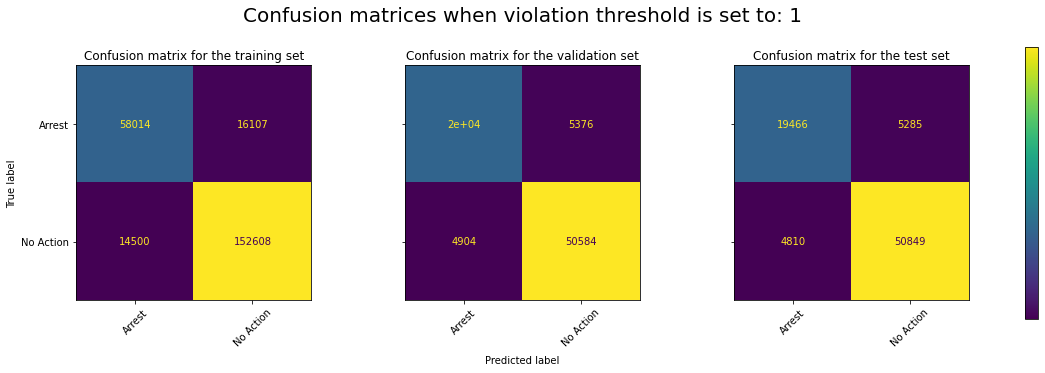

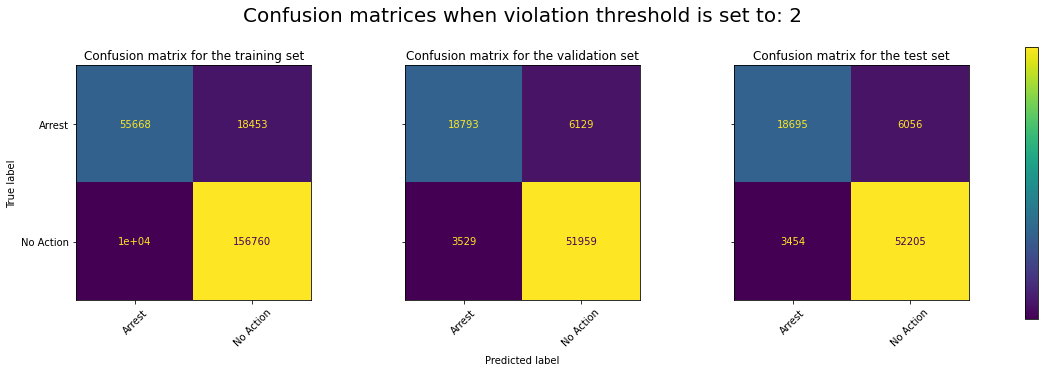

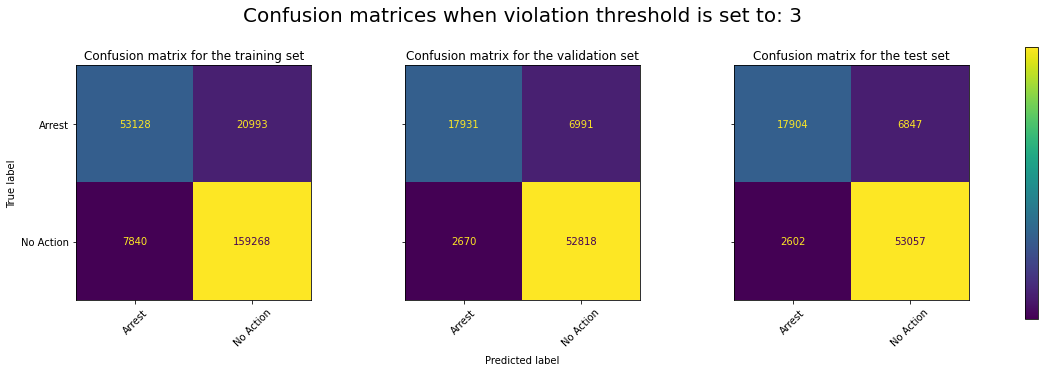

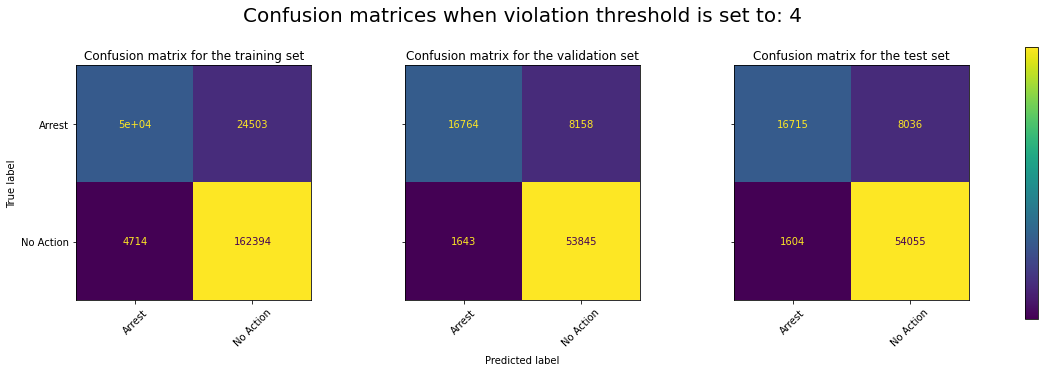

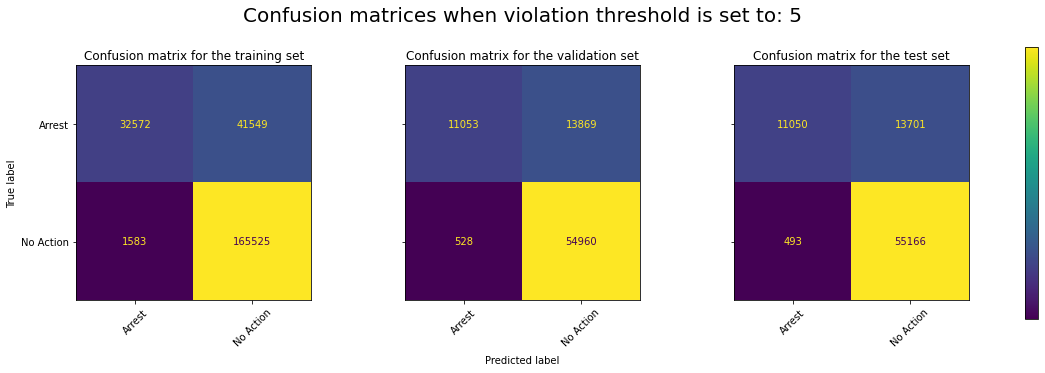

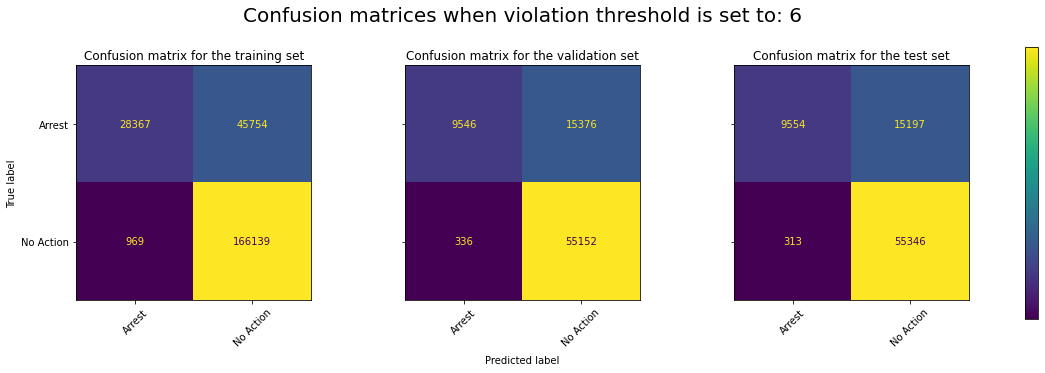

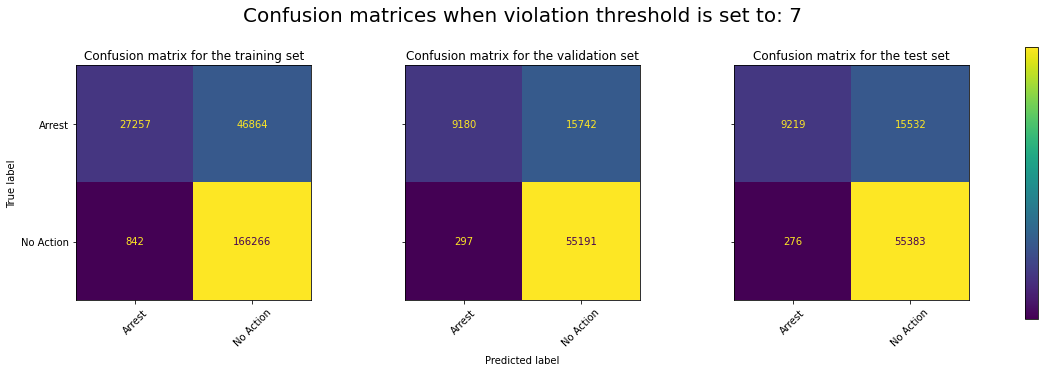

In [215]:
i = 1
for val in df_dict.values():
    plot_cm_subplots(val[1], f'Confusion matrices when violation threshold is set to: {i}')
    i = i+1

## Finding the best threshold value using a ROC curve

We calculate the ROC curves and then the Geometric Mean. Geometric Mean Explanation:

Sensitivity = True positive / (True positive + False negative) = True Positive Rate (TPR)

Specificity = True negative / (False positive + True negative) = 1 - False Positive Rate (FPR)

Geometric Mean or G-Mean = sqrt(sensitivity * specificity)

***

`If you have already loaded the pickle file: You can skip this part and move on to "Plotting ROC curve and G-Mean"`

***

In [ ]:
# X and y value used for this part is the same as the one from the original data set (from exercise 2, creating classifiers)
X_train_scr = X_train_norm.copy()
y_train_scr = y_train.copy()

X_val_scr = X_val_norm.copy()
y_val_scr = y_val.copy()

X_test_scr = X_test_norm.copy()
y_test_scr = y_test.copy()

# Create an instance of NN with hidden_layer_sizes=(20,)
nn_scr = MLPClassifier(solver='adam', alpha=1e-5,
                hidden_layer_sizes=(40,8), random_state=1, max_iter=1000)
print("Created an instance of NN")

# Train the model on the training set with the encoded labels
nn_scr.fit(X_train_scr, y_train_scr)
print("Fitting complete")

In [153]:
# Predict the probabilities
# y_test_scores_scr has two columns
# 1st column: prob of being 1
# 2nd column: prob of being 0
y_val_scores_scr = nn_scr.predict_proba(X_val_scr)
print("Prediction complete")

# Keep probabilities for arrests (0) only
y_val_scores_scr = y_val_scores_scr[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_val_scr, y_val_scores_scr)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

# find the largest g-mean
ix = np.argmax(gmeans)
threshold_opt = thresholds[ix]

Prediction complete


In [152]:
# Predict the probabilities
y_train_scores_scr = nn_scr.predict_proba(X_train_scr)
# Keep probabilities for arrests (0) only
y_train_scores_scr = y_train_scores_scr[:, 1]
# new target variable that uses the optimal threshold from gmeans
# if the probability is higher than threshold, then it classifies "1", otherwise "0"
y_pred_train_scr = np.zeros(len(y_train_scores_scr))
y_pred_train_scr[y_train_scores_scr > threshold_opt] = 1
y_pred_train_scr = y_pred_train_scr.astype(int)

# Predict the probabilities
y_val_scores_scr = nn_scr.predict_proba(X_val_scr)
# Keep probabilities for arrests (0) only
y_val_scores_scr = y_val_scores_scr[:, 1]
# new target variable that uses the optimal threshold from gmeans
# if the probability is higher than threshold, then it classifies "1", otherwise "0"
y_pred_val_scr = np.zeros(len(y_val_scores_scr))
y_pred_val_scr[y_val_scores_scr > threshold_opt] = 1
y_pred_val_scr = y_pred_val_scr.astype(int)

# Predict the probabilities
y_test_scores_scr = nn_scr.predict_proba(X_test_scr)
# Keep probabilities for arrests (0) only
y_test_scores_scr = y_test_scores_scr[:, 1]
# new target variable that uses the optimal threshold from gmeans
# if the probability is higher than threshold, then it classifies "1", otherwise "0"
y_pred_test_scr = np.zeros(len(y_test_scores_scr))
y_pred_test_scr[y_test_scores_scr > threshold_opt] = 1
y_pred_test_scr = y_pred_test_scr.astype(int)

In [156]:
# Save the classifier to disk
# pickle.dump(nn_scr, open('pickles/nn_scr.sav', 'wb'))
# pickle.dump(y_pred_train_scr, open('pickles/y_pred_train_scr.sav', 'wb'))
# pickle.dump(y_pred_val_scr, open('pickles/y_pred_val_scr.sav', 'wb'))
# pickle.dump(y_pred_test_scr, open('pickles/y_pred_test_scr.sav', 'wb'))

## Plotting ROC curve and G-Mean

Best Threshold=0.677475, G-Mean=0.928


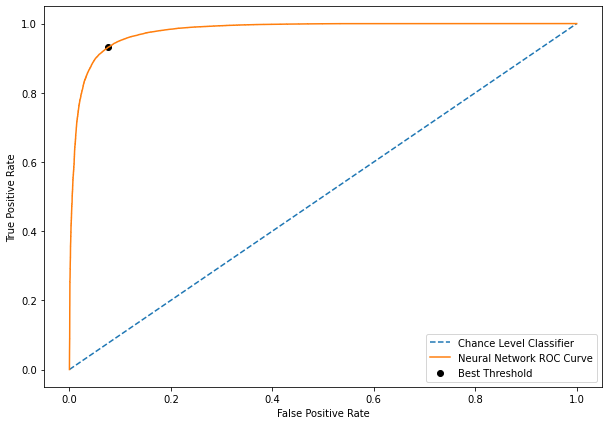

Accuracy on training set: 0.928678
Accuracy on validation set: 0.926029
Accuracy on test set: 0.927198


In [160]:
# X and y value used for this part is the same as the one from the original data set (from exercise 2, creating classifiers)
X_train_scr = X_train_norm.copy()
y_train_scr = y_train.copy()

X_test_scr = X_test_norm.copy()
y_test_scr = y_test.copy()

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test_scr, y_test_scores_scr)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
plt.figure(figsize=(10,7))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='Chance Level Classifier')
plt.plot(fpr, tpr, label='Neural Network ROC Curve')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

acc_scr_train = accuracy_score(y_train_scr, y_pred_train_scr)
acc_scr_val = accuracy_score(y_val_scr, y_pred_val_scr)
acc_scr_test = accuracy_score(y_test_scr, y_pred_test_scr)

acc_list_scr = [acc_scr_train, acc_scr_val, acc_scr_test]
print("Accuracy on training set: %f" %acc_scr_train)
print("Accuracy on validation set: %f" %acc_scr_val)
print("Accuracy on test set: %f" %acc_scr_test)

## Measuring Fairness for sensitive features from the model built using probability scores threshold

### Race groups

In [161]:
group_asian = X_test['driver_race_Asian'] == 1
group_black = X_test['driver_race_Black'] == 1
group_white = X_test['driver_race_White'] == 1
group_hispanic = X_test['driver_race_Hispanic'] == 1
group_other = X_test['driver_race_Other'] == 1

y_pred_scr_asian = y_pred_test_scr[group_asian]
y_test_scr_asian = y_test_scr[group_asian]
X_test_scr_asian = X_test_scr[group_asian]

y_pred_scr_black = y_pred_test_scr[group_black]
y_test_scr_black = y_test_scr[group_black]
X_test_scr_black = X_test_scr[group_black]

y_pred_scr_white = y_pred_test_scr[group_white]
y_test_scr_white = y_test_scr[group_white]
X_test_scr_white = X_test_scr[group_white]

y_pred_scr_hispanic = y_pred_test_scr[group_hispanic]
y_test_scr_hispanic = y_test_scr[group_hispanic]
X_test_scr_hispanic = X_test_scr[group_hispanic]

y_pred_scr_other = y_pred_test_scr[group_other]
y_test_scr_other = y_test_scr[group_other]
X_test_scr_other = X_test_scr[group_other]

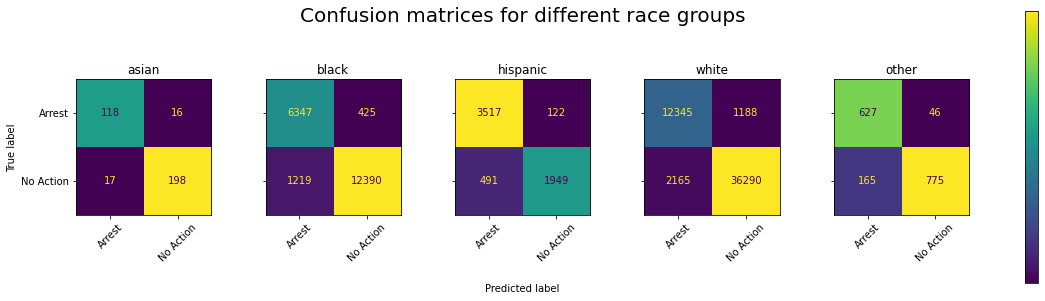

In [162]:
cm_asian_scr = confusion_matrix(y_test_scr_asian, y_pred_scr_asian)
cm_black_scr = confusion_matrix(y_test_scr_black, y_pred_scr_black)
cm_white_scr = confusion_matrix(y_test_scr_white, y_pred_scr_white)
cm_hispanic_scr = confusion_matrix(y_test_scr_hispanic, y_pred_scr_hispanic)
cm_other_scr = confusion_matrix(y_test_scr_other, y_pred_scr_other)

tmp_dict = {'asian': cm_asian_scr, 'black': cm_black_scr, 'hispanic': cm_hispanic_scr, 'white': cm_white_scr, 'other': cm_other_scr}
plot_cm_subplots(tmp_dict, 'Confusion matrices for different race groups', 0.1, 0.85, '')

In [163]:
tn_scr_asian, fp_scr_asian, fn_scr_asian, tp_scr_asian = confusion_matrix(y_test_scr_asian, y_pred_scr_asian).ravel()
tn_scr_black, fp_scr_black, fn_scr_black, tp_scr_black = confusion_matrix(y_test_scr_black, y_pred_scr_black).ravel()
tn_scr_white, fp_scr_white, fn_scr_white, tp_scr_white = confusion_matrix(y_test_scr_white, y_pred_scr_white).ravel()
tn_scr_hispanic, fp_scr_hispanic, fn_scr_hispanic, tp_scr_hispanic = confusion_matrix(y_test_scr_hispanic, y_pred_scr_hispanic).ravel()
tn_scr_other, fp_scr_other, fn_scr_other, tp_scr_other = confusion_matrix(y_test_scr_other, y_pred_scr_other).ravel()

##### Independence for race groups

In [164]:
ind_asian_scr = independence(tn_scr_asian, fp_scr_asian, fn_scr_asian, tp_scr_asian)
ind_black_scr = independence(tn_scr_black, fp_scr_black, fn_scr_black, tp_scr_black)
ind_white_scr = independence(tn_scr_white, fp_scr_white, fn_scr_white, tp_scr_white)
ind_hispanic_scr = independence(tn_scr_hispanic, fp_scr_hispanic, fn_scr_hispanic, tp_scr_hispanic)
ind_other_scr = independence(tn_scr_other, fp_scr_other, fn_scr_other, tp_scr_other)

In [165]:
print(ind_asian_scr, ind_black_scr, ind_white_scr, ind_hispanic_scr, ind_other_scr)

0.6131805157593123 0.6287718953927678 0.7208971301069478 0.3406810330646488 0.5089894606323621


##### Separation for race groups

In [166]:
sep_asian_scr = separation(tn_scr_asian, fp_scr_asian, fn_scr_asian, tp_scr_asian)
sep_black_scr = separation(tn_scr_black, fp_scr_black, fn_scr_black, tp_scr_black)
sep_white_scr = separation(tn_scr_white, fp_scr_white, fn_scr_white, tp_scr_white)
sep_hispanic_scr = separation(tn_scr_hispanic, fp_scr_hispanic, fn_scr_hispanic, tp_scr_hispanic)
sep_other_scr = separation(tn_scr_other, fp_scr_other, fn_scr_other, tp_scr_other)

In [167]:
print(sep_asian_scr, sep_black_scr, sep_white_scr, sep_hispanic_scr, sep_other_scr)

(0.9252336448598131, 0.8740740740740741) (0.9668357393679282, 0.8388844832143801) (0.9683014034900475, 0.8507925568573398) (0.9410912602607436, 0.8774950099800399) (0.9439707673568819, 0.7916666666666666)


##### Sufficiency for race groups

In [168]:
suf_asian_scr = sufficiency(tn_scr_asian, fp_scr_asian, fn_scr_asian, tp_scr_asian)
suf_black_scr = sufficiency(tn_scr_black, fp_scr_black, fn_scr_black, tp_scr_black)
suf_white_scr = sufficiency(tn_scr_white, fp_scr_white, fn_scr_white, tp_scr_white)
suf_hispanic_scr = sufficiency(tn_scr_hispanic, fp_scr_hispanic, fn_scr_hispanic, tp_scr_hispanic)
suf_other_scr = sufficiency(tn_scr_other, fp_scr_other, fn_scr_other, tp_scr_other)

In [169]:
print(suf_asian_scr, suf_black_scr, suf_white_scr, suf_hispanic_scr, suf_other_scr)

(0.9209302325581395, 0.11940298507462686) (0.9104269233595415, 0.06275841701122269) (0.9437004290729424, 0.08778541343382842) (0.7987704918032786, 0.03352569387194284) (0.824468085106383, 0.06835066864784546)


### Age groups

In [170]:
 # Reference: https://www.sciencedirect.com/science/article/pii/S0386111214600315#:~:text=Three%20driver%20age%20groups%20(old,aged%20less%20than%2030%20years.
group_young = X_test['driver_age'] < 30
group_middle = (X_test['driver_age'] >= 30) & (X_test['driver_age'] < 65)
group_elderly = X_test['driver_age'] >= 65

In [171]:
y_pred_scr_young = y_pred_test_scr[group_young]
y_test_scr_young = y_test_scr[group_young]
X_test_scr_young = X_test_scr[group_young]

y_pred_scr_middle = y_pred_test_scr[group_middle]
y_test_scr_middle = y_test_scr[group_middle]
X_test_scr_middle = X_test_scr[group_middle]

y_pred_scr_elderly = y_pred_test_scr[group_elderly]
y_test_scr_elderly = y_test_scr[group_elderly]
X_test_scr_elderly = X_test_scr[group_elderly]

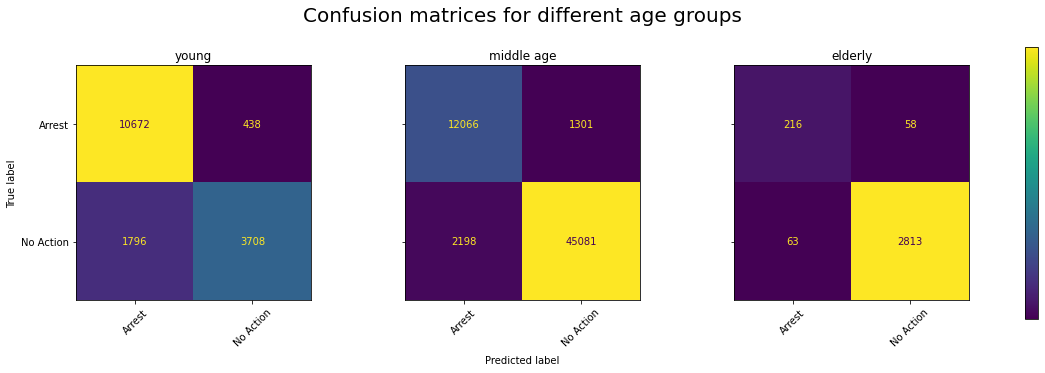

In [172]:
cm_young_scr = confusion_matrix(y_test_scr_young, y_pred_scr_young)
cm_middle_scr = confusion_matrix(y_test_scr_middle, y_pred_scr_middle)
cm_elderly_scr = confusion_matrix(y_test_scr_elderly, y_pred_scr_elderly)

tmp_dict = {'young': cm_young_scr, 'middle age': cm_middle_scr, 'elderly': cm_elderly_scr}
plot_cm_subplots(tmp_dict, 'Confusion matrices for different age groups', 0, 0.95, '')

In [173]:
tn_scr_young, fp_scr_young, fn_scr_young, tp_scr_young = confusion_matrix(y_test_scr_young, y_pred_scr_young).ravel()
tn_scr_middle, fp_scr_middle, fn_scr_middle, tp_scr_middle = confusion_matrix(y_test_scr_middle, y_pred_scr_middle).ravel()
tn_scr_elderly, fp_scr_elderly, fn_scr_elderly, tp_scr_elderly = confusion_matrix(y_test_scr_elderly, y_pred_scr_elderly).ravel()

##### Independence for age groups

In [174]:
ind_young_scr = independence(tn_scr_young, fp_scr_young, fn_scr_young, tp_scr_young)
ind_middle_scr = independence(tn_scr_middle, fp_scr_middle, fn_scr_middle, tp_scr_middle)
ind_elderly_scr = independence(tn_scr_elderly, fp_scr_elderly, fn_scr_elderly, tp_scr_elderly)

In [175]:
print(ind_young_scr, ind_middle_scr, ind_elderly_scr)

0.24954857349223547 0.7647989974606734 0.9114285714285715


##### Separation for age groups

In [176]:
sep_young_scr = separation(tn_scr_young, fp_scr_young, fn_scr_young, tp_scr_young)
sep_middle_scr = separation(tn_scr_middle, fp_scr_middle, fn_scr_middle, tp_scr_middle)
sep_elderly_scr = separation(tn_scr_elderly, fp_scr_elderly, fn_scr_elderly, tp_scr_elderly)

In [177]:
print(sep_young_scr, sep_middle_scr, sep_elderly_scr)

(0.894356005788712, 0.8559512351620148) (0.9719503255573283, 0.8459057767807067) (0.9797979797979798, 0.7741935483870968)


##### Sufficiency for age groups

In [178]:
suf_young_scr = sufficiency(tn_scr_young, fp_scr_young, fn_scr_young, tp_scr_young)
suf_middle_scr = sufficiency(tn_scr_middle, fp_scr_middle, fn_scr_middle, tp_scr_middle)
suf_elderly_scr = sufficiency(tn_scr_elderly, fp_scr_elderly, fn_scr_elderly, tp_scr_elderly)

In [179]:
print(suf_young_scr, suf_middle_scr, suf_elderly_scr)

(0.6736918604651163, 0.03942394239423942) (0.9535100150172381, 0.0973292436597591) (0.9780945757997218, 0.2116788321167883)


### Gender Groups

In [180]:
group_female = X_test['driver_gender'] == 0
group_male = X_test['driver_gender'] == 1

In [181]:
y_pred_scr_female = y_pred_test_scr[group_female]
y_test_scr_female = y_test_scr[group_female]
X_test_scr_female = X_test_scr[group_female]

y_pred_scr_male = y_pred_test_scr[group_male]
y_test_scr_male = y_test_scr[group_male]
X_test_scr_male = X_test_scr[group_male]

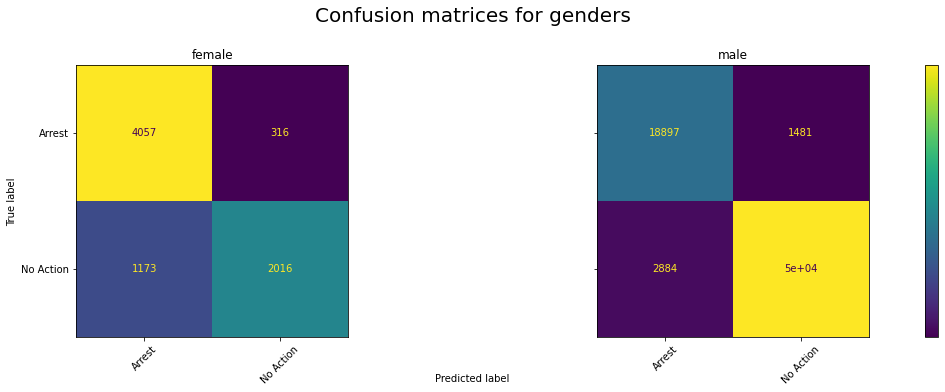

In [182]:
cm_female_scr = confusion_matrix(y_test_scr_female, y_pred_scr_female)
cm_male_scr = confusion_matrix(y_test_scr_male, y_pred_scr_male)

tmp_dict = {'female': cm_female_scr, 'male': cm_male_scr}
plot_cm_subplots(tmp_dict, 'Confusion matrices for genders', 0, 1, '')

In [183]:
tn_scr_female, fp_scr_female, fn_scr_female, tp_scr_female = confusion_matrix(y_test_scr_female, y_pred_scr_female).ravel()
tn_scr_male, fp_scr_male, fn_scr_male, tp_scr_male = confusion_matrix(y_test_scr_male, y_pred_scr_male).ravel()

##### Independence for gender groups

In [184]:
ind_female_scr = independence(tn_scr_female, fp_scr_female, fn_scr_female, tp_scr_female)
ind_male_scr = independence(tn_scr_male, fp_scr_male, fn_scr_male, tp_scr_male)

In [185]:
print(ind_female_scr, ind_male_scr)

0.30838402539010845 0.7010075774214803


##### Separation for gender groups

In [186]:
sep_female_scr = separation(tn_scr_female, fp_scr_female, fn_scr_female, tp_scr_female)
sep_male_scr = separation(tn_scr_male, fp_scr_male, fn_scr_male, tp_scr_male)

In [187]:
print(sep_female_scr, sep_male_scr)

(0.8644939965694682, 0.775717017208413) (0.9709988838192962, 0.8675910196960653)


##### Sufficiency for gender groups

In [188]:
suf_female_scr = sufficiency(tn_scr_female, fp_scr_female, fn_scr_female, tp_scr_female)
suf_male_scr = sufficiency(tn_scr_male, fp_scr_male, fn_scr_male, tp_scr_male)

In [189]:
print(suf_female_scr, suf_male_scr)

(0.632173095014111, 0.07226160530528242) (0.9450352582428054, 0.07267641574246737)


#### Display fairness metrics in dataframes

In [190]:
independence_list_race_scr = np.around(np.array([ind_asian_scr, ind_black_scr, ind_white_scr, ind_hispanic_scr, ind_other_scr]), 4)
separation_list_race_scr = np.around(np.array([sep_asian_scr, sep_black_scr, sep_white_scr, sep_hispanic_scr, sep_other_scr]), 4).tolist()
sufficiency_list_race_scr = np.around(np.array([suf_asian_scr, suf_black_scr, suf_white_scr, suf_hispanic_scr, suf_other_scr]), 4).tolist()

independence_list_age_scr = np.around(np.array([ind_young_scr, ind_middle_scr, ind_elderly_scr]), 4)
separation_list_age_scr = np.around(np.array([sep_young_scr, sep_middle_scr, sep_elderly_scr]), 4).tolist()
sufficiency_list_age_scr = np.around(np.array([suf_young_scr, suf_middle_scr, suf_elderly_scr]), 4).tolist()

independence_list_gender_scr = np.around(np.array([ind_female_scr, ind_male_scr]), 4)
separation_list_gender_scr = np.around(np.array([sep_female_scr, sep_male_scr]), 4).tolist()
sufficiency_list_gender_scr = np.around(np.array([suf_female_scr, suf_male_scr]), 4).tolist()

In [191]:
#create table to store fairness value for race
race_columns = ['White','Black','Hispanic','Asian','Other']
fairness_index = ['Independency','Separation','Sufficiency']
fairness_table_race_scr = pd.DataFrame(columns = race_columns, index = fairness_index)

#create table to store fairness value for gender
gender_columns = ['Male','Female']
fairness_table_gender_scr = pd.DataFrame(columns = gender_columns, index = fairness_index)

#create table to store fairness value for age
age_columns = ['Young','Middle age','Elderly']
fairness_table_age_scr = pd.DataFrame(columns = age_columns, index = fairness_index)

In [192]:
print("Fairness metrics for race for probability threshold model")

fairness_table_race_scr.loc['Independency'] = independence_list_race_scr
fairness_table_race_scr.loc['Separation'] = separation_list_race_scr
fairness_table_race_scr.loc['Sufficiency'] = sufficiency_list_race_scr
fairness_table_race_scr = fairness_table_race_scr.round(4)
fairness_table_race_scr

Fairness metrics for race for probability threshold model


,White,Black,Hispanic,Asian,Other
Independency,0.6132,0.6288,0.7209,0.3407,0.509
Separation,"[0.9252, 0.8741]","[0.9668, 0.8389]","[0.9683, 0.8508]","[0.9411, 0.8775]","[0.944, 0.7917]"
Sufficiency,"[0.9209, 0.1194]","[0.9104, 0.0628]","[0.9437, 0.0878]","[0.7988, 0.0335]","[0.8245, 0.0684]"


In [193]:
print("Fairness metrics for age for probability threshold model")

fairness_table_age_scr.loc['Independency'] = independence_list_age_scr
fairness_table_age_scr.loc['Separation'] = separation_list_age_scr
fairness_table_age_scr.loc['Sufficiency'] = sufficiency_list_age_scr
fairness_table_age_scr = fairness_table_age_scr.round(4)
fairness_table_age_scr

Fairness metrics for age for probability threshold model


,Young,Middle age,Elderly
Independency,0.2495,0.7648,0.9114
Separation,"[0.8944, 0.856]","[0.972, 0.8459]","[0.9798, 0.7742]"
Sufficiency,"[0.6737, 0.0394]","[0.9535, 0.0973]","[0.9781, 0.2117]"


In [194]:
print("Fairness metrics for gender for probability threshold model")

fairness_table_gender_scr.loc['Independency'] = independence_list_gender_scr
fairness_table_gender_scr.loc['Separation'] = separation_list_gender_scr
fairness_table_gender_scr.loc['Sufficiency'] = sufficiency_list_gender_scr
fairness_table_gender_scr = fairness_table_gender_scr.round(4)
fairness_table_gender_scr

Fairness metrics for gender for probability threshold model


,Male,Female
Independency,0.3084,0.701
Separation,"[0.8645, 0.7757]","[0.971, 0.8676]"
Sufficiency,"[0.6322, 0.0723]","[0.945, 0.0727]"


# Not used

## PCA

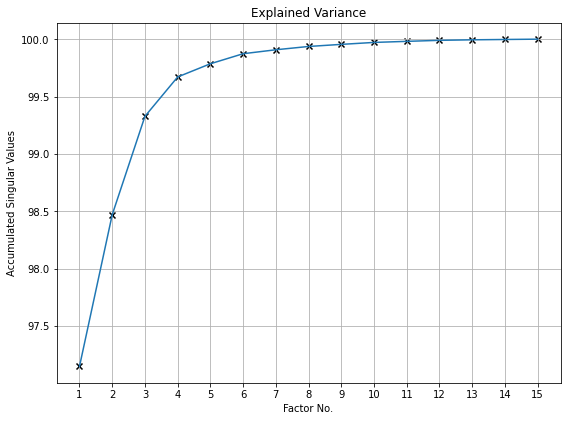

In [195]:
[U,s,VT] = np.linalg.svd(X, full_matrices=False)
P = VT.T@np.diag(s)
T = U

x = np.arange(1, len(s)+1)

fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])

plt.scatter(x, np.cumsum(s) / sum(s) * 100, marker='x', color='k')
plt.plot(x, np.cumsum(s) / sum(s) * 100)
plt.title('Explained Variance')
plt.xlabel('Factor No.')
plt.ylabel('Accumulated Singular Values')
plt.xticks(x)
plt.grid()

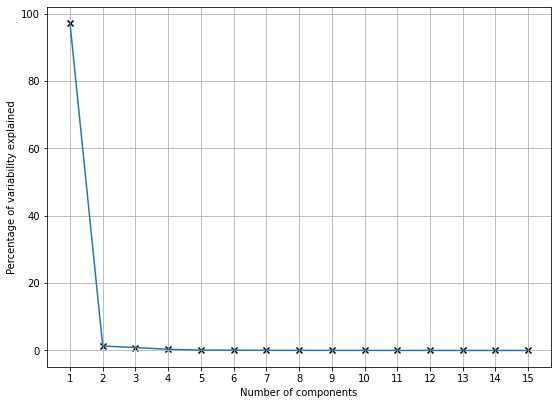

In [196]:
x = np.arange(1, len(s)+1)

fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])

plt.plot(x, s / sum(s) * 100)
plt.scatter(x, s / sum(s) * 100, marker='x', color='k')
plt.xlabel('Number of components')
plt.ylabel('Percentage of variability explained')
plt.xticks(x)
plt.grid()

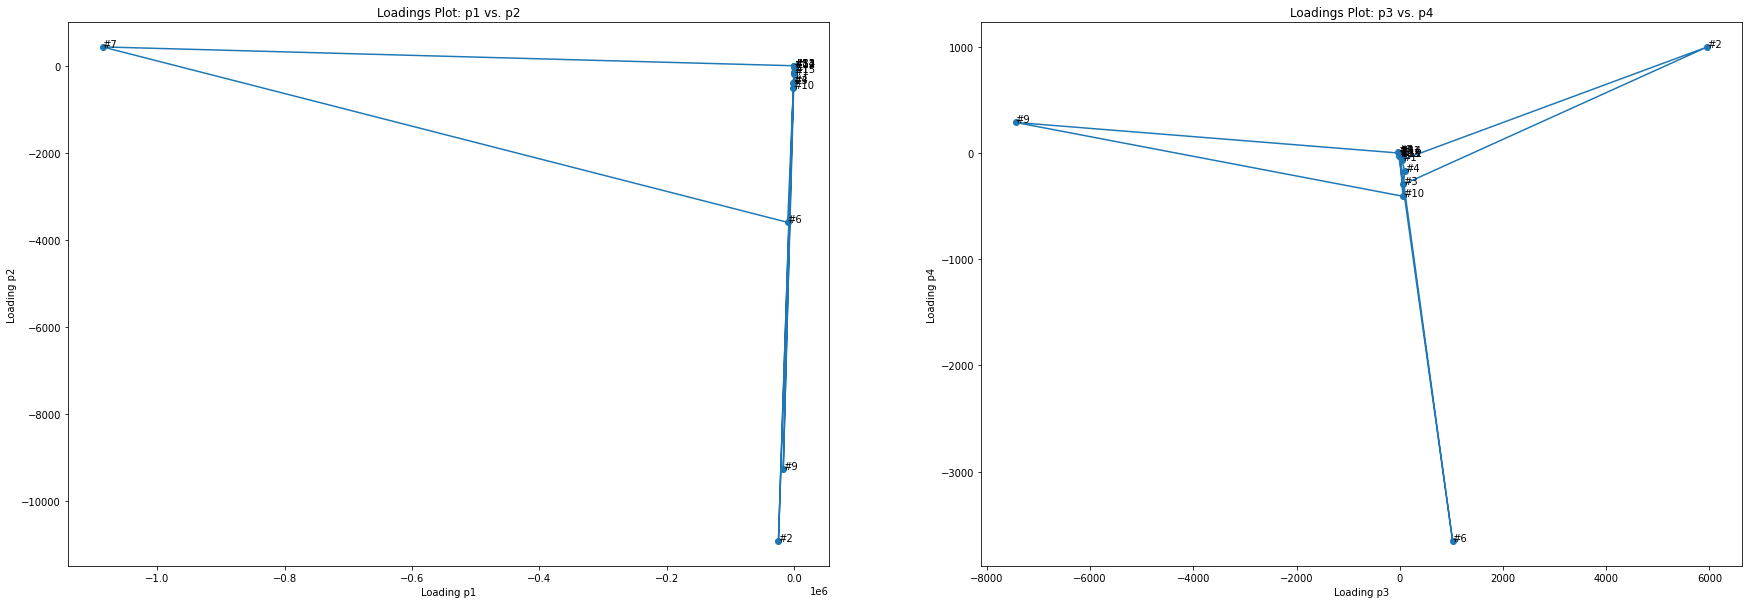

In [197]:
x = np.arange(1, len(s)+1)

fig, axs = plt.subplots(1, 2, figsize=(30,10))
axs = axs.ravel()
axs[0].plot(P[:,0],P[:,1], marker='o')
axs[0].set_title('Loadings Plot: p1 vs. p2')
axs[0].set_xlabel('Loading p1')
axs[0].set_ylabel('Loading p2')

axs[1].plot(P[:,2],P[:,3], marker='o')
axs[1].set_title('Loadings Plot: p3 vs. p4')
axs[1].set_xlabel('Loading p3')
axs[1].set_ylabel('Loading p4')

for i in range(len(X.columns)):
    axs[0].annotate(f'#{i+1}', xy=(P[i,0], P[i,1]))
    axs[1].annotate(f'#{i+1}', xy=(P[i,2], P[i,3]))
plt.show()

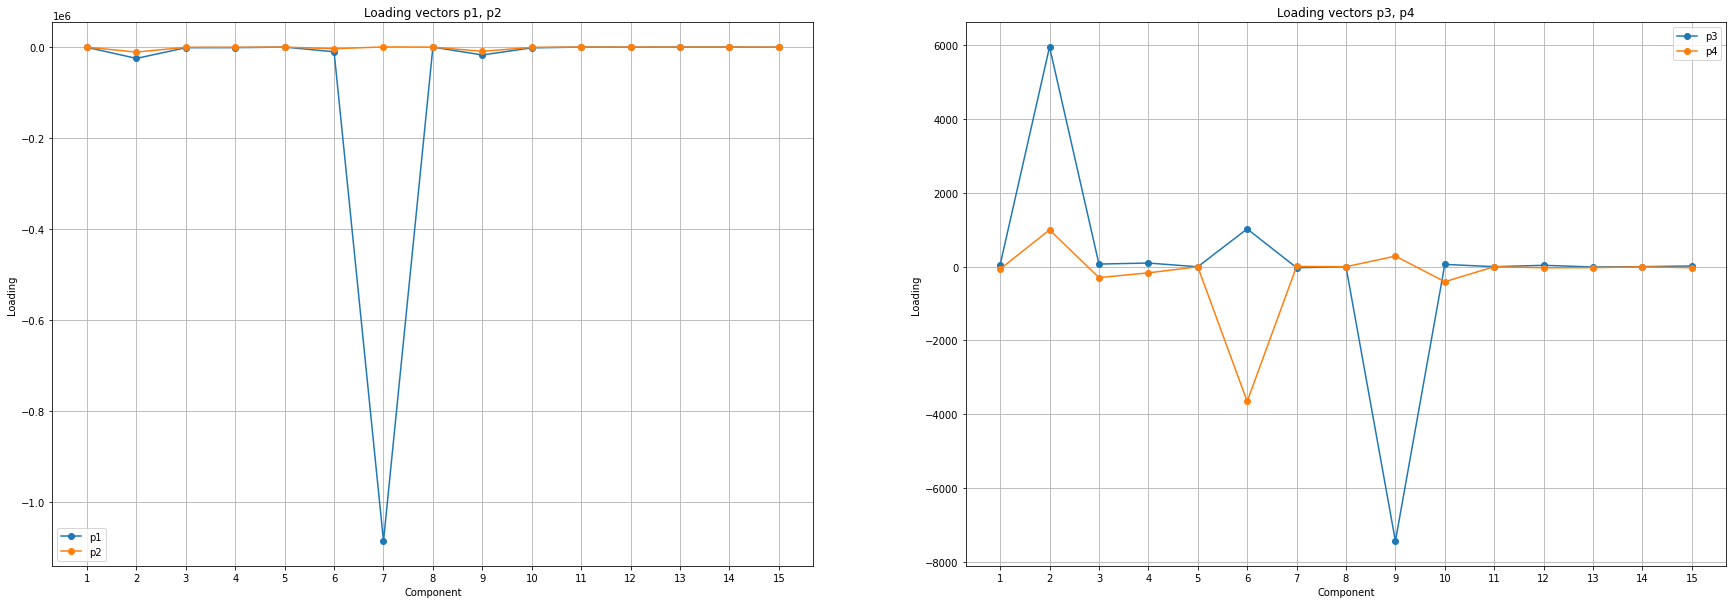

In [198]:
x = np.arange(1, len(s)+1)

fig, axs = plt.subplots(1, 2, figsize=(30,10))
axs = axs.ravel()
axs[0].plot(x, P[:,0:2], marker='o')
axs[0].grid()
axs[0].set_title('Loading vectors p1, p2')
axs[0].set_xlabel('Component')
axs[0].set_ylabel('Loading')
axs[0].legend(['p1', 'p2'])
axs[0].set_xticks(x)

axs[1].plot(x, P[:,2:4], marker='o')
axs[1].grid()
axs[1].set_title('Loading vectors p3, p4')
axs[1].set_xlabel('Component')
axs[1].set_ylabel('Loading')
axs[1].legend(['p3', 'p4'])
axs[1].set_xticks(x)

plt.show()

We decided not to use PCA, please refer to the report for the explanation